<div style="display: flex; background-color: #196f3d;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#fff;" align="center">Implement a scoring model - P7</h1>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">| Modeling Notebook |</h3>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Initialization</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries</h3>
</div>

In [1]:
## General
import timeit
import time
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.style as style
import importlib
import sys
import pickle

## Scikit Learn library
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (train_test_split, StratifiedKFold, 
                                     HalvingGridSearchCV, cross_validate, RepeatedStratifiedKFold, cross_val_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (precision_score, roc_auc_score, recall_score, accuracy_score,
                             f1_score, fbeta_score, confusion_matrix, roc_curve, 
                             PrecisionRecallDisplay, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score)
from sklearn.feature_selection import SelectKBest, f_classif

## mlflow tracking
import mlflow
mlflow.login()

# feature importance
import shap
from shap.plots import waterfall

## imbalanced-learn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## LightGBM
from lightgbm import LGBMClassifier, early_stopping


## Lightweight pipelining in Python
import joblib

## Own specific functions 
from functions import *

%matplotlib inline

2024/04/15 04:56:19 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://community.cloud.databricks.com.


In [2]:
mlflow.set_tracking_uri("databricks")

mlflow.set_experiment("/P7")
# mlflow.sklearn.autolog()
mlflow.end_run()

In [3]:
from functions import *
importlib.reload(sys.modules['functions'])

<module 'functions' from 'c:\\Users\\blede\\OC\\P7\\functions.py'>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Parameters</h3>
</div>

In [4]:
# activation de l'etape fit des cacul des baseline
FIT_MODE_BSLINE = False
DF_BS_MODELS_METRICS = "Data\process\df_bs_models_metrics.csv"

# activation de l'etape fit de la recherche de Hyperparametres pour Random Forest
FIT_MODE_FT_RF = False
DF_CV_RESULTS_HT_RF = "Data\process\df_cv_results_ht_rf.csv"

# activation de l'etape fit de la recherche de Hyperparametres pour LightGBM
FIT_MODE_FT_lgbm = False
DF_CV_RESULTS_HT_lgbm = "Data\process\df_cv_results_ht_lgbm.csv"

# activation de l'etape fit de la recherche de Hyperparametres pour Gradiant Boosting
FIT_MODE_FT_gb = False
DF_CV_RESULTS_HT_gb = "Data\process\df_cv_results_ht_gb.csv"

#Generate new selected features list
GENERATE_NEW_FS_LIST = False
DF_FS_LIST = "Data\process\df_fs_list.csv"

#Fit of model Random Forest with class-weight
FIT_MODE_RF_CW = False
CLF_RF_CW_FILENAME = "models/classif_randof_class_weight.pkl"
DURATION_MODEL_CLF_RF_CW = "models/duration_classif_randof_class_weight.pkl"

#Fit of model LightGBM with class-weight
FIT_MODE_lgbm_CW = False
CLF_lgbm_CW_FILENAME = "models/classif_lightgbM_class_weight.pkl"
DURATION_MODEL_CLF_lgbm_CW = "models/duration_classif_lightgbM_class_weight.pkl"

#Fit of model Gradiant Boosting with class-weight
FIT_MODE_gb_CW = False
CLF_gb_CW_FILENAME = "models/classif_gradiantboost_class_weight.pkl"
DURATION_MODEL_CLF_gb_CW = "models/duration_classif_gradiantboost_class_weight.pkl"

#Fit of model Random Forest with oversampling
FIT_MODE_RF_OS = False
CLF_RF_OS_FILENAME = "models/classif_randof_oversampling.pkl"
DURATION_MODEL_CLF_RF_OS = "models/duration_classif_randof_oversampling.pkl"

#Fit of model LightGBM with oversampling
FIT_MODE_lgbm_OS = False
CLF_lgbm_OS_FILENAME = "models/classif_lightgbM_oversampling.pkl"
DURATION_MODEL_CLF_lgbm_OS = "models/duration_classif_lightgbM_oversampling.pkl"

#Fit of model Gradiant Boosting with oversampling
FIT_MODE_gb_OS = False
CLF_gb_OS_FILENAME = "models/classif_gradiantboost_oversampling.pkl"
DURATION_MODEL_CLF_gb_OS = "models/duration_classif_gradiantboost_oversampling.pkl"

#Fit of model Random Forest with undersampling
FIT_MODE_RF_US = False
CLF_RF_US_FILENAME = "models/classif_randof_undersampling.pkl"
DURATION_MODEL_CLF_RF_US = "models/duration_classif_randof_undersampling.pkl"

#Fit of model LightGBM with undersampling
FIT_MODE_lgbm_US = False
CLF_lgbm_US_FILENAME = "models/classif_lightgbM_undersampling.pkl"
DURATION_MODEL_CLF_lgbm_US = "models/duration_classif_lightgbM_undersampling.pkl"

#Fit of model Gradiant Boosting with undersampling
FIT_MODE_gb_US = False
CLF_gb_US_FILENAME = "models/classif_gradiantboost_undersampling.pkl"
DURATION_MODEL_CLF_gb_US = "models/duration_classif_gradiantboost_undersampling.pkl"

# DF of selected feature, importance and ranking
DF_FS_FILENAME = "Data/finals_datasets/df_fs.csv"

# SHAP: explainer of tree saved
SHAP_VALUES_FILENAME = "Data/finals_datasets/shap_values.csv"

# SHAP: expected value saved
SHAP_EXPECTED_VALUES_FILENAME = "Data/finals_datasets/expected_values.csv"

# #Fit of model Random Forest with Threshold-Moving
# FIT_MODE_RF_TM = True
# CLF_RF_TM_FILENAME = "models/classif_randof_thresholdmoving.pkl"
# DURATION_MODEL_CLF_RF_TM = "models/duration_classif_randof_thresholdmoving.pkl"

# #Fit of model LightGBM with Threshold-Moving
# FIT_MODE_lgbm_TM = True
# CLF_lgbm_TM_FILENAME = "models/classif_lightgbM_thresholdmoving.pkl"
# DURATION_MODEL_CLF_lgbm_TM = "models/duration_classif_lightgbM_thresholdmoving.pkl"

# #Fit of model Gradiant Boosting with Threshold-Moving
# FIT_MODE_gb_TM = True
# CLF_gb_TM_FILENAME = "models/classif_gradiantboost_thresholdmoving.pkl"
# DURATION_MODEL_CLF_gb_TM = "models/duration_classif_gradiantboost_thresholdmoving.pkl"

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Let's load the current clients
   </p>
</div>

In [5]:
path_data_i_dir = 'Data/initials_datasets/'
path_data_f_dir = "Data/finals_datasets/"

In [6]:
df_current_clients = pd.read_csv(path_data_f_dir+"df_current_clients.csv")

In [7]:
df_analysis(df_current_clients, "df_current_clients", analysis_type="header")


Analysis Header of df_current_clients dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 509 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 921.1 MB


In [8]:
df_clients_to_predict = pd.read_csv(path_data_f_dir+ "df_clients_to_predict.csv")

In [9]:
df_analysis(df_clients_to_predict, "df_clients_to_predict", analysis_type="header")


Analysis Header of df_clients_to_predict dataset
--------------------------------------------------------------------------------
- Dataset shape:			 48744 rows and 508 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 145.6 MB


<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <p>First of all, let's treat the memory to optimize its usage.</p>
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Optimizing memory usage</h2>
</div>

<div class="alert alert-block alert-warning">
    <p>We should optimize the memory usage to avoid problems during executions</p>
</div>

In [10]:
df_current_clients = memory_optimization(df_current_clients)

In [11]:
df_analysis(df_current_clients, "df_clients_to_predict", analysis_type="header")


Analysis Header of df_clients_to_predict dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 509 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 459.8 MB


In [12]:
df_clients_to_predict = memory_optimization(df_clients_to_predict)

In [13]:
df_analysis(df_clients_to_predict, "df_clients_to_predict", analysis_type="header")


Analysis Header of df_clients_to_predict dataset
--------------------------------------------------------------------------------
- Dataset shape:			 48744 rows and 508 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 76.3 MB


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>The memory usage has been reduced.</p>
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Analyzing target variable</h2>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to analyze the target variable to see whether is an imbalanced class
   </p>
</div>

c:\Users\blede\OC\P7\functions.py:301: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels=labels, rotation=70, size=12,


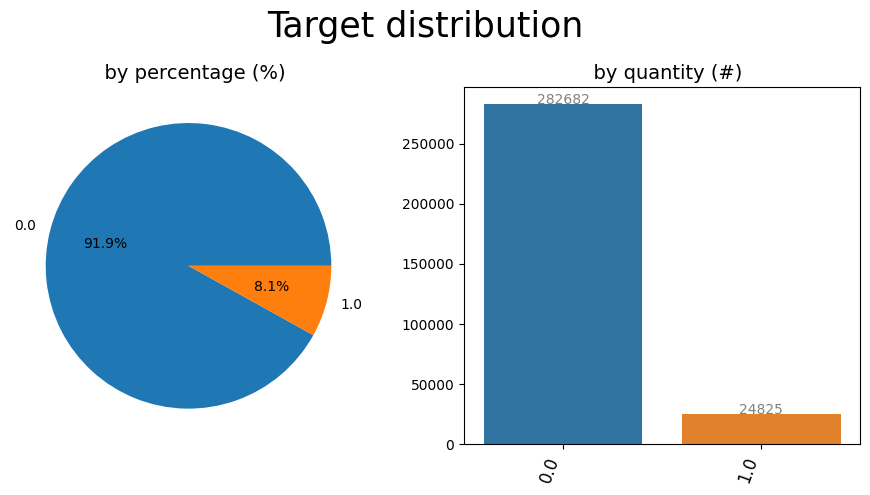

In [14]:
barplot_and_pie(df_current_clients["TARGET"], "Target distribution", " ")

<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>Here we can see how much the dataset is imbalanced so, we are facing a imbalanced classification problem</li>
        <li>It is easily identifying that there are <b>loans that were repaid (0)</b> in comparison of <b>loans that were not repaid (1)</b>s</li>
        <li>We are going to treat the imbalanced class into a pipeline during the modeling</li>
    </ul> 
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">5. Splitting data</h2>
</div>

<div class="alert alert-block alert-info">
    <p>First of all, let's identify the training columns in the dataset
   </p>
</div>

In [15]:
NOT_TRAINING_COLUMNS  = ["TARGET", "SK_ID_CURR", "SK_ID_BUREAU", "SK_ID_PREV", "index"] 
TRAINING_COLUMNS = [col for col in df_current_clients.columns if col not in NOT_TRAINING_COLUMNS]

<div class="alert alert-block alert-info">
    <p>Let's split the all data
   </p>
</div>

In [16]:
X = df_current_clients[TRAINING_COLUMNS]

In [17]:
y_target = df_current_clients.loc[:,"TARGET"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.20, stratify=y_target, random_state=42)

In [19]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("---------------------")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (246005, 506)
y_train: (246005,)
---------------------
X_test: (61502, 506)
y_test: (61502,)


<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">6. Modelisation initial</h2>
</div>

<div class="alert alert-block alert-success">
    <p>We are going to face an <b>Unbalanced Classification Problem</b> and we are going to use three models</p>
    <ul style="list-style-type: square;">
        <li>Random Forest Classifier</li>
        <li>LightGBM</li>
        <li>Gradient Boosting</li>
    </ul>
    <p>Also, we are going to use a Dummy Classifier and baseline to compare the models</p>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.1. General parameters</h3>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to use Stratified K-Folds cross-validator to ensure that each fold of dataset has the same proportion of observations with a given label.</p>
</div>

In [20]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

<div class="alert alert-block alert-info">
    <p>Metrics to use.</p>
</div>

In [21]:
scoring = ["roc_auc", "recall", "precision", "f1"]

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.2. Baselines</h3>
</div>

<div class="alert alert-block alert-info">
    <p>List of models to use. Dummy Classifier and Base line of the models</p>
</div>

In [22]:
classifiers = {
    "Dummy Classifier" : DummyClassifier(),
    "Baseline - Random Forest" : RandomForestClassifier(),
    "Baseline - LightGBM" : LGBMClassifier(),
    "Baseline - Gradient Boosting" : GradientBoostingClassifier()
}

In [23]:
# List of metrics results for each models 
LIST_MODEL, LIST_RECALL, LIST_ROC_AUC, LIST_F1, LIST_PREC, LIST_DURATION  = ([] for i in range(6))
if FIT_MODE_BSLINE:
    for key, clf in classifiers.items():
        print("Cross Validation du model: "+ key +"\n")
        start_time_model = timeit.default_timer()
        
        scores = cross_validate(clf, X_train, y_train, 
                                cv=stratified_kfold, scoring=scoring)
        
        end_time_model =  round(timeit.default_timer() - start_time_model, 3)
        print("-"*50)
        # Adding results into LIST
        LIST_MODEL.append(key)
        LIST_RECALL.append(round(scores.get("test_recall").mean(), 3))
        LIST_ROC_AUC.append(round(scores.get("test_roc_auc").mean(), 3))
        LIST_F1.append(round(scores.get("test_f1").mean(), 3))
        LIST_PREC.append(round(scores.get("test_precision").mean(), 3))
        LIST_DURATION.append(end_time_model)

<div class="alert alert-block alert-info">
    <p>Dataframe to compare metrics.</p>
</div>

In [24]:
if FIT_MODE_BSLINE:
    df_models_metrics = pd.DataFrame({
        "Model" : LIST_MODEL,
        "ROC-AUC" : LIST_ROC_AUC,
        "precision" : LIST_PREC,
        "Recall" : LIST_RECALL,    
        "F1" : LIST_F1,
        "Duration (min)" : LIST_DURATION,
    })
    df_models_metrics.to_csv(DF_BS_MODELS_METRICS, index=False)
else:
    df_models_metrics = pd.read_csv(DF_BS_MODELS_METRICS)

<div class="alert alert-block alert-info">
    <p>Let's transform the duration to minutes.</p>
</div>

In [25]:
df_models_metrics["Duration (min)"] = round(df_models_metrics["Duration (min)"]/60, 1)

In [26]:
df_models_metrics

Model  ROC-AUC  precision  Recall     F1  \
0              Dummy Classifier    0.500      0.000   0.000  0.000   
1      Baseline - Random Forest    0.713      0.850   0.001  0.002   
2           Baseline - LightgbM    0.773      0.521   0.033  0.062   
3  Baseline - Gradient Boosting    0.765      0.515   0.019  0.036   

   Duration (min)  
0             6.7  
1            21.3  
2             0.4  
3            31.7

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>it is easy to see how much time the ensembles models. Due to that, we do not consider to plot the duration</p>
</div>

In [27]:
COLUMNS = ["Model", "Recall", "ROC-AUC", "F1", "precision"]

In [28]:
df_models_metrics_reduced = pd.melt(df_models_metrics[COLUMNS], id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_reduced.head(12)

Model   Metric  Value
0               Dummy Classifier   Recall  0.000
1       Baseline - Random Forest   Recall  0.001
2            Baseline - LightgbM   Recall  0.033
3   Baseline - Gradient Boosting   Recall  0.019
4               Dummy Classifier  ROC-AUC  0.500
5       Baseline - Random Forest  ROC-AUC  0.713
6            Baseline - LightgbM  ROC-AUC  0.773
7   Baseline - Gradient Boosting  ROC-AUC  0.765
8               Dummy Classifier       F1  0.000
9       Baseline - Random Forest       F1  0.002
10           Baseline - LightgbM       F1  0.062
11  Baseline - Gradient Boosting       F1  0.036

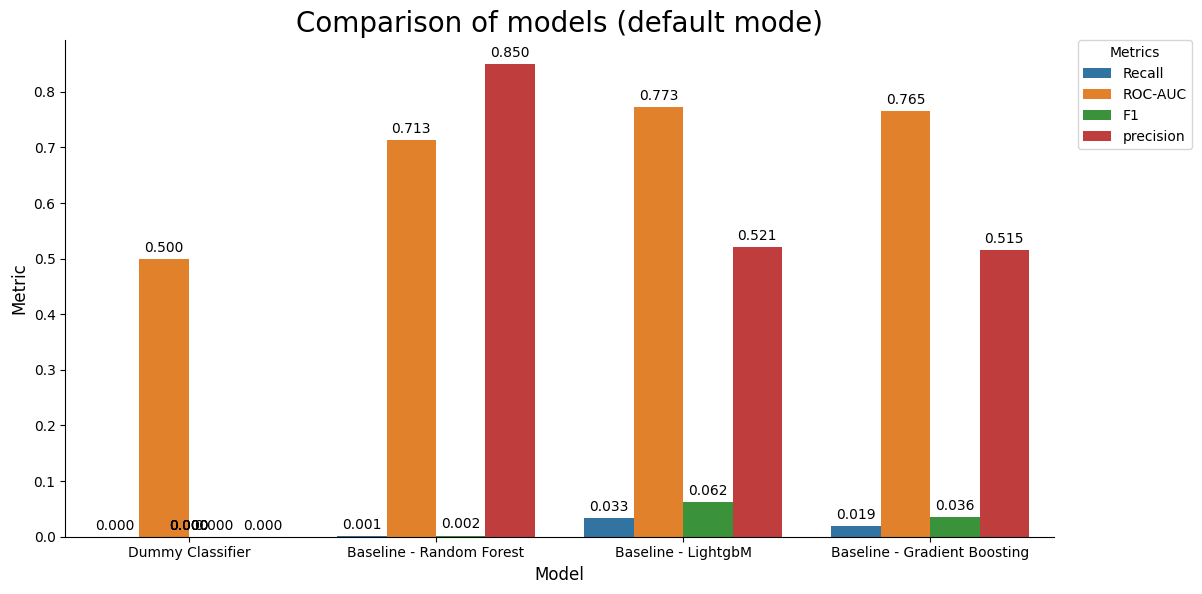

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_reduced, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of models (default mode)", size=20)
plt.legend(bbox_to_anchor=(1.14, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>LightGBM and Gradient Boosting got the best result based on ROC-AUC but, we have to consider the execution time that is not in the plot</p>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.3. Hyperparameters Tuning</h3>
</div>

<div class="alert alert-block alert-info">
    <p>For reasons of processing cost, we are going to tune the models with a subsample of the data.<br>Done this, we will proceed to continue the modeling with the parameters obtained.</p>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.1. Subsample of the data</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to do a subsamble of the dataset to tune some parameters before the modeling
   </p>
</div>

In [30]:
df_subsample = df_current_clients.copy()

In [31]:
df_subsample = df_subsample.sample(frac=0.2)

c:\Users\blede\OC\P7\functions.py:301: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels=labels, rotation=70, size=12,


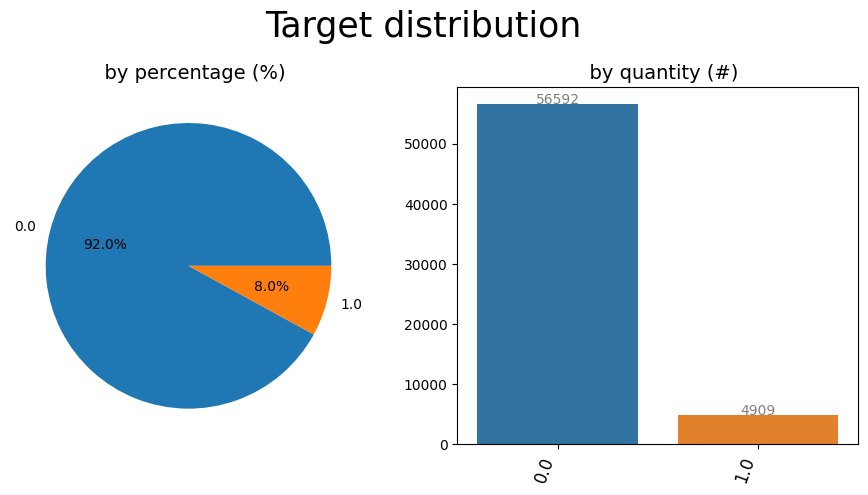

In [32]:
barplot_and_pie(df_subsample["TARGET"], "Target distribution", " ")

<div class="alert alert-block alert-info">
    <p>Now, we are going to split the subsample of the data to tune the models
   </p>
</div>

In [33]:
X_ss = df_subsample[TRAINING_COLUMNS]

In [34]:
y_target_ss = df_subsample.loc[:,"TARGET"]

In [35]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, y_target_ss, test_size=0.20, stratify=y_target_ss, random_state=42)

In [36]:
print("X_train_ss: {}".format(X_train_ss.shape))
print("y_train_ss: {}".format(y_train_ss.shape))
print("---------------------")
print("X_test_ss: {}".format(X_test_ss.shape))
print("y_test_ss: {}".format(y_test_ss.shape))

X_train_ss: (49200, 506)
y_train_ss: (49200,)
---------------------
X_test_ss: (12301, 506)
y_test_ss: (12301,)


<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.2. Random Forest</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's try to tune the Random Forest model</p>
    <p>Parameters settings</p>
</div>

In [37]:
param_grid = {
    "n_estimators" : np.arange(500, 1000, 100),
    "max_depth" : np.arange(20, 30, 2),
}

<div class="alert alert-block alert-info">
    <p>Executing the model</p>
</div>

In [38]:
clf_rf = RandomForestClassifier(random_state=42)

In [39]:
search_rf = HalvingGridSearchCV(clf_rf, param_grid, scoring="roc_auc", cv=stratified_kfold, n_jobs=-1)

In [40]:
mlflow.sklearn.autolog(disable=True)
if FIT_MODE_FT_RF:
    start_time_Hyp_tuning = timeit.default_timer()
    search_rf.fit(X_train_ss, y_train_ss)
    end_time_Hyp_tuning =  round(timeit.default_timer() - start_time_Hyp_tuning, 3)
    duration_min_clf_rf = round(end_time_Hyp_tuning/60, 1)
    search_rf_cv_results_df = pd.DataFrame(search_rf.cv_results_)
    search_rf_cv_results_df["duration_min_clf_rf"] = duration_min_clf_rf
    search_rf_cv_results_df.to_csv(DF_CV_RESULTS_HT_RF, index=False)
    best_params_rf = search_rf.best_params_
else:
    search_rf_cv_results_df = pd.read_csv(DF_CV_RESULTS_HT_RF)
    duration_min_clf_rf = search_rf_cv_results_df["duration_min_clf_rf"].unique()[0]
    best_params_rf = eval(search_rf_cv_results_df[search_rf_cv_results_df['rank_test_score'] == 1]['params'].to_list()[0])

In [41]:
print("Random Forest Classifier - Hyperparameters Tuning Duration (min): ",duration_min_clf_rf)

Random Forest Classifier - Hyperparameters Tuning Duration (min):  15.1


<div class="alert alert-block alert-info">
    <p>ROC-AUC score</p>
</div>

In [42]:
best_score_rf = search_rf_cv_results_df[search_rf_cv_results_df['rank_test_score'] == 1]['mean_test_score'].to_list()[0] 
best_score_rf  

0.7255141068146885

<div class="alert alert-block alert-info">
    <p>The best parameters</p>
</div>

In [43]:

best_params_rf

{'max_depth': 20, 'n_estimators': 600}

In [44]:
rf_parameters = best_params_rf

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.3. LightGBM</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's try to tune the Random LightGBM</p>
    <p>Parameters settings</p>
</div>

In [45]:
param_grid = {
    "n_estimators" : [8000, 10000],
    "num_leaves" : [32, 34], 
    "max_depth" : [8, 9]
}

<div class="alert alert-block alert-info">
    <p>Executing the model</p>
</div>

In [46]:
clf_lgbm = LGBMClassifier(random_state=42)

In [47]:
search_lgbm = HalvingGridSearchCV(clf_lgbm, param_grid, scoring="roc_auc", cv=stratified_kfold, n_jobs=-1)

In [48]:
if FIT_MODE_FT_lgbm:
    start_time_Hyp_tuning = timeit.default_timer()
    
    search_lgbm.fit(X_train_ss, y_train_ss)
    
    end_time_Hyp_tuning =  round(timeit.default_timer() - start_time_Hyp_tuning, 3)
    duration_min_clf_lgbm = round(end_time_Hyp_tuning/60, 1)
    search_lgbm_cv_results_df = pd.DataFrame(search_lgbm.cv_results_)
    search_lgbm_cv_results_df["duration_min_clf_rf"] = duration_min_clf_lgbm
    search_lgbm_cv_results_df.to_csv(DF_CV_RESULTS_HT_lgbm, index=False)
    best_params_lgbm = search_lgbm.best_params_
else:
    search_lgbm_cv_results_df = pd.read_csv(DF_CV_RESULTS_HT_lgbm)
    duration_min_clf_lgbm = search_lgbm_cv_results_df["duration_min_clf_rf"].unique()[0]
    best_params_lgbm = eval(search_lgbm_cv_results_df[search_lgbm_cv_results_df['rank_test_score'] == 1]['params'].to_list()[0])

In [49]:
print("LightGBM - Hyperparameters Tuning Duration (min): ",duration_min_clf_lgbm)

LightGBM - Hyperparameters Tuning Duration (min):  21.9


<div class="alert alert-block alert-info">
    <p>ROC-AUC score</p>
</div>

In [50]:
best_score_lgbm = search_lgbm_cv_results_df[search_lgbm_cv_results_df['rank_test_score'] == 1]['mean_test_score'].to_list()[0] 
best_score_lgbm  
# search_lgbm.best_score_

0.7274565671705074

<div class="alert alert-block alert-info">
    <p>The best parameters</p>
</div>

In [51]:
best_params_lgbm
# search_lgbm.best_params_

{'max_depth': 9, 'n_estimators': 8000, 'num_leaves': 32}

In [52]:
lgbm_parameters = best_params_lgbm
# lgbm_parameters = search_lgbm.best_params_

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.4. Gradient Boosting</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's try to tune the Random LightGBM</p>
    <p>Parameters settings</p>
</div>

In [53]:
param_grid = {
    "n_estimators" : np.arange(500, 1000, 100),
    "max_depth" : np.arange(20, 30, 2),
}

<div class="alert alert-block alert-info">
    <p>Executing the model.<br>In this case, we are going to add some parameters to reduce the execution time</p>
</div>

In [54]:
clf_gb = GradientBoostingClassifier(validation_fraction=0.2, 
                                    n_iter_no_change=5,
                                    tol=0.01,
                                    random_state=42)

In [55]:
search_gb = HalvingGridSearchCV(clf_gb, param_grid, scoring="roc_auc", cv=stratified_kfold, n_jobs=-1)

In [56]:
if FIT_MODE_FT_gb:
    start_time_Hyp_tuning = timeit.default_timer()
    search_gb.fit(X_train_ss, y_train_ss)
    end_time_Hyp_tuning =  round(timeit.default_timer() - start_time_Hyp_tuning, 3)
    duration_min_clf_gb = round(end_time_Hyp_tuning/60, 1)
    search_gb_cv_results_df = pd.DataFrame(search_gb.cv_results_)
    search_gb_cv_results_df["duration_min_clf_gb"] = duration_min_clf_gb
    search_gb_cv_results_df.to_csv(DF_CV_RESULTS_HT_gb, index=False)
    best_params_gb = search_gb.best_params_
else:
    search_gb_cv_results_df = pd.read_csv(DF_CV_RESULTS_HT_gb)
    duration_min_clf_gb = search_gb_cv_results_df["duration_min_clf_gb"].unique()[0]
    best_params_gb = eval(search_gb_cv_results_df[search_gb_cv_results_df['rank_test_score'] == 1]['params'].to_list()[0])

In [57]:
print("Gradient Boosting - Hyperparameters Tuning Duration (min): ",duration_min_clf_gb)

Gradient Boosting - Hyperparameters Tuning Duration (min):  4.8


<div class="alert alert-block alert-info">
    <p>ROC-AUC score</p>
</div>

In [58]:
best_score_gb = search_gb_cv_results_df[search_gb_cv_results_df['rank_test_score'] == 1]['mean_test_score'].to_list()[0] 
best_score_gb  
# search_gb.best_score_

0.6190052212487104

<div class="alert alert-block alert-info">
    <p>The best parameters</p>
</div>

In [59]:
best_params_gb
# search_gb.best_params_

{'max_depth': 20, 'n_estimators': 700}

In [60]:
gb_parameters = best_params_gb
# gb_parameters = search_gb.best_params_

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">7. features importances</h2>
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.1. lgbm features importances</h3>
</div>

In [61]:
X_train_ss_tr = X_train_ss.copy()
X_train_ss_tr['TARGET']=y_train_ss
X_test_ss_tr = X_test_ss.copy()
X_test_ss_tr['TARGET']=y_test_ss
X_train_ss_tr.reset_index(inplace=True)
X_test_ss_tr.reset_index(inplace=True)

In [62]:
X_test_ss_tr.shape

(12301, 508)

In [63]:
%%time
fs_threshold=0.8
# Define, and Save the selected_features to csv 
if GENERATE_NEW_FS_LIST:
    fi_test_ss, metrics_test_ss = CV_train_test_model_lgbm(X_train_ss_tr, X_test_ss_tr)
    fi_test_ss_plot=fi_test_ss.copy()
    fi_test_ss_plot = fi_test_ss_plot.sort_values('importance', ascending = False).reset_index(drop=True)
    fi_test_ss_plot['importance_normalized'] = fi_test_ss_plot['importance'] / fi_test_ss_plot['importance'].sum()
    # Calculate the cumulative sum
    fi_test_ss_plot['cumulative_sum'] = fi_test_ss_plot['importance_normalized'].cumsum()
    
    # Sort the DataFrame in descending order based on the cumulative sum
    fi_test_ss_plot = fi_test_ss_plot.sort_values('cumulative_sum', ascending=True)
    
    # Plot the cumulative sum using seaborn
    fig = plt.figure(figsize=(10, 5)) 
    p = sns.barplot(x='feature', y='cumulative_sum',  data=fi_test_ss_plot)
    # Add a vertical line at cumulative sum < 0.85
    highlighted_params = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold]['feature']
    highlighted_indices = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold].index
    for i in highlighted_indices:
        p.get_children()[i].set_color('green')
    p.set_xticklabels([]) 
    plt.show()
    
    # Filter the DataFrame based on the condition
    filtered_df = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold]
    
    # Get the list of parameters
    fs_list = filtered_df['feature'].tolist()
    fs_list.remove('index')

    # Save the selected_features to csv
    keys=["fs_list"]
    values=[[fs_list]]
    dict_fs_list=dict(zip(keys, values))
    df_fs_list = pd.DataFrame(dict_fs_list)
    df_fs_list.to_csv(DF_FS_LIST, index=False)

else:
    fs_list = pd.read_csv(DF_FS_LIST)
    fs_list = eval(fs_list.iloc[0,0])
    # fs_list.remove('index')

CPU times: total: 0 ns
Wall time: 3 ms


In [64]:

# fi_test_ss_plot=fi_test_ss.copy()
# fi_test_ss_plot = fi_test_ss_plot.sort_values('importance', ascending = False).reset_index(drop=True)
# fi_test_ss_plot['importance_normalized'] = fi_test_ss_plot['importance'] / fi_test_ss_plot['importance'].sum()
# # Calculate the cumulative sum
# fi_test_ss_plot['cumulative_sum'] = fi_test_ss_plot['importance_normalized'].cumsum()

# # Sort the DataFrame in descending order based on the cumulative sum
# fi_test_ss_plot = fi_test_ss_plot.sort_values('cumulative_sum', ascending=True)

# # Plot the cumulative sum using seaborn
# fig = plt.figure(figsize=(10, 5)) 
# p = sns.barplot(x='feature', y='cumulative_sum',  data=fi_test_ss_plot)
# # Add a vertical line at cumulative sum < 0.85
# highlighted_params = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold]['feature']
# highlighted_indices = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold].index
# for i in highlighted_indices:
#     p.get_children()[i].set_color('green')
# p.set_xticklabels([]) 
# plt.show()

In [65]:
# # Filter the DataFrame based on the condition
# filtered_df = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold]

# # Get the list of parameters
# fs_list = filtered_df['feature'].tolist()
# fs_list.remove('index')

In [66]:
len(fs_list)

131

In [67]:
# # Save the selected_features to csv 
# if GENERATE_NEW_FS_LIST:
#     keys=["fs_list"]
#     values=[[fs_list]]
#     dict_fs_list=dict(zip(keys, values))
#     df_fs_list = pd.DataFrame(dict_fs_list)
#     df_fs_list.to_csv(DF_FS_LIST, index=False)
# else:
#     fs_list = pd.read_csv(DF_FS_LIST)
#     fs_list = eval(fs_list.iloc[0,0])
#     fs_list.remove('index')

In [68]:
X_fs = X[fs_list]
X_train_fs = X_train[fs_list]
X_test_fs = X_test[fs_list]
print(f" X_fs.shape: {X_fs.shape} \n X_train_fs.shape: {X_train_fs.shape} \n X_test_fs.shape: {X_test_fs.shape}")

 X_fs.shape: (307507, 131) 
 X_train_fs.shape: (246005, 131) 
 X_test_fs.shape: (61502, 131)


<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">8. Modelisation using class_weight</h2>
</div>

In [69]:
def threshold_selection(y_test, y_prob, metrics=f1_score, print_results=False):
    """
    Method used to calculate the threshold based on the Custom Score.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        y_test (1d array-like): True values
        y_prob (1d array-like): Probabilite values predicted
        
    Returns:
    -----------------
        threshold (float) : Best threshold value
        Threshold (image) : Plot the threshold and the best score
    """
    
    thresholds = np.arange(0, 1, 0.001)
    scores = []
    y_preds = []
    
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype("int")
        if metrics=='average_precision_score':
            score = average_precision_score(y_test, y_pred, average='weighted')
        else:
            score = metrics(y_test, y_pred)
        scores.append(score)
        y_preds.append(y_pred)
        
    scores = np.asarray(scores)
    ix = np.argmax(scores)
    
    best_y_pred, best_threshold, best_score = (y_preds[ix], round(thresholds[ix],3), round(scores[ix], 3))

    if print_results:
        print("Best results")
        print("- Best Threshold:\t", best_threshold)
        print("- Best Score:\t\t", best_score)
        print("\n")
    
    plt.subplots(1, figsize=(6, 5))
    plt.plot(thresholds, scores, lw=1)
    plt.axvline(best_threshold, ls="--", lw=1, c="r")
    plt.title("Threshold")
    plt.xlabel("proba threshold")
    plt.ylabel("Score performed")
    plt.show()
    
    return best_threshold , best_y_pred, best_score

In [70]:
def custom_score(y_test, y_pred):
    """
    Method used to calculate a score based on the penalization of False Negatives.

    Parameters:
    -----------------
        y_test (series): True values
        y_pred (series): Predicted values
        threshold (float): Threshold value to use
        
    Returns:
    -----------------
        Score. (float): Score obtained based on the rules defined to measure. 
    """
    
    TN_rate = 1        # Loans that are not in default and were predicted correctly
    TP_rate = 1        # Loans that are in default and were predicted correctly
    FP_rate = -1        # Loans that are not in default and were predicted incorrectly
    FN_rate = -10      # Loans that are in default and were were predicted incorrectly
    
    # Getting all values based on confusion matrix
    (TN, FP, FN, TP) = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

    # Total of default and not default cases
    total_not_default = TN + FP     # Not default cases
    total_default = TP + FN         # Default cases 
    
    gain_total = TN*TN_rate + TP*TP_rate + FP*FP_rate + FN*FN_rate
    gain_maximun = total_not_default*TN_rate + total_default*TP_rate
    gain_minumun = total_not_default*TN_rate + total_default*FN_rate
    
    # normalize to get score between 0 (baseline) and 1
    score = (gain_total - gain_minumun) / (gain_maximun - gain_minumun)
    
    return score

<div class="alert alert-block alert-info">
    <p>At this point, we are going to use the parameter <b>class_weight</b> to affect the computation of the model to penalize differently a false classification from the minority and majority class </p>
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.1. Random Forest</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's execute the model considering the parameters obtained</p>
</div>

In [71]:
clf_rf_cw = RandomForestClassifier(**rf_parameters,
                                   class_weight="balanced",
                                   random_state=42,
                                   n_jobs=-1)

<div class="alert alert-block alert-info">
    <p>Executing the model with the complete dataset</p>
</div>

In [72]:

if FIT_MODE_RF_CW:
    start_time_model = timeit.default_timer()
    # with mlflow.start_run(run_name = 'classif_randof_class_weight'):
    clf_rf_cw.fit(X_train_fs, y_train)
    end_time_model_clf_rf_cw =  round(timeit.default_timer() - start_time_model, 3)

    pickle.dump(clf_rf_cw, open(CLF_RF_CW_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_rf_cw, open(DURATION_MODEL_CLF_RF_CW, 'wb'))
else:
    clf_rf_cw = pickle.load(open(CLF_RF_CW_FILENAME, 'rb'))
    end_time_model_clf_rf_cw = pickle.load(open(DURATION_MODEL_CLF_RF_CW, 'rb'))

In [73]:
end_time_model_clf_rf_cw

213.953

In [74]:
# clf_rf_cw_load

In [75]:
clf_rf_cw.n_features_in_

131

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

Best results
- Best Threshold:	 0.286
- Best Score:		 0.152




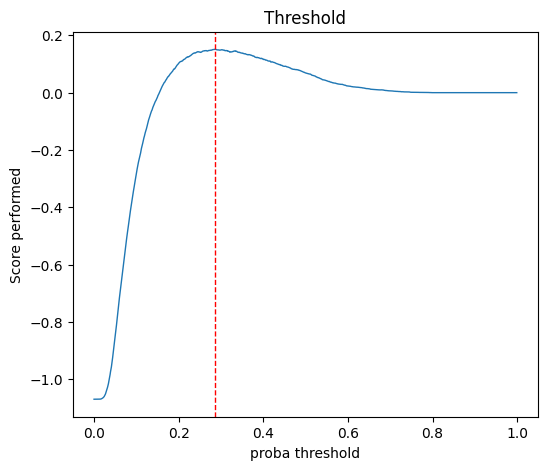

In [76]:
y_pred = clf_rf_cw.predict(X_test_fs)
y_prob = clf_rf_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]
_, _, metrics_score_clf_rf_cw = threshold_selection(y_test, y_prob, metrics=custom_score, print_results=True)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [77]:
roc_auc_clf_rf_cw = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_rf_cw, recall_1_clf_rf_cw = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_cw = round(f1_score(y_test, y_pred), 3)
precision_clf_rf_cw = round(precision_score(y_test, y_pred), 3)
print(" roc_auc_clf_rf_cw: " + str(roc_auc_clf_rf_cw) + "\n recall_1_clf_rf_cw: "+ str(recall_1_clf_rf_cw) + "\n f1_clf_rf_cw: "+str(f1_clf_rf_cw)+ "\n precision_clf_rf_cw: "+str(precision_clf_rf_cw))

 roc_auc_clf_rf_cw: 0.748
 recall_1_clf_rf_cw: 0.107
 f1_clf_rf_cw: 0.162
 precision_clf_rf_cw: 0.34


In [78]:
# roc_auc_clf_rf_cw = round(roc_auc_score(y_test, y_prob), 3)
# recall_0_clf_rf_cw, recall_1_clf_rf_cw = recall_score(y_test, y_pred, average=None).round(3)
# f1_clf_rf_cw = round(f1_score(y_test, y_pred), 3)
# precision_clf_rf_cw = round(precision_score(y_test, y_pred), 3)

In [79]:
roc_auc_clf_rf_cw

0.748

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

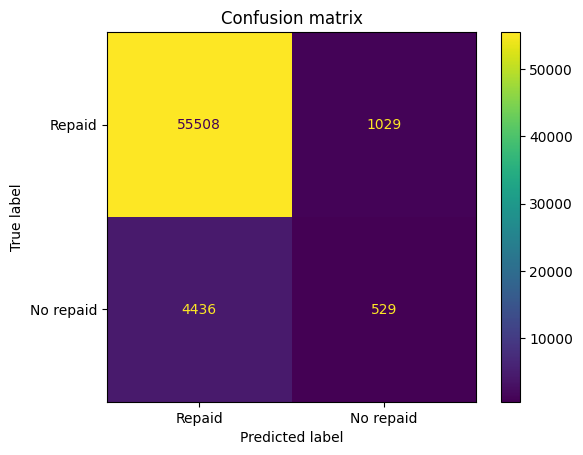

In [80]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

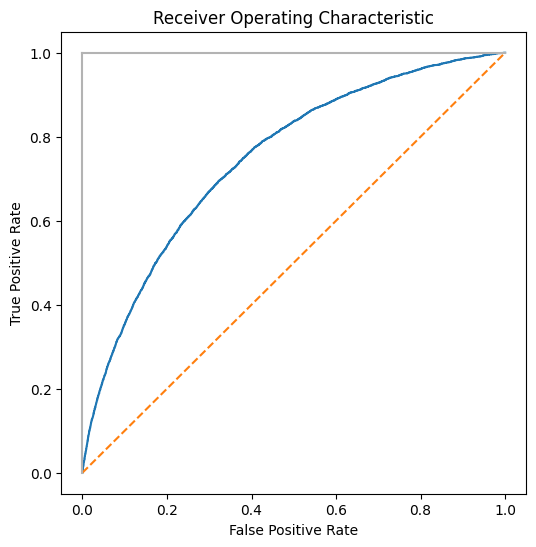

In [81]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

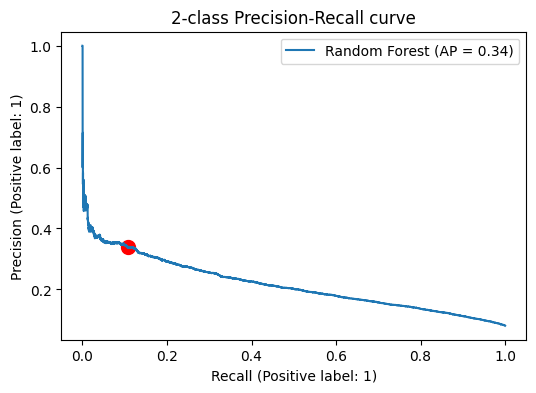

In [82]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_rf_cw, precision_clf_rf_cw, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Random Forest (AP = %.2f)"% (precision_clf_rf_cw)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [83]:
df_models_metrics_complete = pd.DataFrame({
    "Model" : ["Class weight - Random Forest"],
    "Threshold" : 0.5,
    "Business": metrics_score_clf_rf_cw,
    "ROC-AUC" : roc_auc_clf_rf_cw,    
    # "Recall - 0" : recall_0_clf_rf_cw,
    "Precision - 1" : precision_clf_rf_cw,
    "Recall - 1" : recall_1_clf_rf_cw,
    "F1 - 1" : f1_clf_rf_cw,    
    "Duration (min)" : round(end_time_model_clf_rf_cw/60, 1)
})

In [84]:
df_models_metrics_complete

Model  Threshold  Business  ROC-AUC  Precision - 1  \
0  Class weight - Random Forest        0.5     0.152    0.748           0.34   

   Recall - 1  F1 - 1  Duration (min)  
0       0.107   0.162             3.6

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.2. LightGBM</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's execute the model considering the parameters obtained</p>
    <p>In this case, we are also going to consider the parameters used on the Kernel's Kaggle selected</p>
</div>

In [85]:
clf_lgbm_cw = LGBMClassifier(**lgbm_parameters, class_weight="balanced", learning_rate=0.02,
                             colsample_bytree=0.9497036, subsample=0.8715623,
                             reg_alpha=0.041545473, reg_lambda=0.0735294,
                             min_split_gain=0.0222415, min_child_weight=39.3259775,
                             random_state=42, n_jobs=-1)

<div class="alert alert-block alert-info">
    <p>Executing the model with the complete dataset</p>
</div>

In [86]:
if FIT_MODE_lgbm_CW:
    start_time_model = timeit.default_timer()
    
    clf_lgbm_cw.fit(X_train_fs, y_train)
    
    end_time_model_clf_lgbm_cw =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_lgbm_cw, open(CLF_lgbm_CW_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_lgbm_cw, open(DURATION_MODEL_CLF_lgbm_CW, 'wb'))
else:
    clf_lgbm_cw = pickle.load(open(CLF_lgbm_CW_FILENAME, 'rb'))
    end_time_model_clf_lgbm_cw = pickle.load(open(DURATION_MODEL_CLF_lgbm_CW, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

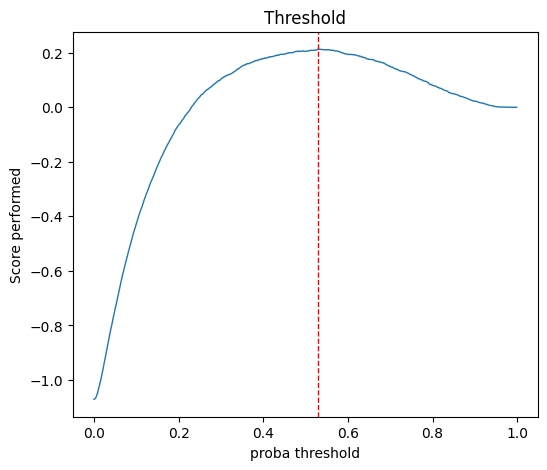

In [87]:
y_pred = clf_lgbm_cw.predict(X_test_fs)
y_prob = clf_lgbm_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]
_, _, metrics_score_clf_lgbm_cw = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [88]:
roc_auc_clf_lgbm_cw = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_lgbm_cw, recall_1_clf_lgbm_cw = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_cw = round(f1_score(y_test, y_pred), 3)
precision_clf_lgbm_cw = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

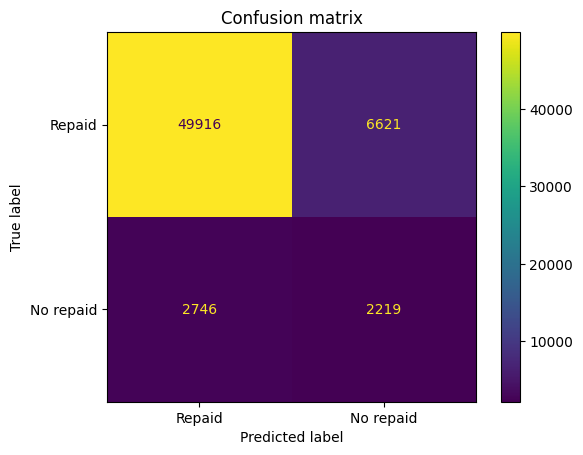

In [89]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

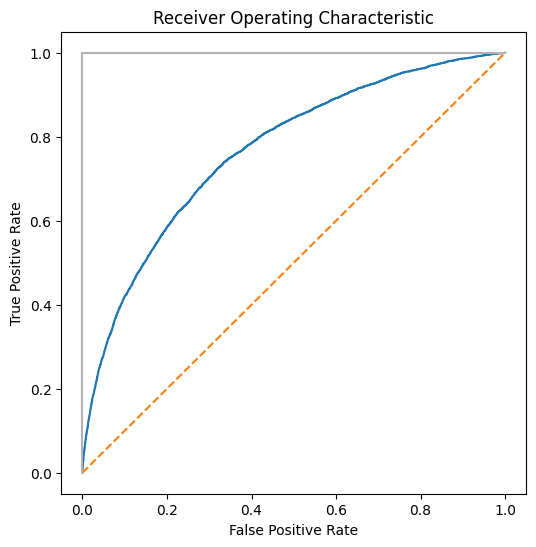

In [90]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

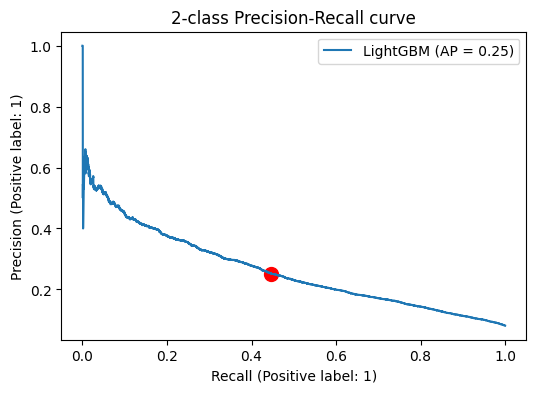

In [91]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_lgbm_cw, precision_clf_lgbm_cw, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["LightGBM (AP = %.2f)"% (precision_clf_lgbm_cw)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [92]:
df_temp = pd.DataFrame({
    "Model" : ["Class weight - LightGBM"],
    "Threshold" : 0.5,
    "Business": metrics_score_clf_lgbm_cw,
    "ROC-AUC" : roc_auc_clf_lgbm_cw,    
    # "Recall - 0" : recall_0_clf_lgbm_cw,
    "Precision - 1" : precision_clf_lgbm_cw,
    "Recall - 1" : recall_1_clf_lgbm_cw,
    "F1 - 1" : f1_clf_lgbm_cw,    
    "Duration (min)" : round(end_time_model_clf_lgbm_cw/60, 1)
})

In [93]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

Model  Threshold  Business  ROC-AUC  Precision - 1  \
0  Class weight - Random Forest        0.5     0.152    0.748          0.340   
1       Class weight - LightGBM        0.5     0.213    0.767          0.251   

   Recall - 1  F1 - 1  Duration (min)  
0       0.107   0.162             3.6  
1       0.447   0.321             3.4

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.3. Gradient Boosting</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Unfortunately, Gradient Boosting (gbM) doesn't have a parameters call <b>class_weight</b> to treat with Imbalanced Class.</p>
    <p>But, gbM deals with class imbalance by constructing successive training sets based on incorrectly classified examples</p>
</div>

In [94]:
clf_gb_cw = GradientBoostingClassifier(**gb_parameters, 
                                       validation_fraction=0.2, 
                                       n_iter_no_change=5,
                                       tol=0.01, random_state=42)

<div class="alert alert-block alert-info">
    <p>Executing the model with the complete dataset</p>
</div>

In [95]:
if FIT_MODE_gb_CW:
    start_time_model = timeit.default_timer()
    
    clf_gb_cw.fit(X_train_fs, y_train)
    
    end_time_model_clf_gb_cw =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_gb_cw, open(CLF_gb_CW_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_gb_cw, open(DURATION_MODEL_CLF_gb_CW, 'wb'))
else:
    clf_gb_cw = pickle.load(open(CLF_gb_CW_FILENAME, 'rb'))
    end_time_model_clf_gb_cw = pickle.load(open(DURATION_MODEL_CLF_gb_CW, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

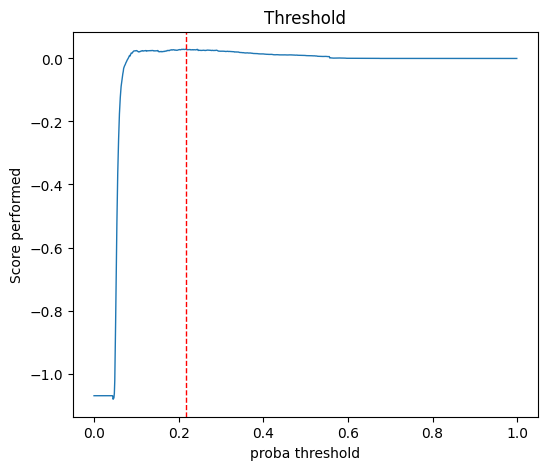

In [96]:
y_pred = clf_gb_cw.predict(X_test_fs)
y_prob = clf_gb_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]
_, _, metrics_score_clf_gb_cw = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [97]:
roc_auc_clf_gb_cw = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_gb_cw, recall_1_clf_gb_cw = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_cw = round(f1_score(y_test, y_pred), 3)
precision_clf_gb_cw = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

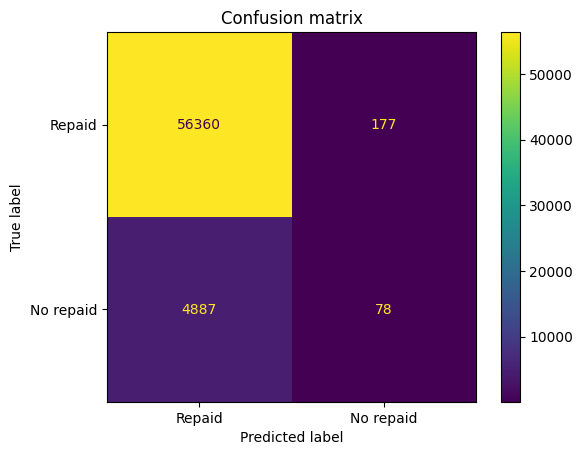

In [98]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

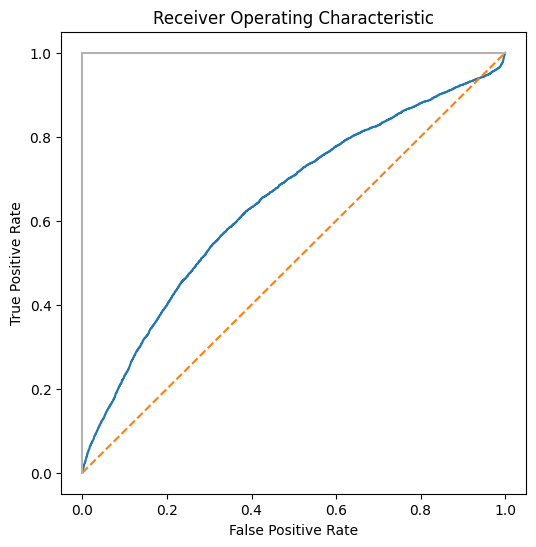

In [99]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

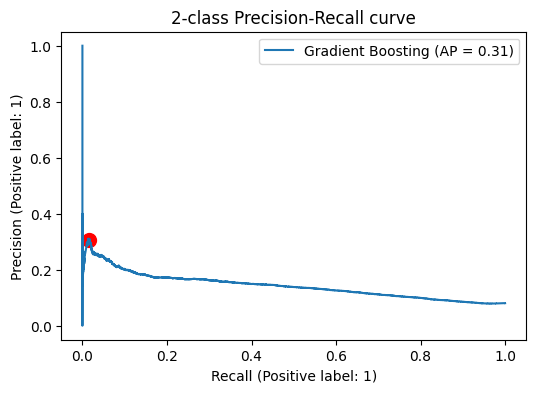

In [100]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_gb_cw, precision_clf_gb_cw, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Gradient Boosting (AP = %.2f)"% (precision_clf_gb_cw)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [101]:
df_temp = pd.DataFrame({
    "Model" : ["Tuned - Gradient Boosting"],
    "Threshold" : 0.5,
    "Business": metrics_score_clf_gb_cw,
    "ROC-AUC" : roc_auc_clf_gb_cw,    
    # "Recall - 0" : recall_0_clf_gb_cw,
    "Precision - 1" : precision_clf_gb_cw,
    "Recall - 1" : recall_1_clf_gb_cw,
    "F1 - 1" : f1_clf_gb_cw,    
    "Duration (min)" : round(end_time_model_clf_gb_cw/60, 1)
})

In [102]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

Model  Threshold  Business  ROC-AUC  Precision - 1  \
0  Class weight - Random Forest        0.5     0.152    0.748          0.340   
1       Class weight - LightGBM        0.5     0.213    0.767          0.251   
2     Tuned - Gradient Boosting        0.5     0.029    0.643          0.306   

   Recall - 1  F1 - 1  Duration (min)  
0       0.107   0.162             3.6  
1       0.447   0.321             3.4  
2       0.016   0.030             4.5

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li><b>Class weight - Random Forest</b> and <b>Class weight - LightGBM</b> have improved their scores</li>
        <li><b>Tuned - Gradient Boosting</b> doesn't have a parameter Class weight to treat with Imbalanced Class. It treats Imbalanced Class internally</li>
    </ul>    
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">9. Modelisation using OverSampling</h2>
</div>

<div class="alert alert-block alert-info">
    <p>To treat the unbalanced class, we are going to implement OverSampling technique with SMOTE.</p>
</div>

In [103]:
smote = SMOTE(random_state=42, n_jobs=-1)

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.1. Random Forest</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [104]:
clf_rf_os = imbpipeline(steps = [["Smote", smote],
                                 ["Random_Forest", RandomForestClassifier(**rf_parameters,
                                                                          random_state=42,
                                                                          n_jobs=-1)]
                                 ]
                        )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [105]:
if FIT_MODE_RF_OS:
    start_time_model = timeit.default_timer()
    
    clf_rf_os.fit(X_train_fs, y_train)
    
    end_time_model_clf_rf_os =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_rf_os, open(CLF_RF_OS_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_rf_os, open(DURATION_MODEL_CLF_RF_OS, 'wb'))
else:
    clf_rf_os = pickle.load(open(CLF_RF_OS_FILENAME, 'rb'))
    end_time_model_clf_rf_os = pickle.load(open(DURATION_MODEL_CLF_RF_OS, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

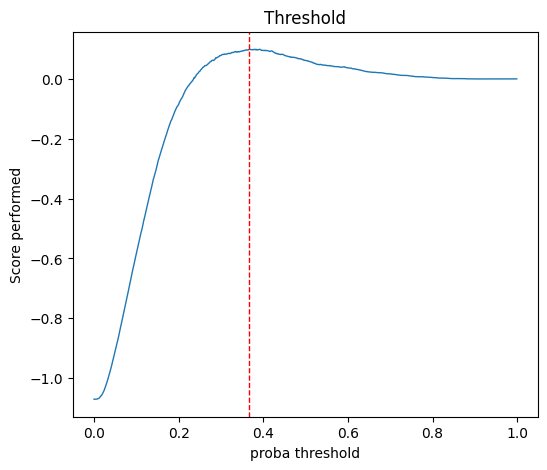

In [106]:
y_pred = clf_rf_os.predict(X_test_fs)
y_prob = clf_rf_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]
_, _, metrics_score_clf_rf_os = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [107]:
roc_auc_clf_rf_os = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_rf_os, recall_1_clf_rf_os = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_os = round(f1_score(y_test, y_pred), 3)
precision_clf_rf_os = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

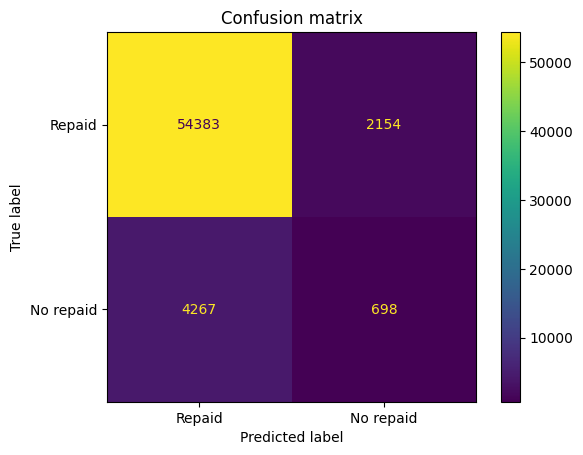

In [108]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

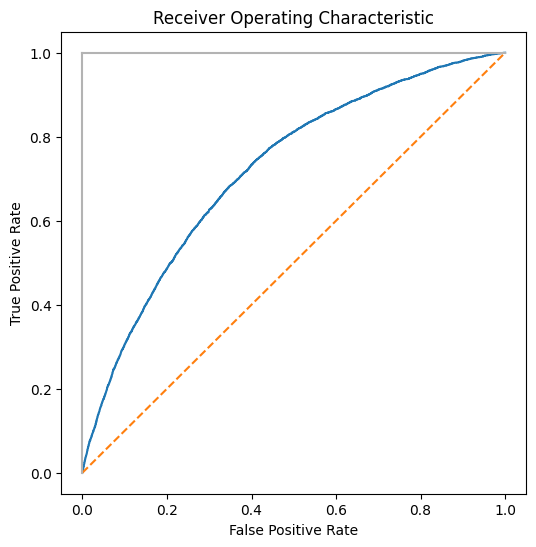

In [109]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

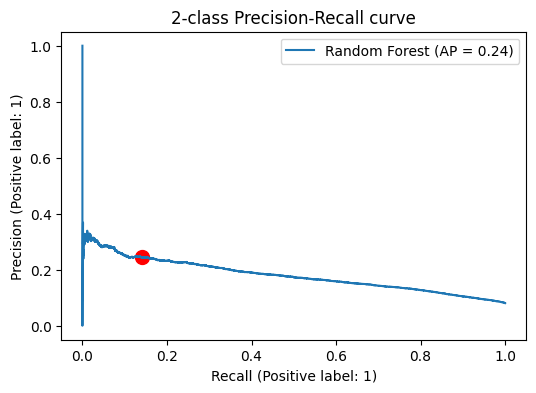

In [110]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_rf_os, precision_clf_rf_os, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Random Forest (AP = %.2f)"% (precision_clf_rf_os)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [111]:
df_temp = pd.DataFrame({
    "Model" : ["OverSampling - Random Forest"],
    "Threshold" : 0.5,
    "Business": metrics_score_clf_rf_os,
    "ROC-AUC" : roc_auc_clf_rf_os,    
    # "Recall - 0" : recall_0_clf_rf_os,
    "Precision - 1" : precision_clf_rf_os,
    "Recall - 1" : recall_1_clf_rf_os,    
    "F1 - 1" : f1_clf_rf_os,    
    "Duration (min)" : round(end_time_model_clf_rf_os/60, 1)
})

In [112]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  ROC-AUC  Precision - 1  \
0  Class weight - Random Forest        0.5     0.152    0.748          0.340   
1       Class weight - LightGBM        0.5     0.213    0.767          0.251   
2     Tuned - Gradient Boosting        0.5     0.029    0.643          0.306   
3  OverSampling - Random Forest        0.5     0.099    0.720          0.245   

   Recall - 1  F1 - 1  Duration (min)  
0       0.107   0.162             3.6  
1       0.447   0.321             3.4  
2       0.016   0.030             4.5  
3       0.141   0.179             9.4

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.2. LightGBM</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [113]:
clf_lgbm_os = imbpipeline(steps = [["Smote", smote],
                                   ["LightGBM", LGBMClassifier(**lgbm_parameters, learning_rate=0.02,
                                                                    colsample_bytree=0.9497036, subsample=0.8715623,
                                                                    reg_alpha=0.041545473, reg_lambda=0.0735294,
                                                                    min_split_gain=0.0222415, min_child_weight=39.3259775,
                                                                    random_state=42, n_jobs=-1)]
                                   ]
                          )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [114]:
if FIT_MODE_lgbm_OS:
    start_time_model = timeit.default_timer()
    
    clf_lgbm_os.fit(X_train_fs, y_train, LightGBM__callbacks=[early_stopping(stopping_rounds=50)], LightGBM__eval_set=[(X_test_fs, y_test)])
    
    end_time_model_clf_lgbm_os =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_lgbm_os, open(CLF_lgbm_OS_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_lgbm_os, open(DURATION_MODEL_CLF_lgbm_OS, 'wb'))
else:
    clf_lgbm_os = pickle.load(open(CLF_lgbm_OS_FILENAME, 'rb'))
    end_time_model_clf_lgbm_os = pickle.load(open(DURATION_MODEL_CLF_lgbm_OS, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

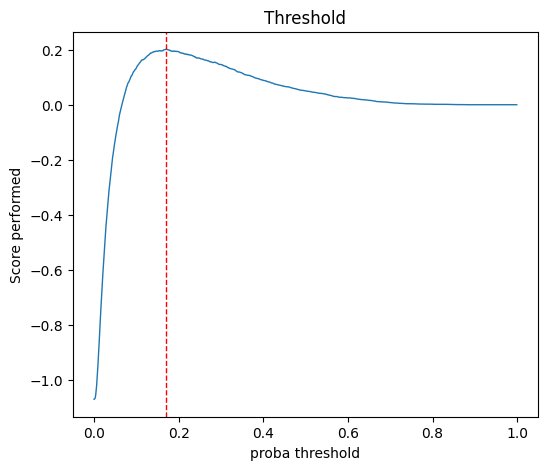

In [115]:
y_pred = clf_lgbm_os.predict(X_test_fs)
y_prob = clf_lgbm_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]
_, _, metrics_score_clf_lgbm_os = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [116]:
roc_auc_clf_lgbm_os = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_lgbm_os, recall_1_clf_lgbm_os = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_os = round(f1_score(y_test, y_pred), 3)
precision_clf_lgbm_os = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

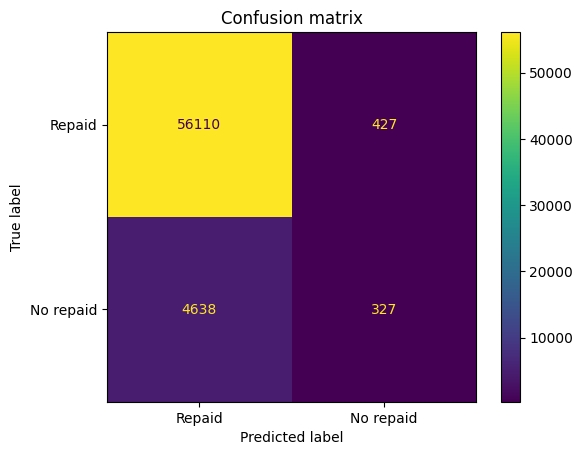

In [117]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

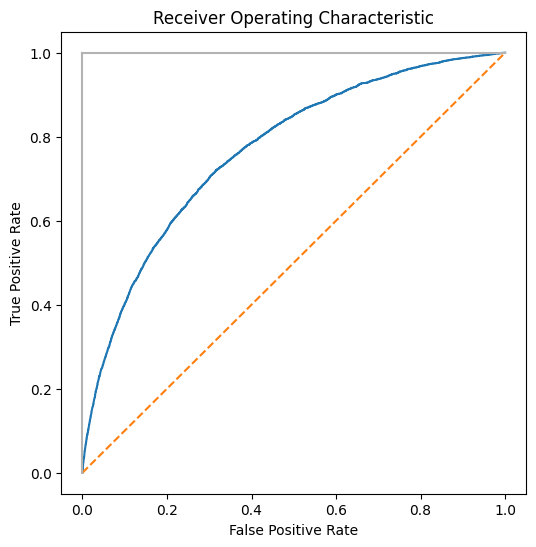

In [118]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

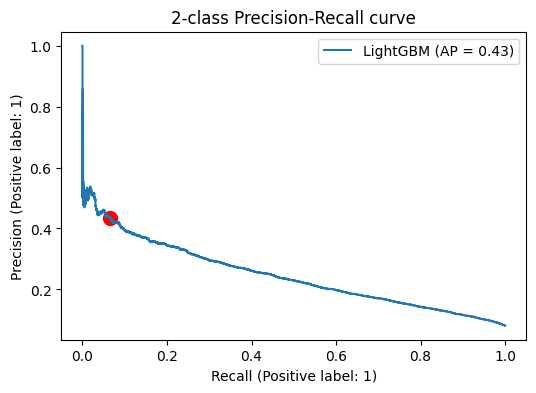

In [119]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_lgbm_os, precision_clf_lgbm_os, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["LightGBM (AP = %.2f)"% (precision_clf_lgbm_os)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [120]:
df_temp = pd.DataFrame({
    "Model" : ["OverSampling - LightGBM"],
    "Threshold" : 0.5,
    "Business": metrics_score_clf_lgbm_os,
    "ROC-AUC" : roc_auc_clf_lgbm_os,    
    # "Recall - 0" : recall_0_clf_lgbm_os,
    "Precision - 1" : precision_clf_lgbm_os,
    "Recall - 1" : recall_1_clf_lgbm_os,    
    "F1 - 1" : f1_clf_lgbm_os,    
    "Duration (min)" : round(end_time_model_clf_lgbm_os/60, 1)
})

In [121]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  ROC-AUC  Precision - 1  \
0  Class weight - Random Forest        0.5     0.152    0.748          0.340   
1       Class weight - LightGBM        0.5     0.213    0.767          0.251   
2     Tuned - Gradient Boosting        0.5     0.029    0.643          0.306   
3  OverSampling - Random Forest        0.5     0.099    0.720          0.245   
4       OverSampling - LightGBM        0.5     0.202    0.767          0.434   

   Recall - 1  F1 - 1  Duration (min)  
0       0.107   0.162             3.6  
1       0.447   0.321             3.4  
2       0.016   0.030             4.5  
3       0.141   0.179             9.4  
4       0.066   0.114             2.9

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.3. Gradient Boosting</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [122]:
clf_gb_os = imbpipeline(steps = [["Smote", smote],
                                 ["Gradient Boosting", GradientBoostingClassifier(**gb_parameters,
                                                                                  validation_fraction=0.2, 
                                                                                  n_iter_no_change=5,
                                                                                  tol=0.01, random_state=42)]
                                ]
                       )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [123]:
if FIT_MODE_gb_OS:
    start_time_model = timeit.default_timer()
    
    clf_gb_os.fit(X_train_fs, y_train)
    
    end_time_model_clf_gb_os =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_gb_os, open(CLF_gb_OS_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_gb_os, open(DURATION_MODEL_CLF_gb_OS, 'wb'))
else:
    clf_gb_os = pickle.load(open(CLF_gb_OS_FILENAME, 'rb'))
    end_time_model_clf_gb_os = pickle.load(open(DURATION_MODEL_CLF_gb_OS, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

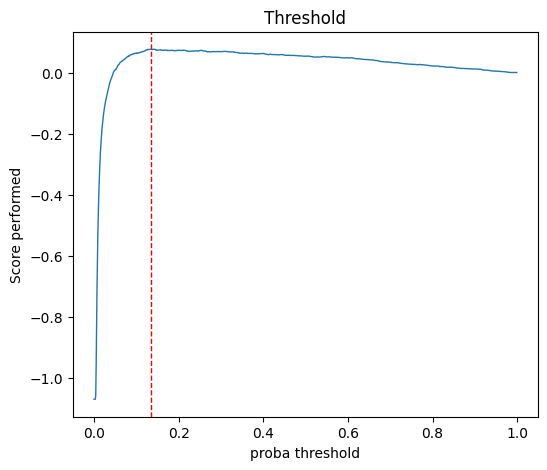

In [124]:
y_pred = clf_gb_os.predict(X_test_fs)
y_prob = clf_gb_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]
_, _, metrics_score_clf_gb_os = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [125]:
roc_auc_clf_gb_os = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_gb_os, recall_1_clf_gb_os = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_os = round(f1_score(y_test, y_pred), 3)
precision_clf_gb_os = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

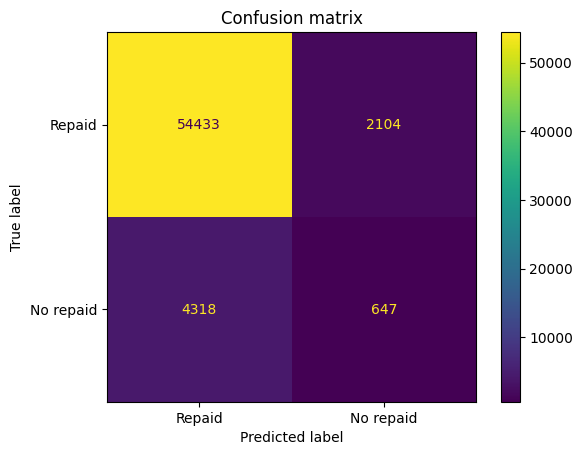

In [126]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

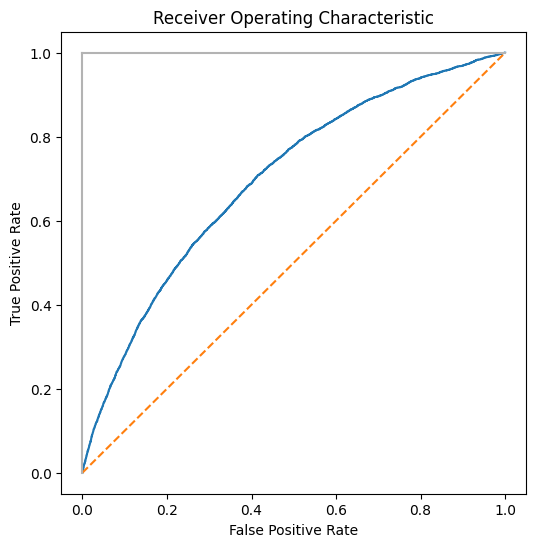

In [127]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

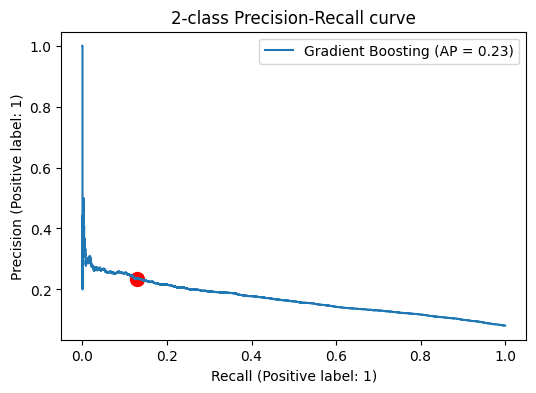

In [128]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4")
plt.scatter(recall_1_clf_gb_os, precision_clf_gb_os, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Gradient Boosting (AP = %.2f)"% (precision_clf_gb_os)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [129]:
df_temp = pd.DataFrame({
    "Model" : ["OverSampling - Gradient Boosting"],
    "Threshold" : 0.5,
    "Business": metrics_score_clf_gb_os,
    "ROC-AUC" : roc_auc_clf_gb_os,    
    # "Recall - 0" : recall_0_clf_gb_os,
    "Precision - 1" : precision_clf_gb_os,
    "Recall - 1" : recall_1_clf_gb_os,
    "F1 - 1" : f1_clf_gb_os,    
    "Duration (min)" : round(end_time_model_clf_gb_os/60, 1)
})

In [130]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  ROC-AUC  \
0      Class weight - Random Forest        0.5     0.152    0.748   
1           Class weight - LightGBM        0.5     0.213    0.767   
2         Tuned - Gradient Boosting        0.5     0.029    0.643   
3      OverSampling - Random Forest        0.5     0.099    0.720   
4           OverSampling - LightGBM        0.5     0.202    0.767   
5  OverSampling - Gradient Boosting        0.5     0.076    0.698   

   Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0          0.340       0.107   0.162             3.6  
1          0.251       0.447   0.321             3.4  
2          0.306       0.016   0.030             4.5  
3          0.245       0.141   0.179             9.4  
4          0.434       0.066   0.114             2.9  
5          0.235       0.130   0.168            79.2

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">10. Modelisation using UnderSampling</h2>
</div>

<div class="alert alert-block alert-info">
    <p>To treat the unbalanced class, we are going to implement OverSampling technique with SMOTE.</p>
</div>

In [131]:
undersample = RandomUnderSampler(sampling_strategy='majority')

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.1. Random Forest</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [132]:
clf_rf_us = imbpipeline(steps = [["UnderSample", undersample],
                                 ["Random_Forest", RandomForestClassifier(**rf_parameters,
                                                                          random_state=42,
                                                                          n_jobs=-1)]
                                 ]
                        )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [133]:
%%time
if FIT_MODE_RF_US:
    start_time_model = timeit.default_timer()
    
    clf_rf_us.fit(X_train_fs, y_train)
    
    end_time_model_clf_rf_us =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_rf_us, open(CLF_RF_US_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_rf_us, open(DURATION_MODEL_CLF_RF_US, 'wb'))
else:
    clf_rf_us = pickle.load(open(CLF_RF_US_FILENAME, 'rb'))
    end_time_model_clf_rf_us = pickle.load(open(DURATION_MODEL_CLF_RF_US, 'rb'))

CPU times: total: 781 ms
Wall time: 851 ms


<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

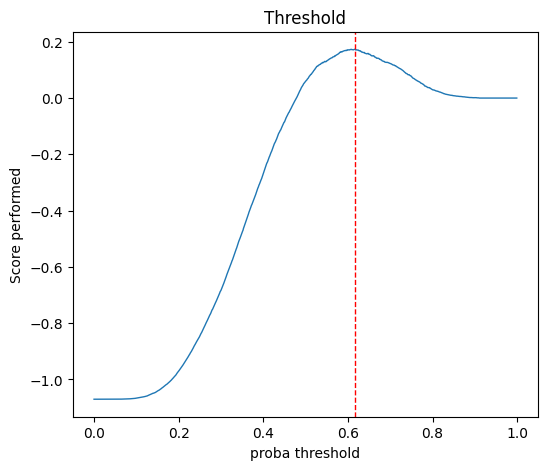

In [134]:
y_pred =clf_rf_us.predict(X_test_fs)
y_prob = clf_rf_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]
_, _, metrics_score_clf_rf_us = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [135]:
roc_auc_clf_rf_us = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_rf_us, recall_1_clf_rf_us = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_us = round(f1_score(y_test, y_pred), 3)
precision_clf_rf_us = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

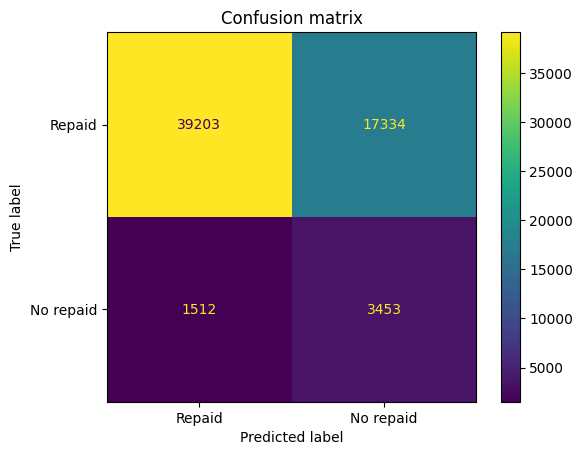

In [136]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

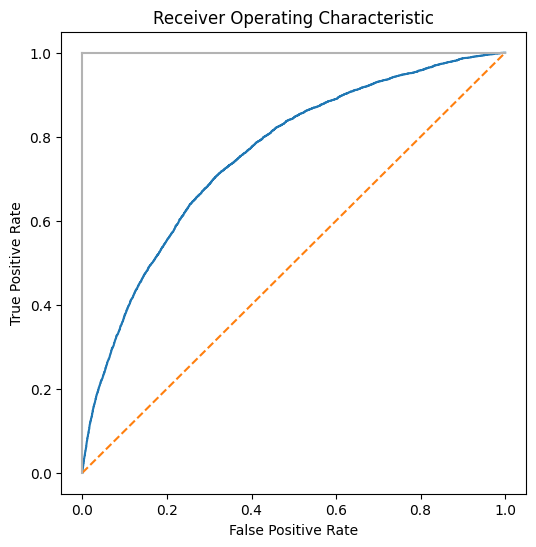

In [137]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

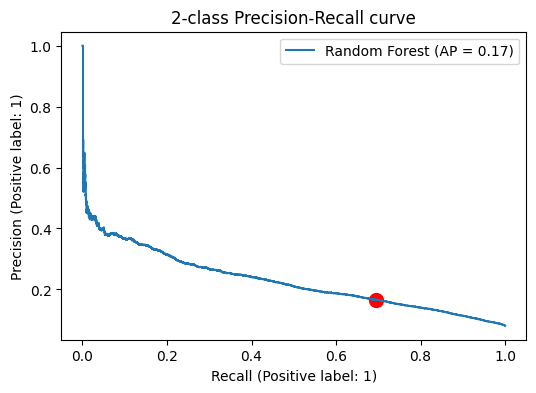

In [138]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_rf_us, precision_clf_rf_us, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Random Forest (AP = %.2f)"% (precision_clf_rf_us)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [139]:
df_temp = pd.DataFrame({
    "Model" : ["UnderSampling - Random Forest"],
    "Threshold" : 0.5,
    "Business": metrics_score_clf_rf_us,
    "ROC-AUC" : roc_auc_clf_rf_us,    
    # "Recall - 0" : recall_0_clf_rf_us,
    "Precision - 1" : precision_clf_rf_us,
    "Recall - 1" : recall_1_clf_rf_us,    
    "F1 - 1" : f1_clf_rf_us,    
    "Duration (min)" : round(end_time_model_clf_rf_us/60, 1)
})

In [140]:
df_temp

Model  Threshold  Business  ROC-AUC  Precision - 1  \
0  UnderSampling - Random Forest        0.5     0.174    0.756          0.166   

   Recall - 1  F1 - 1  Duration (min)  
0       0.695   0.268             4.8

In [141]:
# %%time
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(clf_rf_us, X_test_fs, y_test, scoring='f1_micro', cv=cv, n_jobs=-1)
# score = np.mean(scores)
# print('F1 Score: %.3f' % score)

In [142]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  ROC-AUC  \
0      Class weight - Random Forest        0.5     0.152    0.748   
1           Class weight - LightGBM        0.5     0.213    0.767   
2         Tuned - Gradient Boosting        0.5     0.029    0.643   
3      OverSampling - Random Forest        0.5     0.099    0.720   
4           OverSampling - LightGBM        0.5     0.202    0.767   
5  OverSampling - Gradient Boosting        0.5     0.076    0.698   
6     UnderSampling - Random Forest        0.5     0.174    0.756   

   Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0          0.340       0.107   0.162             3.6  
1          0.251       0.447   0.321             3.4  
2          0.306       0.016   0.030             4.5  
3          0.245       0.141   0.179             9.4  
4          0.434       0.066   0.114             2.9  
5          0.235       0.130   0.168            79.2  
6          0.166       0.695   0.268             4.8

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.2. LightGBM</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [143]:
clf_lgbm_us = imbpipeline(steps = [["UnderSample", undersample],
                                   ["LightGBM", LGBMClassifier(**lgbm_parameters, learning_rate=0.02,
                                                                    colsample_bytree=0.9497036, subsample=0.8715623,
                                                                    reg_alpha=0.041545473, reg_lambda=0.0735294,
                                                                    min_split_gain=0.0222415, min_child_weight=39.3259775,
                                                                    random_state=42, n_jobs=-1)]
                                   ]
                          )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [144]:
%%time
if FIT_MODE_lgbm_US:
    start_time_model = timeit.default_timer()
    
    clf_lgbm_us.fit(X_train_fs, y_train, LightGBM__callbacks=[early_stopping(stopping_rounds=50)], LightGBM__eval_set=[(X_test_fs, y_test)])
    
    end_time_model_clf_lgbm_us =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_lgbm_us, open(CLF_lgbm_US_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_lgbm_us, open(DURATION_MODEL_CLF_lgbm_US, 'wb'))
else:
    clf_lgbm_us = pickle.load(open(CLF_lgbm_US_FILENAME, 'rb'))
    end_time_model_clf_lgbm_us = pickle.load(open(DURATION_MODEL_CLF_lgbm_US, 'rb'))

CPU times: total: 156 ms
Wall time: 19 ms


<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

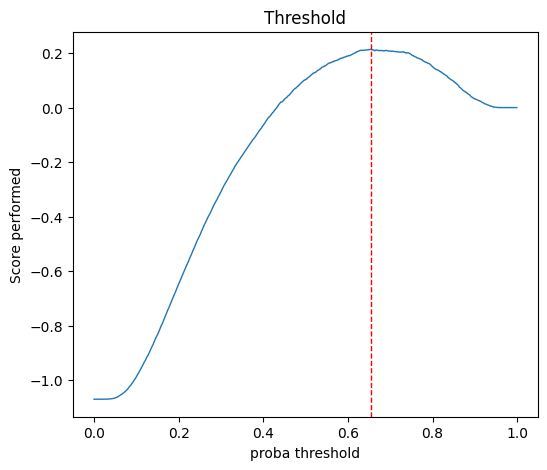

In [145]:
y_pred = clf_lgbm_us.predict(X_test_fs)
y_prob = clf_lgbm_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]
_, _, metrics_score_clf_lgbm_us = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [146]:
roc_auc_clf_lgbm_us = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_lgbm_us, recall_1_clf_lgbm_us = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_us = round(f1_score(y_test, y_pred), 3)
precision_clf_lgbm_us = round(precision_score(y_test, y_pred), 3)
print(f"roc_auc_clf_lgbm_us: {roc_auc_clf_lgbm_us}")
print(f"recall_1_clf_lgbm_us: {recall_1_clf_lgbm_us}")
print(f"f1_clf_lgbm_us: {f1_clf_lgbm_us}")
print(f"precision_clf_lgbm_us: {precision_clf_lgbm_us}")

roc_auc_clf_lgbm_us: 0.777
recall_1_clf_lgbm_us: 0.712
f1_clf_lgbm_us: 0.281
precision_clf_lgbm_us: 0.175


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

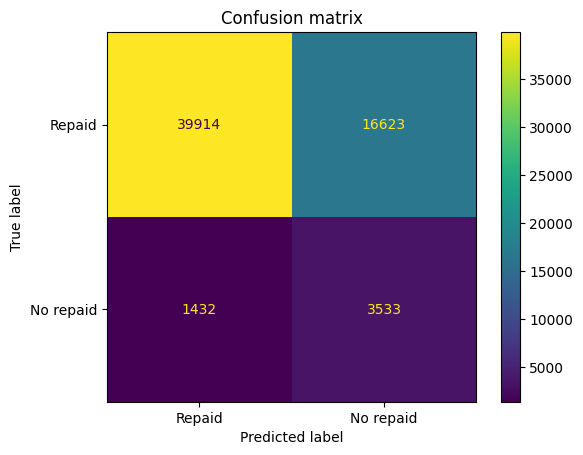

In [147]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

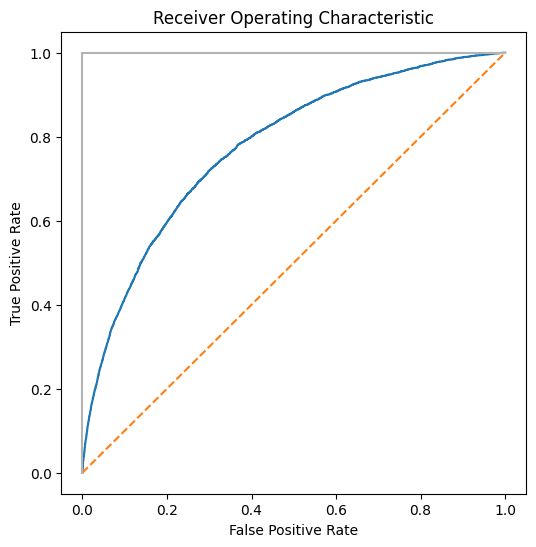

In [148]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

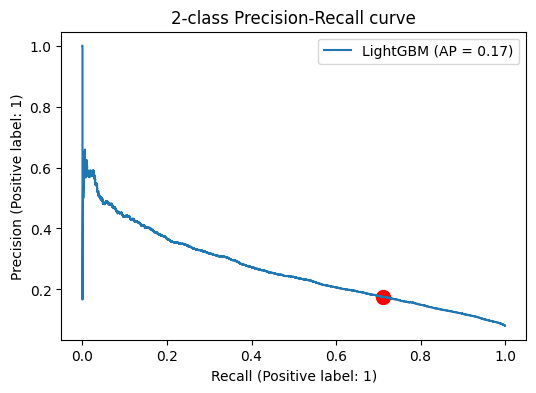

In [149]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_lgbm_us, precision_clf_lgbm_us, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["LightGBM (AP = %.2f)"% (precision_clf_lgbm_us)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [150]:
df_temp = pd.DataFrame({
    "Model" : ["UnderSampling - LightGBM"],
    "Threshold" : 0.5,
    "Business": metrics_score_clf_lgbm_us,
    "ROC-AUC" : roc_auc_clf_lgbm_us,    
    # "Recall - 0" : recall_0_clf_lgbm_us,
    "Precision - 1" : precision_clf_lgbm_us,
    "Recall - 1" : recall_1_clf_lgbm_us,    
    "F1 - 1" : f1_clf_lgbm_us,    
    "Duration (min)" : round(end_time_model_clf_lgbm_us/60, 1)
})

In [151]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  ROC-AUC  \
0      Class weight - Random Forest        0.5     0.152    0.748   
1           Class weight - LightGBM        0.5     0.213    0.767   
2         Tuned - Gradient Boosting        0.5     0.029    0.643   
3      OverSampling - Random Forest        0.5     0.099    0.720   
4           OverSampling - LightGBM        0.5     0.202    0.767   
5  OverSampling - Gradient Boosting        0.5     0.076    0.698   
6     UnderSampling - Random Forest        0.5     0.174    0.756   
7          UnderSampling - LightGBM        0.5     0.214    0.777   

   Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0          0.340       0.107   0.162             3.6  
1          0.251       0.447   0.321             3.4  
2          0.306       0.016   0.030             4.5  
3          0.245       0.141   0.179             9.4  
4          0.434       0.066   0.114             2.9  
5          0.235       0.130   0.168            79.2  
6          0.166       0.695   0.268             4.8  
7          0.175       0.712   0.281             0.2

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.3. Gradient Boosting</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [152]:
clf_gb_us = imbpipeline(steps = [["UnderSample", undersample],
                                 ["Gradient Boosting", GradientBoostingClassifier(**gb_parameters,
                                                                                  validation_fraction=0.2, 
                                                                                  n_iter_no_change=5,
                                                                                  tol=0.01, random_state=42)]
                                ]
                       )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [153]:
%%time
if FIT_MODE_gb_US:
    start_time_model = timeit.default_timer()
    
    clf_gb_us.fit(X_train_fs, y_train)
    
    end_time_model_clf_gb_us =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_gb_us, open(CLF_gb_US_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_gb_us, open(DURATION_MODEL_CLF_gb_US, 'wb'))
else:
    clf_gb_us = pickle.load(open(CLF_gb_US_FILENAME, 'rb'))
    end_time_model_clf_gb_us = pickle.load(open(DURATION_MODEL_CLF_gb_US, 'rb'))

CPU times: total: 15.6 ms
Wall time: 13 ms


<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

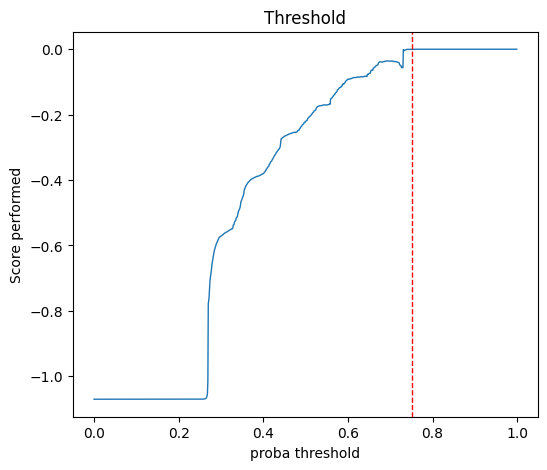

In [154]:
y_pred = clf_gb_us.predict(X_test_fs)
y_prob = clf_gb_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]
_, _, metrics_score_clf_gb_us = threshold_selection(y_test, y_prob, metrics=custom_score)

In [155]:
roc_auc_clf_gb_us = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_gb_us, recall_1_clf_gb_us = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_us = round(f1_score(y_test, y_pred), 3)
precision_clf_gb_us = round(precision_score(y_test, y_pred), 3)

In [156]:
%%time
# scores_clf_gb_us = evaluate_model(X_test_fs, y_test, clf_gb_us)
# print('%.3f (%.3f)' % (mean(scores_clf_gb_us), std(scores_clf_gb_us)))

CPU times: total: 0 ns
Wall time: 0 ns


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

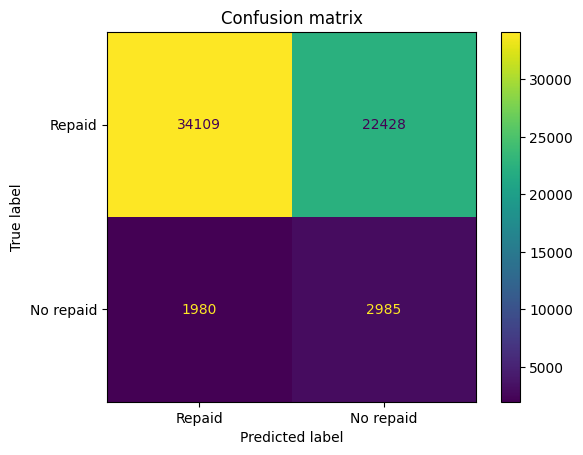

In [157]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

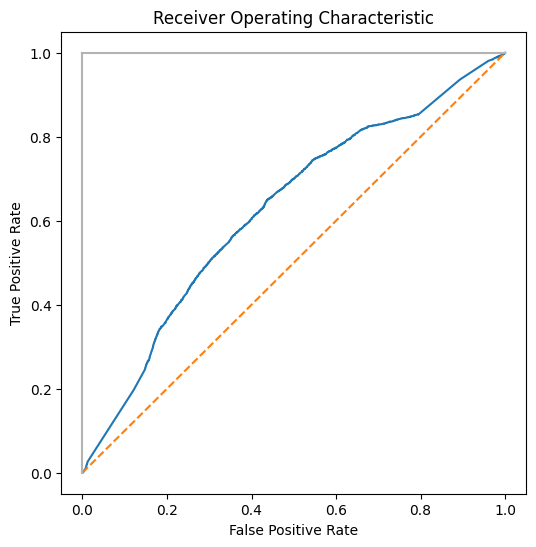

In [158]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

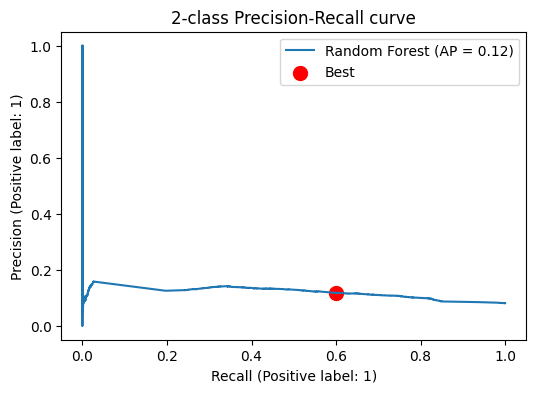

In [159]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_gb_us))
plt.scatter(recall_1_clf_gb_us, precision_clf_gb_us, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [160]:
df_temp = pd.DataFrame({
    "Model" : ["UnderSampling - Gradient Boosting"],
    "Threshold" : 0.5,
    "Business": metrics_score_clf_gb_us,
    "ROC-AUC" : roc_auc_clf_gb_us,    
    # "Recall - 0" : recall_0_clf_gb_us,
    "Precision - 1" : precision_clf_gb_us,
    "Recall - 1" : recall_1_clf_gb_us,
    "F1 - 1" : f1_clf_gb_us,    
    "Duration (min)" : round(end_time_model_clf_gb_us/60, 1)
})

In [161]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  ROC-AUC  \
0       Class weight - Random Forest        0.5     0.152    0.748   
1            Class weight - LightGBM        0.5     0.213    0.767   
2          Tuned - Gradient Boosting        0.5     0.029    0.643   
3       OverSampling - Random Forest        0.5     0.099    0.720   
4            OverSampling - LightGBM        0.5     0.202    0.767   
5   OverSampling - Gradient Boosting        0.5     0.076    0.698   
6      UnderSampling - Random Forest        0.5     0.174    0.756   
7           UnderSampling - LightGBM        0.5     0.214    0.777   
8  UnderSampling - Gradient Boosting        0.5     0.000    0.625   

   Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0          0.340       0.107   0.162             3.6  
1          0.251       0.447   0.321             3.4  
2          0.306       0.016   0.030             4.5  
3          0.245       0.141   0.179             9.4  
4          0.434       0.066   0.114             2.9  
5          0.235       0.130   0.168            79.2  
6          0.166       0.695   0.268             4.8  
7          0.175       0.712   0.281             0.2  
8          0.117       0.601   0.197             0.7

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">11. Modelisation Threshold-Moving</h2>
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.0. Threshold selection</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Based on the <b>probability predictions</b>, we are going to identify the best treshold to mesure our models.
    </p>
</div>

<div class="alert alert-block alert-info">
    <p>To treat the unbalanced class, we are going to implement OverSampling technique with SMOTE.</p>
</div>

In [162]:
# undersample = RandomUnderSampler(sampling_strategy='majority')

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.1. Random Forest</h3>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.1.1. Random Forest with class_weight balanced</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [163]:
y_prob = clf_rf_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

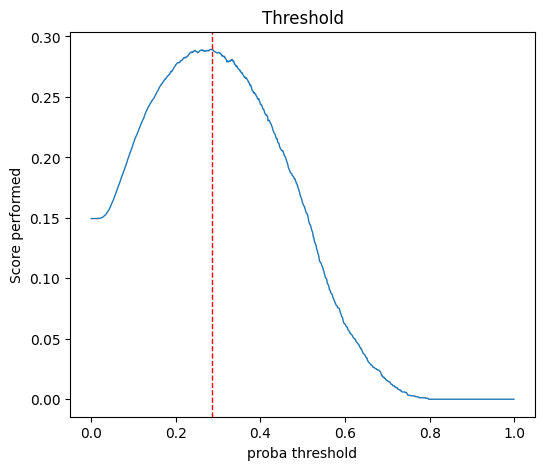

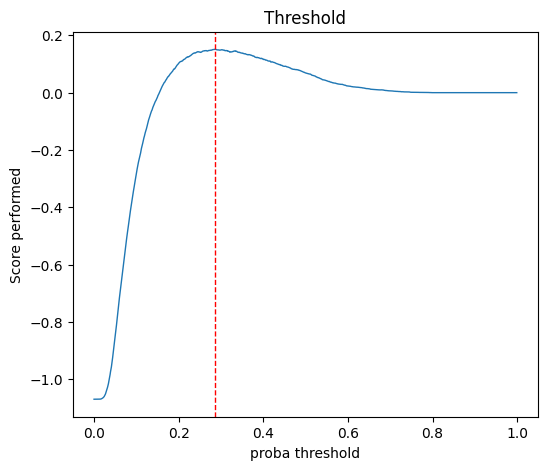

In [164]:
threshold_clf_rf_cw_tm, y_pred,_ = threshold_selection(y_test, y_prob, metrics=f1_score)
_, _, metrics_score_clf_rf_cw_cs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [165]:
roc_auc_clf_rf_cw_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_cw_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_rf_cw_tm, recall_1_clf_rf_cw_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_cw_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_rf_cw_tm:':<30}{threshold_clf_rf_cw_tm}")
print(f"{'roc_auc_clf_rf_cw_tm:':<30}{roc_auc_clf_rf_cw_tm}")
print(f"{'precision_clf_rf_cw_tm:':<30}{precision_clf_rf_cw_tm}")
print(f"{'recall_1_clf_rf_cw_tm:':<30}{recall_1_clf_rf_cw_tm}")
print(f"{'f1_clf_rf_cw_tm:':<30}{f1_clf_rf_cw_tm}")

threshold_clf_rf_cw_tm:       0.286
roc_auc_clf_rf_cw_tm:         0.748
precision_clf_rf_cw_tm:       0.225
recall_1_clf_rf_cw_tm:        0.405
f1_clf_rf_cw_tm:              0.289


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

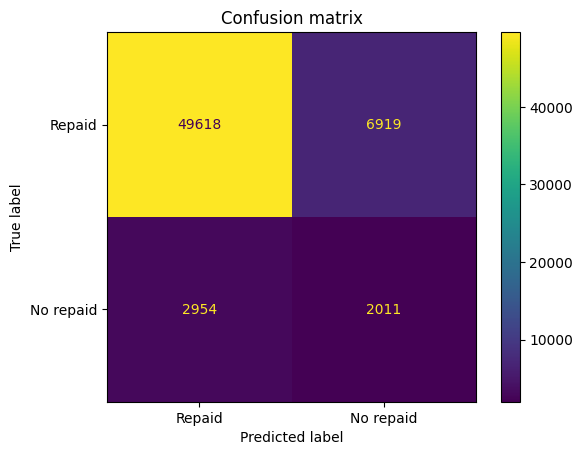

In [166]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

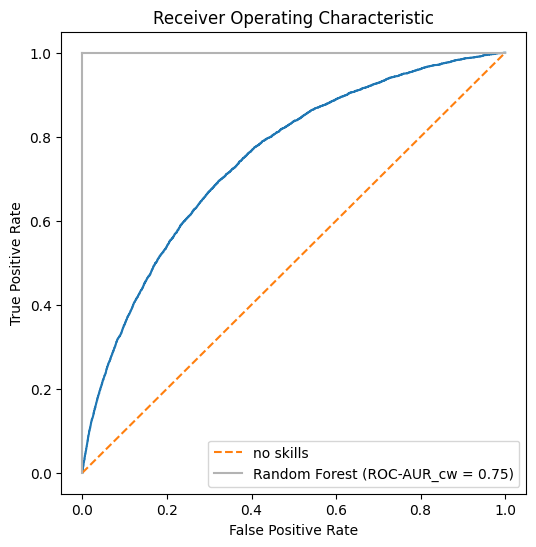

In [167]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--", label='no skills')
plt.plot([0, 0], [1, 0] , c=".7", label="Random Forest (ROC-AUR_cw = %.2f)"% (roc_auc_clf_rf_cw_tm)), 
plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

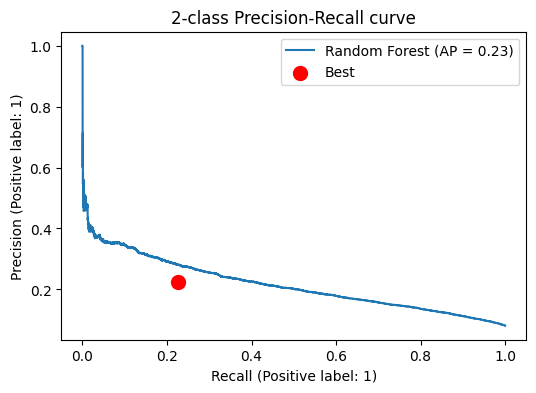

In [168]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_rf_cw_tm));
plt.scatter(precision_clf_rf_cw_tm, precision_clf_rf_cw_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [169]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Class weight - Random Forest"],
    "Threshold" : threshold_clf_rf_cw_tm,
    "Business": metrics_score_clf_rf_cw_cs,
    "ROC-AUC" : roc_auc_clf_rf_cw_tm,  
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_rf_cw_tm,
    "Recall - 1" : recall_1_clf_rf_cw_tm,
    "F1 - 1" : f1_clf_rf_cw_tm,    
    "Duration (min)" : round(end_time_model_clf_rf_cw/60, 1)
})

In [170]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                     Class weight - Random Forest      0.500     0.152   
1                          Class weight - LightGBM      0.500     0.213   
2                        Tuned - Gradient Boosting      0.500     0.029   
3                     OverSampling - Random Forest      0.500     0.099   
4                          OverSampling - LightGBM      0.500     0.202   
5                 OverSampling - Gradient Boosting      0.500     0.076   
6                    UnderSampling - Random Forest      0.500     0.174   
7                         UnderSampling - LightGBM      0.500     0.214   
8                UnderSampling - Gradient Boosting      0.500     0.000   
9  Threshold-Moving - Class weight - Random Forest      0.286     0.152   

   ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0    0.748          0.340       0.107   0.162             3.6  
1    0.767          0.251       0.447   0.321             3.4  
2    0.643          0.306       0.016   0.030             4.5  
3    0.720          0.245       0.141   0.179             9.4  
4    0.767          0.434       0.066   0.114             2.9  
5    0.698          0.235       0.130   0.168            79.2  
6    0.756          0.166       0.695   0.268             4.8  
7    0.777          0.175       0.712   0.281             0.2  
8    0.625          0.117       0.601   0.197             0.7  
9    0.748          0.225       0.405   0.289             3.6

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.1.2. Random Forest with OverSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [171]:
y_prob = clf_rf_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

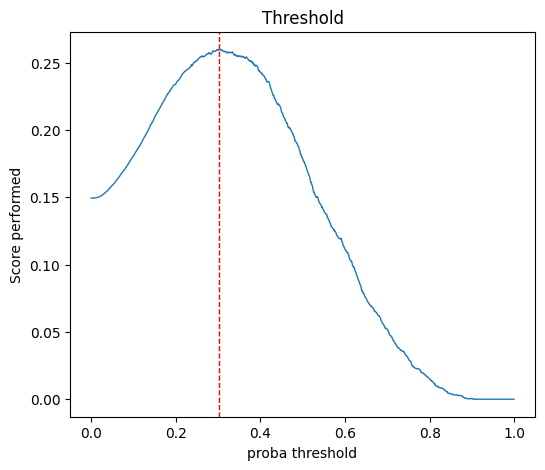

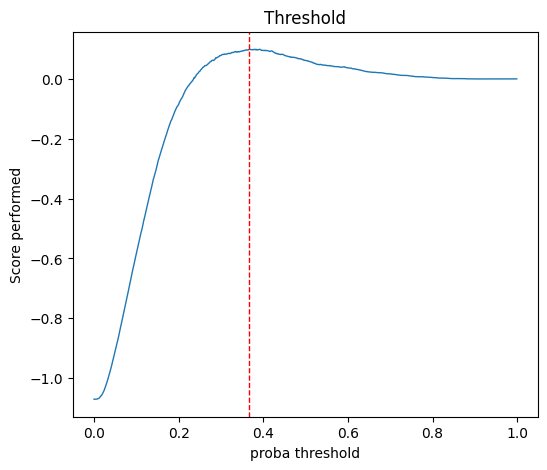

In [172]:
threshold_clf_rf_os_tm, y_pred, _ = threshold_selection(y_test, y_prob, metrics=f1_score)
_, _, metrics_score_clf_rf_os_cs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [173]:
roc_auc_clf_rf_os_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_os_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_rf_os_tm, recall_1_clf_rf_os_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_os_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_rf_os_tm:':<30}{threshold_clf_rf_os_tm}")
print(f"{'roc_auc_clf_rf_os_tm:':<30}{roc_auc_clf_rf_os_tm}")
print(f"{'precision_clf_rf_os_tm:':<30}{precision_clf_rf_os_tm}")
print(f"{'recall_1_clf_rf_os_tm:':<30}{recall_1_clf_rf_os_tm}")
print(f"{'f1_clf_rf_os_tm:':<30}{f1_clf_rf_os_tm}")

threshold_clf_rf_os_tm:       0.303
roc_auc_clf_rf_os_tm:         0.72
precision_clf_rf_os_tm:       0.181
recall_1_clf_rf_os_tm:        0.462
f1_clf_rf_os_tm:              0.26


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

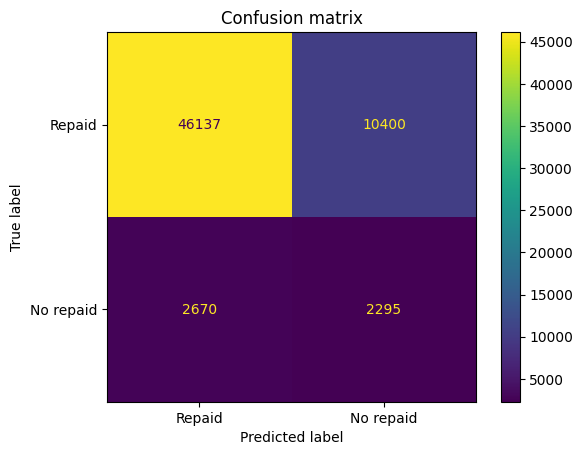

In [174]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

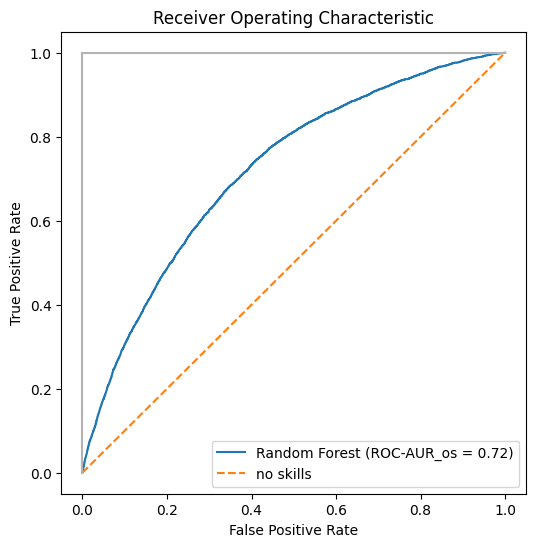

In [175]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="Random Forest (ROC-AUR_os = %.2f)"% (roc_auc_clf_rf_os_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

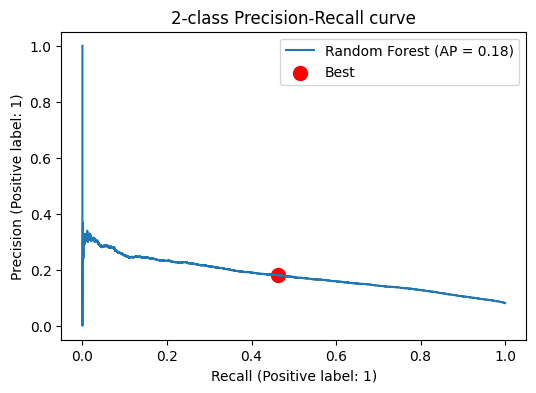

In [176]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_rf_os_tm));
plt.scatter(recall_1_clf_rf_os_tm, precision_clf_rf_os_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [177]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - OverSampling - Random Forest"],
    "Threshold" : threshold_clf_rf_os_tm,
    "Business": metrics_score_clf_rf_os_cs,
    "ROC-AUC" : roc_auc_clf_rf_os_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_rf_os_tm,
    "Recall - 1" : recall_1_clf_rf_os_tm,
    "F1 - 1" : f1_clf_rf_os_tm,    
    "Duration (min)" : round(end_time_model_clf_rf_os/60, 1)
})

In [178]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                      Class weight - Random Forest      0.500     0.152   
1                           Class weight - LightGBM      0.500     0.213   
2                         Tuned - Gradient Boosting      0.500     0.029   
3                      OverSampling - Random Forest      0.500     0.099   
4                           OverSampling - LightGBM      0.500     0.202   
5                  OverSampling - Gradient Boosting      0.500     0.076   
6                     UnderSampling - Random Forest      0.500     0.174   
7                          UnderSampling - LightGBM      0.500     0.214   
8                 UnderSampling - Gradient Boosting      0.500     0.000   
9   Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10  Threshold-Moving - OverSampling - Random Forest      0.303     0.099   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.1.3. Random Forest with UnderSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [179]:
y_prob = clf_rf_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

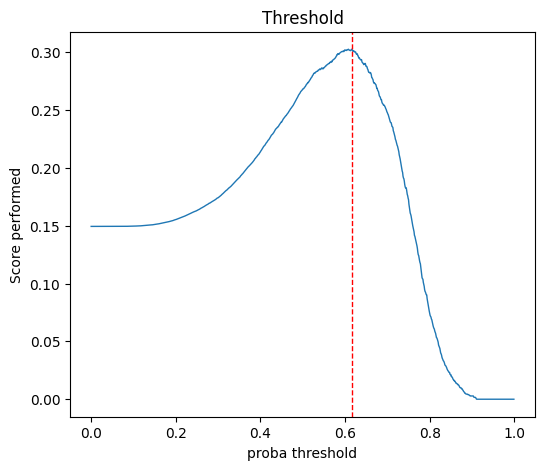

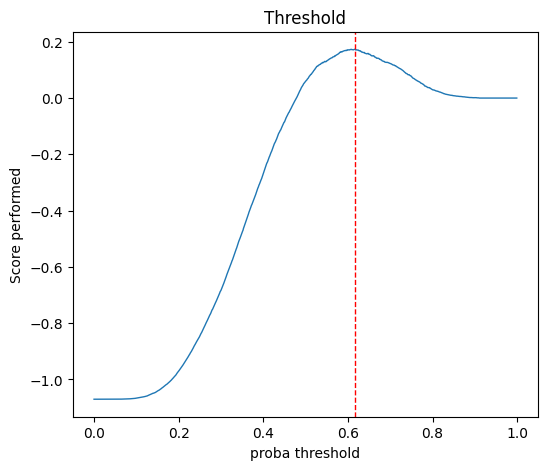

In [180]:
threshold_clf_rf_us_tm, y_pred,_ = threshold_selection(y_test, y_prob, metrics=f1_score)
_, _, metrics_score_clf_rf_us_cs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [181]:
roc_auc_clf_rf_us_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_us_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_rf_us_tm, recall_1_clf_rf_us_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_us_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_rf_us_tm:':<30}{threshold_clf_rf_us_tm}")
print(f"{'roc_auc_clf_rf_us_tm:':<30}{roc_auc_clf_rf_us_tm}")
print(f"{'precision_clf_rf_us_tm:':<30}{precision_clf_rf_us_tm}")
print(f"{'recall_1_clf_rf_us_tm:':<30}{recall_1_clf_rf_us_tm}")
print(f"{'f1_clf_rf_us_tm:':<30}{f1_clf_rf_us_tm}")

threshold_clf_rf_us_tm:       0.616
roc_auc_clf_rf_us_tm:         0.756
precision_clf_rf_us_tm:       0.239
recall_1_clf_rf_us_tm:        0.411
f1_clf_rf_us_tm:              0.303


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

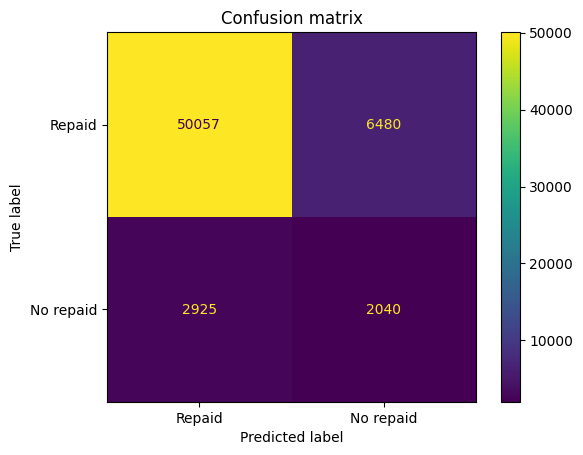

In [182]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

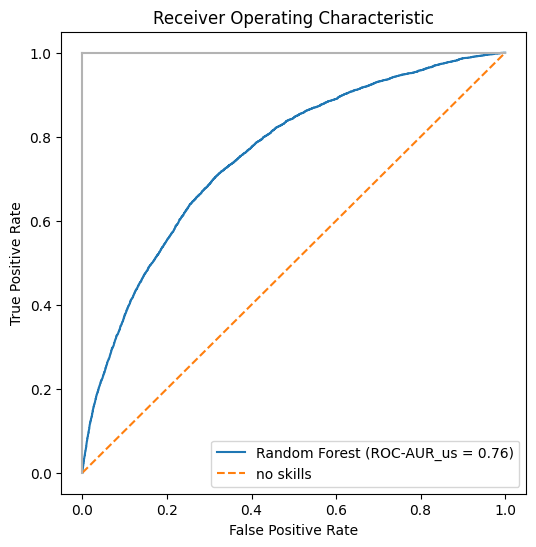

In [183]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="Random Forest (ROC-AUR_us = %.2f)"% (roc_auc_clf_rf_us_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

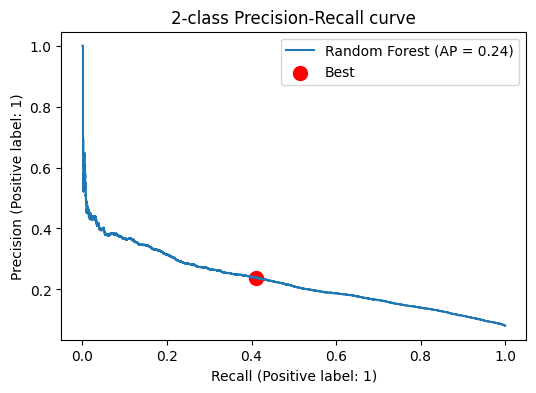

In [184]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_rf_us_tm));
plt.scatter(recall_1_clf_rf_us_tm, precision_clf_rf_us_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [185]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Undersampling - Random Forest"],
    "Threshold" : threshold_clf_rf_us_tm,
    "Business": metrics_score_clf_rf_us_cs,
    "ROC-AUC" : roc_auc_clf_rf_us_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_rf_us_tm,
    "Recall - 1" : recall_1_clf_rf_us_tm,
    "F1 - 1" : f1_clf_rf_us_tm,    
    "Duration (min)" : round(end_time_model_clf_rf_us/60, 1)
})

In [186]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                       Class weight - Random Forest      0.500     0.152   
1                            Class weight - LightGBM      0.500     0.213   
2                          Tuned - Gradient Boosting      0.500     0.029   
3                       OverSampling - Random Forest      0.500     0.099   
4                            OverSampling - LightGBM      0.500     0.202   
5                   OverSampling - Gradient Boosting      0.500     0.076   
6                      UnderSampling - Random Forest      0.500     0.174   
7                           UnderSampling - LightGBM      0.500     0.214   
8                  UnderSampling - Gradient Boosting      0.500     0.000   
9    Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10   Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11  Threshold-Moving - Undersampling - Random Forest      0.616     0.174   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.2. LightGBM</h3>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.2.1. LightGBM with class_weight balanced</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [187]:
y_prob = clf_lgbm_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

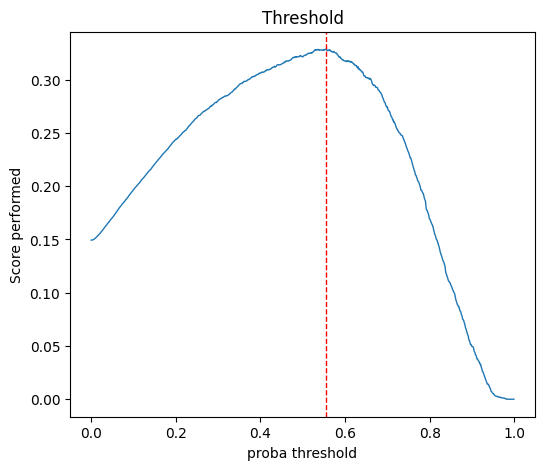

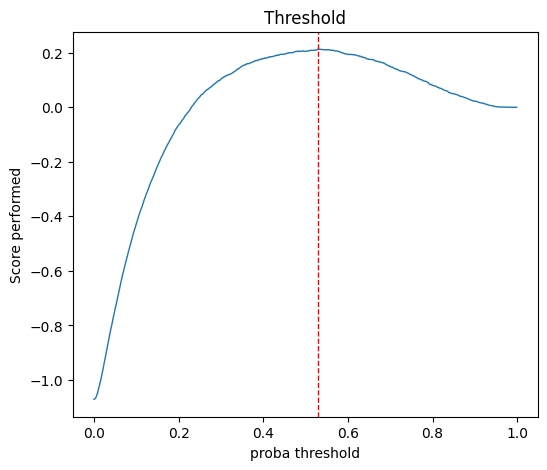

In [188]:
threshold_clf_lgbm_cw_tm, y_pred,_ = threshold_selection(y_test, y_prob, metrics=f1_score)
_, _, metrics_score_clf_lgbm_cw_cs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [189]:
roc_auc_clf_lgbm_cw_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_cw_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_lgbm_cw_tm, recall_1_clf_lgbm_cw_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_cw_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_cw_tm:':<30}{threshold_clf_lgbm_cw_tm}")
print(f"{'roc_auc_clf_lgbm_cw_tm:':<30}{roc_auc_clf_lgbm_cw_tm}")
print(f"{'precision_clf_lgbm_cw_tm:':<30}{precision_clf_lgbm_cw_tm}")
print(f"{'recall_1_clf_lgbm_cw_tm:':<30}{recall_1_clf_lgbm_cw_tm}")
print(f"{'f1_clf_lgbm_cw_tm:':<30}{f1_clf_lgbm_cw_tm}")

threshold_clf_lgbm_cw_tm:     0.554
roc_auc_clf_lgbm_cw_tm:       0.767
precision_clf_lgbm_cw_tm:     0.284
recall_1_clf_lgbm_cw_tm:      0.39
f1_clf_lgbm_cw_tm:            0.329


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

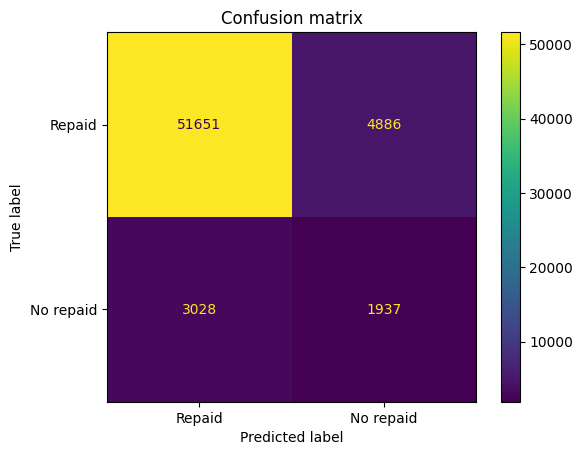

In [190]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

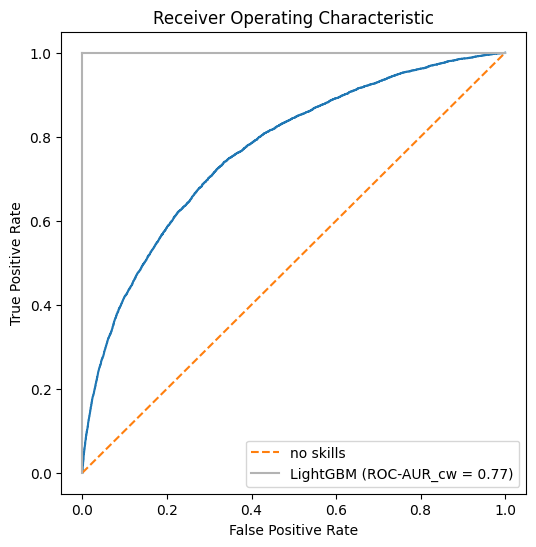

In [191]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--", label='no skills')
plt.plot([0, 0], [1, 0] , c=".7", label="LightGBM (ROC-AUR_cw = %.2f)"% (roc_auc_clf_lgbm_cw_tm)), 
plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

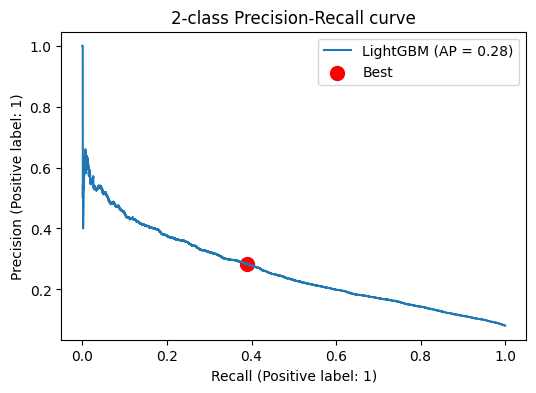

In [192]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_lgbm_cw_tm));
plt.scatter(recall_1_clf_lgbm_cw_tm, precision_clf_lgbm_cw_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [193]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Class weight - LightGBM"],
    "Threshold" : threshold_clf_lgbm_cw_tm,
    "Business": metrics_score_clf_lgbm_cw_cs,
    "ROC-AUC" : roc_auc_clf_lgbm_cw_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_lgbm_cw_tm,
    "Recall - 1" : recall_1_clf_lgbm_cw_tm,
    "F1 - 1" : f1_clf_lgbm_cw_tm,    
    "Duration (min)" : round(end_time_model_clf_lgbm_cw/60, 1)
})

In [194]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                       Class weight - Random Forest      0.500     0.152   
1                            Class weight - LightGBM      0.500     0.213   
2                          Tuned - Gradient Boosting      0.500     0.029   
3                       OverSampling - Random Forest      0.500     0.099   
4                            OverSampling - LightGBM      0.500     0.202   
5                   OverSampling - Gradient Boosting      0.500     0.076   
6                      UnderSampling - Random Forest      0.500     0.174   
7                           UnderSampling - LightGBM      0.500     0.214   
8                  UnderSampling - Gradient Boosting      0.500     0.000   
9    Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10   Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11  Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12        Threshold-Moving - Class weight - LightGBM      0.554     0.213   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.2.2. LightGBM with OverSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [195]:
y_prob = clf_lgbm_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

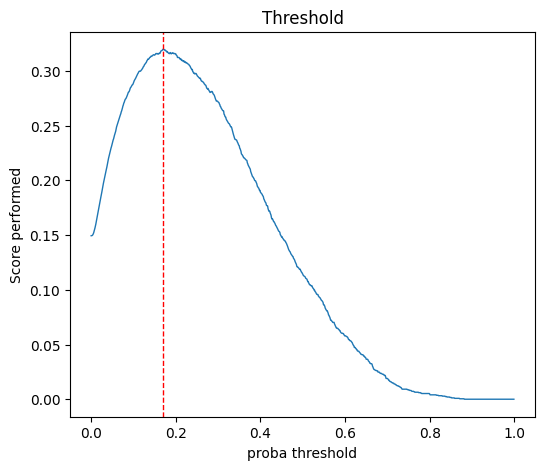

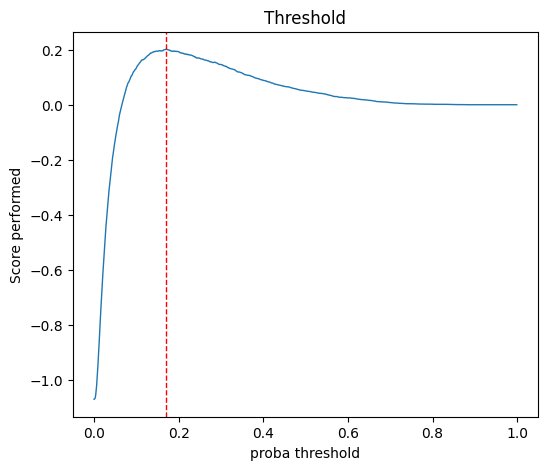

In [196]:
threshold_clf_lgbm_os_tm, y_pred,_ = threshold_selection(y_test, y_prob, metrics=f1_score)
_, _, metrics_score_clf_lgbm_os_cs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [197]:
roc_auc_clf_lgbm_os_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_os_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_lgbm_os_tm, recall_1_clf_lgbm_os_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_os_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_os_tm:':<30}{threshold_clf_lgbm_os_tm}")
print(f"{'roc_auc_clf_lgbm_os_tm:':<30}{roc_auc_clf_lgbm_os_tm}")
print(f"{'precision_clf_lgbm_os_tm:':<30}{precision_clf_lgbm_os_tm}")
print(f"{'recall_1_clf_lgbm_os_tm:':<30}{recall_1_clf_lgbm_os_tm}")
print(f"{'f1_clf_lgbm_os_tm:':<30}{f1_clf_lgbm_os_tm}")

threshold_clf_lgbm_os_tm:     0.17
roc_auc_clf_lgbm_os_tm:       0.767
precision_clf_lgbm_os_tm:     0.25
recall_1_clf_lgbm_os_tm:      0.445
f1_clf_lgbm_os_tm:            0.32


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

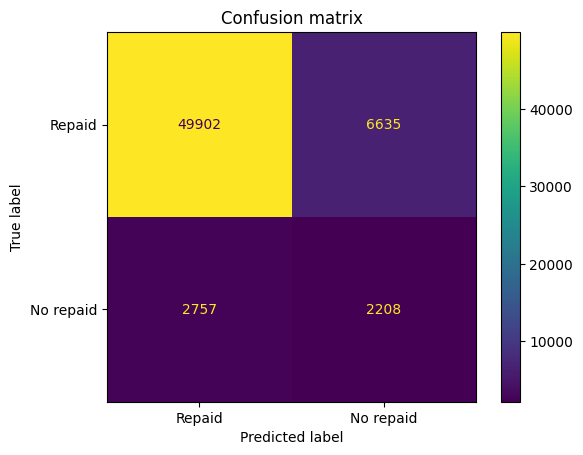

In [198]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

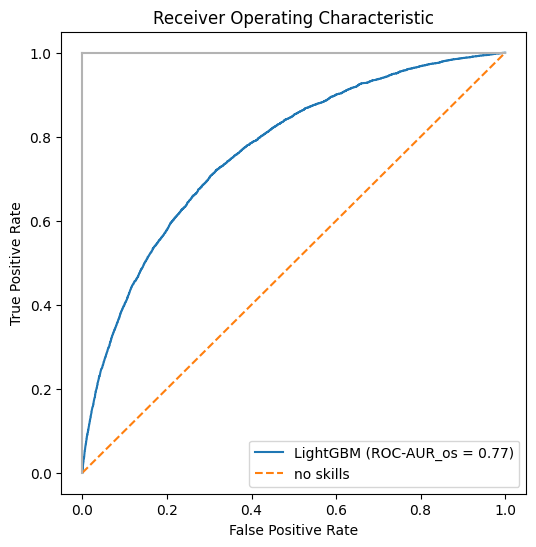

In [199]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_lgbm_os_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

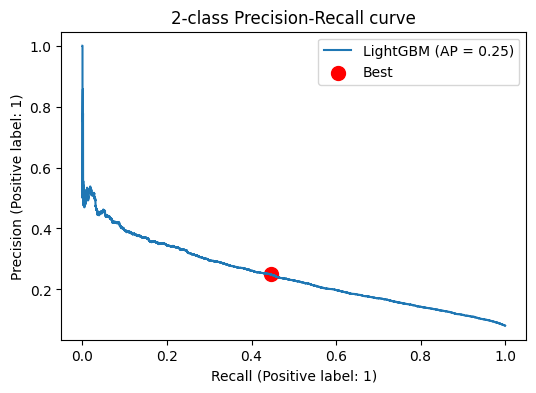

In [200]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_lgbm_os_tm));
plt.scatter(recall_1_clf_lgbm_os_tm, precision_clf_lgbm_os_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [201]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - OverSampling - LightGBM"],
    "Threshold" : threshold_clf_lgbm_os_tm,
    "Business": metrics_score_clf_lgbm_os_cs,
    "ROC-AUC" : roc_auc_clf_lgbm_os_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_lgbm_os_tm,
    "Recall - 1" : recall_1_clf_lgbm_os_tm,
    "F1 - 1" : f1_clf_lgbm_os_tm,    
    "Duration (min)" : round(end_time_model_clf_lgbm_os/60, 1)
})

In [202]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                       Class weight - Random Forest      0.500     0.152   
1                            Class weight - LightGBM      0.500     0.213   
2                          Tuned - Gradient Boosting      0.500     0.029   
3                       OverSampling - Random Forest      0.500     0.099   
4                            OverSampling - LightGBM      0.500     0.202   
5                   OverSampling - Gradient Boosting      0.500     0.076   
6                      UnderSampling - Random Forest      0.500     0.174   
7                           UnderSampling - LightGBM      0.500     0.214   
8                  UnderSampling - Gradient Boosting      0.500     0.000   
9    Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10   Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11  Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12        Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13        Threshold-Moving - OverSampling - LightGBM      0.170     0.202   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.2.3. LightGBM with UnderSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [203]:
y_prob = clf_lgbm_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

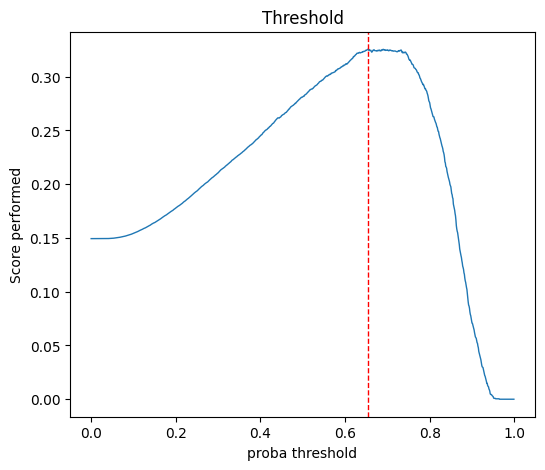

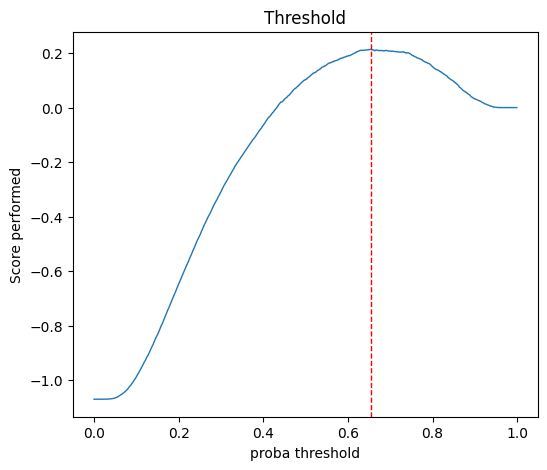

In [204]:
threshold_clf_lgbm_us_tm, y_pred,_ = threshold_selection(y_test, y_prob, metrics=f1_score)
_, _, metrics_score_clf_lgbm_us_cs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [205]:
roc_auc_clf_lgbm_us_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_us_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_lgbm_us_tm, recall_1_clf_lgbm_us_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_us_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_us_tm:':<30}{threshold_clf_lgbm_us_tm}")
print(f"{'roc_auc_clf_lgbm_us_tm:':<30}{roc_auc_clf_lgbm_us_tm}")
print(f"{'precision_clf_lgbm_us_tm:':<30}{precision_clf_lgbm_us_tm}")
print(f"{'recall_1_clf_lgbm_us_tm:':<30}{recall_1_clf_lgbm_us_tm}")
print(f"{'f1_clf_lgbm_us_tm:':<30}{f1_clf_lgbm_us_tm}")

threshold_clf_lgbm_us_tm:     0.654
roc_auc_clf_lgbm_us_tm:       0.777
precision_clf_lgbm_us_tm:     0.242
recall_1_clf_lgbm_us_tm:      0.498
f1_clf_lgbm_us_tm:            0.326


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

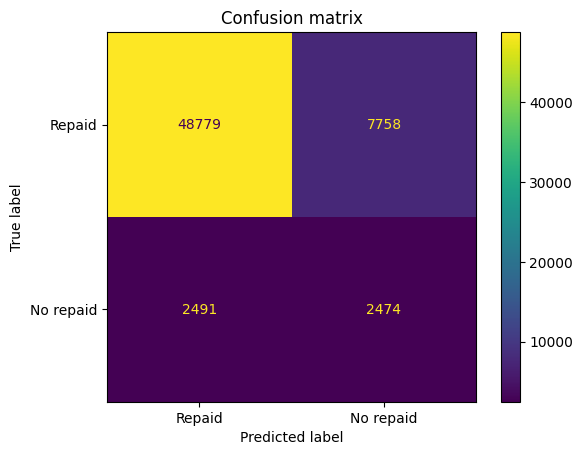

In [206]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

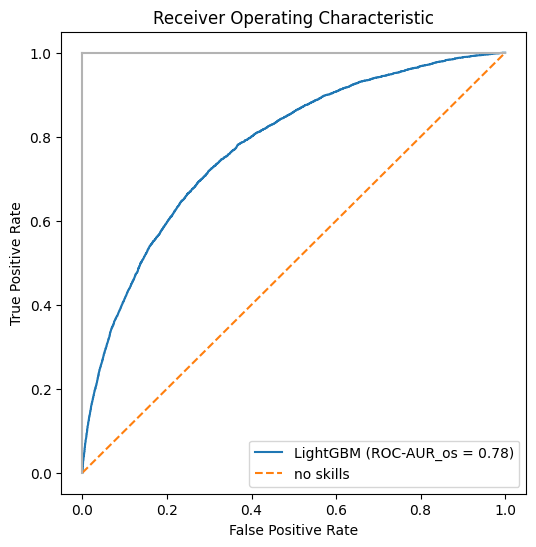

In [207]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_lgbm_us_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

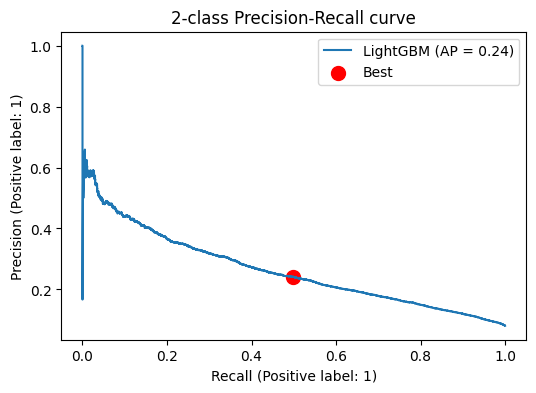

In [208]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_lgbm_us_tm));
plt.scatter(recall_1_clf_lgbm_us_tm, precision_clf_lgbm_us_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [209]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Undersampling - LightGBM"],
    "Threshold" : threshold_clf_lgbm_us_tm,
    "Business": metrics_score_clf_lgbm_us_cs,
    "ROC-AUC" : roc_auc_clf_lgbm_us_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_lgbm_us_tm,
    "Recall - 1" : recall_1_clf_lgbm_us_tm,
    "F1 - 1" : f1_clf_lgbm_us_tm,    
    "Duration (min)" : round(end_time_model_clf_lgbm_us/60, 1)
})

In [210]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                       Class weight - Random Forest      0.500     0.152   
1                            Class weight - LightGBM      0.500     0.213   
2                          Tuned - Gradient Boosting      0.500     0.029   
3                       OverSampling - Random Forest      0.500     0.099   
4                            OverSampling - LightGBM      0.500     0.202   
5                   OverSampling - Gradient Boosting      0.500     0.076   
6                      UnderSampling - Random Forest      0.500     0.174   
7                           UnderSampling - LightGBM      0.500     0.214   
8                  UnderSampling - Gradient Boosting      0.500     0.000   
9    Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10   Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11  Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12        Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13        Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14       Threshold-Moving - Undersampling - LightGBM      0.654     0.214   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>All models have improved the Recall - 1</li>
        <li>OverSampling - Gradient Boosting has taken a lot of time</li>
    </ul>    
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.3. Gradient Boosting</h3>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.3.1. Gradient Boosting with class_weight balanced</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [211]:
y_prob = clf_gb_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

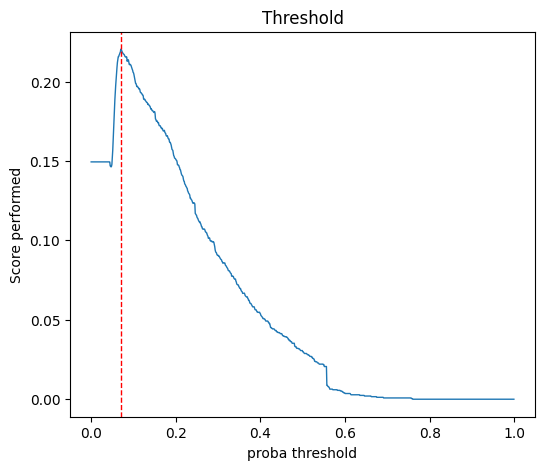

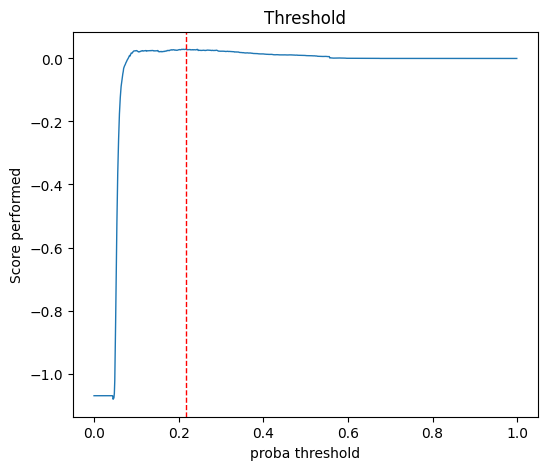

In [212]:
threshold_clf_gb_cw_tm, y_pred,_ = threshold_selection(y_test, y_prob, metrics=f1_score)
_, _, metrics_score_clf_gb_cw_cs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [213]:
roc_auc_clf_gb_cw_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_gb_cw_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_gb_cw_tm, recall_1_clf_gb_cw_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_cw_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_gb_cw_tm:':<30}{threshold_clf_gb_cw_tm}")
print(f"{'roc_auc_clf_gb_cw_tm:':<30}{roc_auc_clf_gb_cw_tm}")
print(f"{'precision_clf_lgbm_cw_tm:':<30}{precision_clf_lgbm_cw_tm}")
print(f"{'recall_1_clf_gb_cw_tm:':<30}{recall_1_clf_gb_cw_tm}")
print(f"{'f1_clf_gb_cw_tm:':<30}{f1_clf_gb_cw_tm}")

threshold_clf_gb_cw_tm:       0.07
roc_auc_clf_gb_cw_tm:         0.643
precision_clf_lgbm_cw_tm:     0.284
recall_1_clf_gb_cw_tm:        0.455
f1_clf_gb_cw_tm:              0.22


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

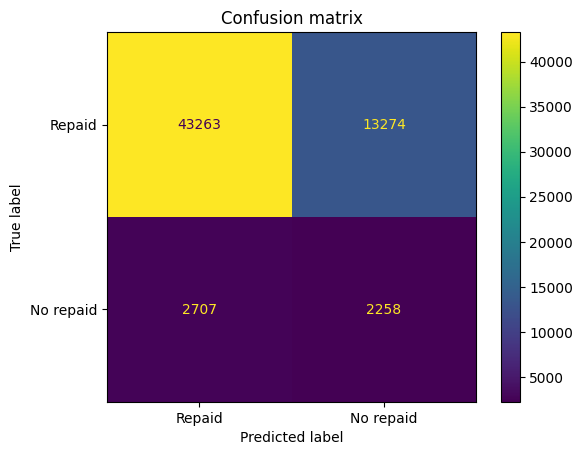

In [214]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

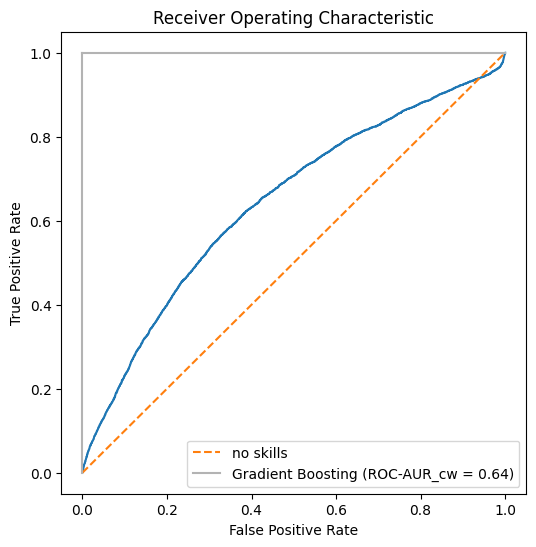

In [215]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--", label='no skills')
plt.plot([0, 0], [1, 0] , c=".7", label="Gradient Boosting (ROC-AUR_cw = %.2f)"% (roc_auc_clf_gb_cw_tm)), 
plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

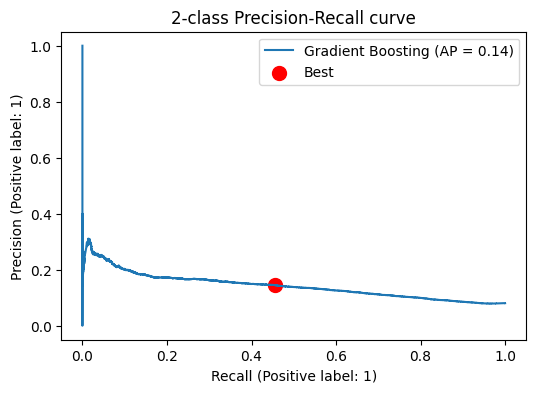

In [216]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Gradient Boosting (AP = %.2f)"% (precision_clf_gb_cw_tm));
plt.scatter(recall_1_clf_gb_cw_tm, precision_clf_gb_cw_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [217]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Class weight - Gradient Boosting"],
    "Threshold" : threshold_clf_gb_cw_tm,
    "Business": metrics_score_clf_gb_cw_cs,
    "ROC-AUC" : roc_auc_clf_gb_cw_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_gb_cw_tm,
    "Recall - 1" : recall_1_clf_gb_cw_tm,
    "F1 - 1" : f1_clf_gb_cw_tm,    
    "Duration (min)" : round(end_time_model_clf_gb_cw/60, 1)
})

In [218]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.3.2. Gradient Boosting with OverSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [219]:
y_prob = clf_gb_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

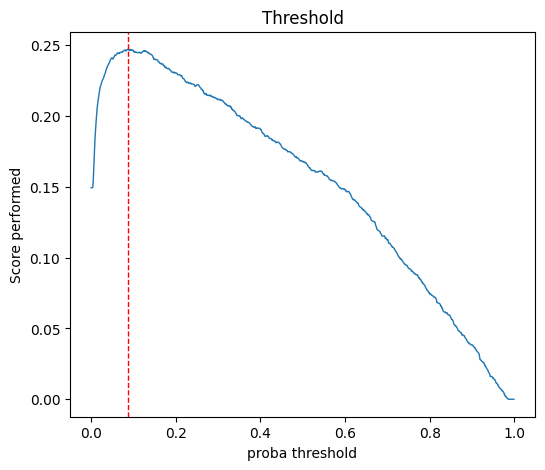

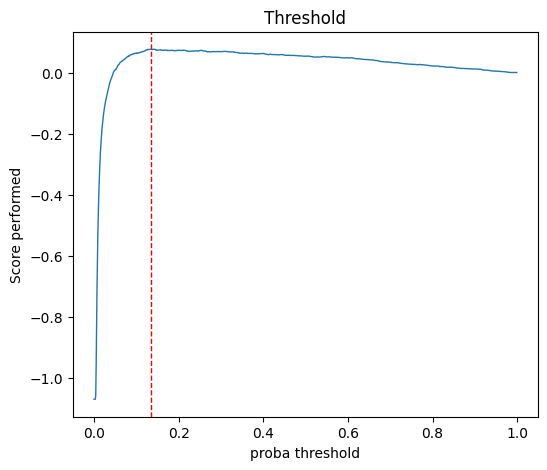

In [220]:
threshold_clf_gb_os_tm, y_pred,_ = threshold_selection(y_test, y_prob, metrics=f1_score)
_, _, metrics_score_clf_gb_os_cs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [221]:
roc_auc_clf_gb_os_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_gb_os_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_gb_os_tm, recall_1_clf_gb_os_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_os_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_os_tm:':<30}{threshold_clf_lgbm_os_tm}")
print(f"{'roc_auc_clf_lgbm_os_tm:':<30}{roc_auc_clf_lgbm_os_tm}")
print(f"{'precision_clf_gb_os_tm:':<30}{precision_clf_gb_os_tm}")
print(f"{'recall_1_clf_lgbm_os_tm:':<30}{recall_1_clf_lgbm_os_tm}")
print(f"{'f1_clf_lgbm_os_tm:':<30}{f1_clf_lgbm_os_tm}")

threshold_clf_lgbm_os_tm:     0.17
roc_auc_clf_lgbm_os_tm:       0.767
precision_clf_gb_os_tm:       0.174
recall_1_clf_lgbm_os_tm:      0.445
f1_clf_lgbm_os_tm:            0.32


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

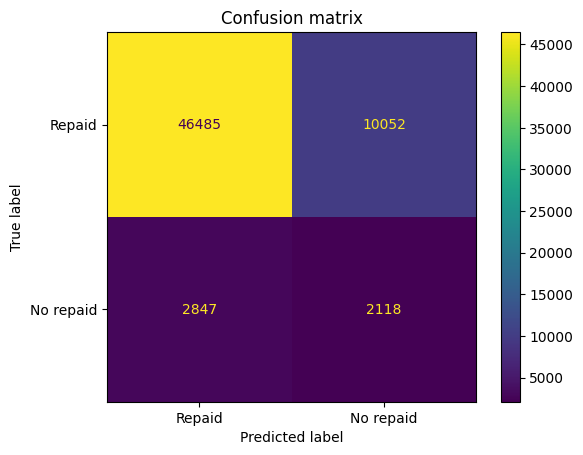

In [222]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

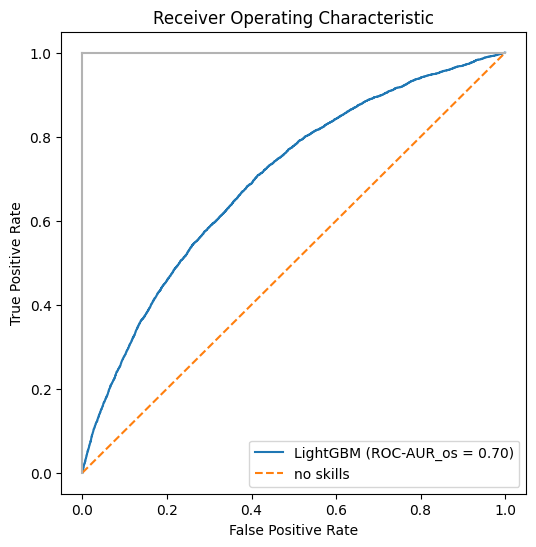

In [223]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_gb_os_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

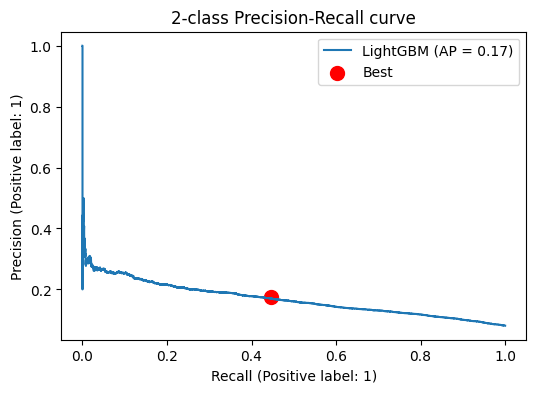

In [224]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_gb_os_tm));
plt.scatter(recall_1_clf_lgbm_os_tm, precision_clf_gb_os_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [225]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - OverSampling - Gradient Boosting"],
    "Threshold" : threshold_clf_gb_os_tm,
    "Business": metrics_score_clf_gb_os_cs,
    "ROC-AUC" : roc_auc_clf_gb_os_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_gb_os_tm,
    "Recall - 1" : recall_1_clf_gb_os_tm,
    "F1 - 1" : f1_clf_gb_os_tm,    
    "Duration (min)" : round(end_time_model_clf_gb_os/60, 1)
})

In [226]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.3.3. Gradient Boosting with UnderSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [227]:
y_prob = clf_gb_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

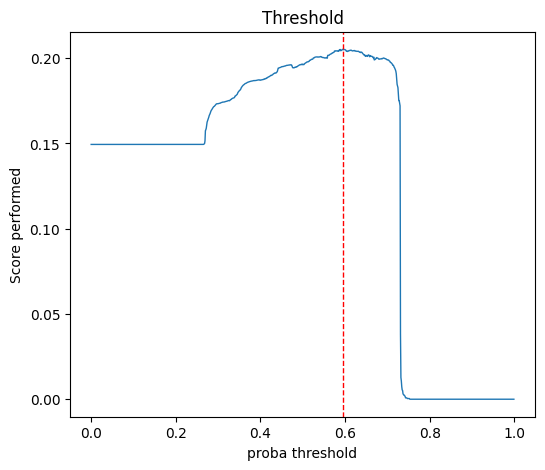

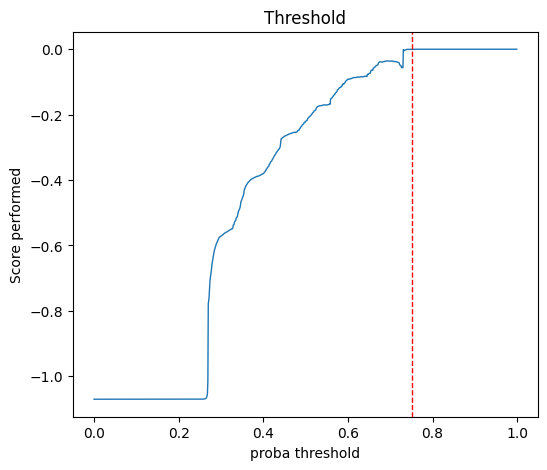

In [228]:
threshold_clf_gb_us_tm, y_pred,_ = threshold_selection(y_test, y_prob, metrics=f1_score)
_, _, metrics_score_clf_gb_us_cs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [229]:
roc_auc_clf_gb_us_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_gb_us_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_gb_us_tm, recall_1_clf_gb_us_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_us_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_gb_us_tm:':<30}{threshold_clf_gb_us_tm}")
print(f"{'roc_auc_clf_gb_us_tm:':<30}{roc_auc_clf_gb_us_tm}")
print(f"{'precision_clf_lgbm_us_tm:':<30}{precision_clf_gb_us_tm}")
print(f"{'recall_1_clf_gb_us_tm:':<30}{recall_1_clf_gb_us_tm}")
print(f"{'f1_clf_gb_us_tm:':<30}{f1_clf_gb_us_tm}")

threshold_clf_gb_us_tm:       0.595
roc_auc_clf_gb_us_tm:         0.625
precision_clf_lgbm_us_tm:     0.131
recall_1_clf_gb_us_tm:        0.474
f1_clf_gb_us_tm:              0.205


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

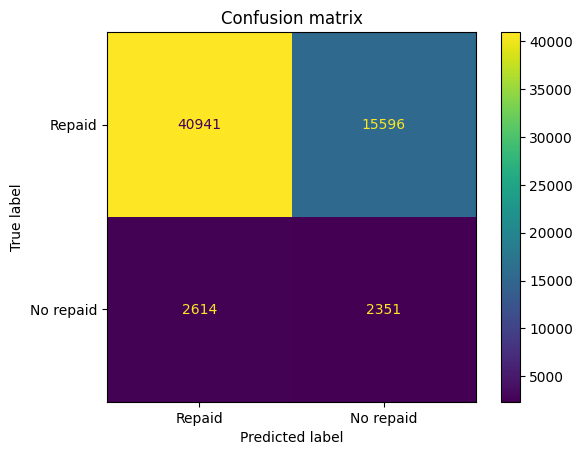

In [230]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

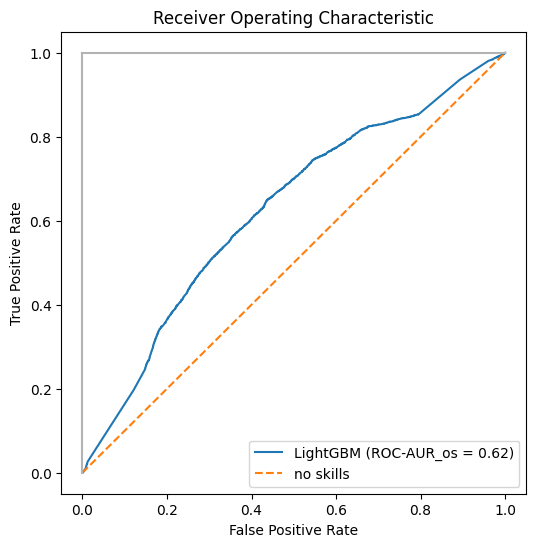

In [231]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_gb_us_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

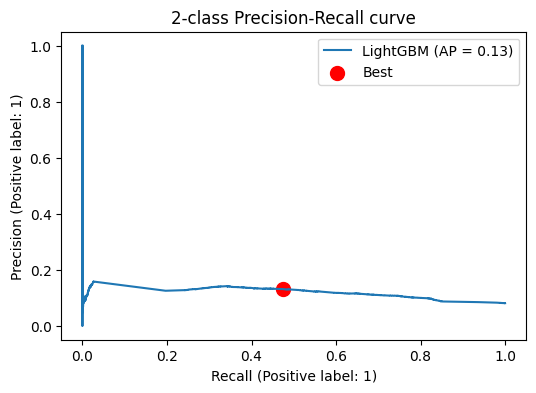

In [232]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_gb_us_tm));
plt.scatter(recall_1_clf_gb_us_tm, precision_clf_gb_us_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [233]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Undersampling - Gradient Boosting"],
    "Threshold" : threshold_clf_gb_us_tm,
    "Business": metrics_score_clf_gb_us_cs,
    "ROC-AUC" : roc_auc_clf_gb_us_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_gb_us_tm,
    "Recall - 1" : recall_1_clf_gb_us_tm,
    "F1 - 1" : f1_clf_gb_us_tm,    
    "Duration (min)" : round(end_time_model_clf_gb_us/60, 1)
})

In [234]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">12. Modelisation Business-Score - Threshold-Moving</h2>
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.0. Business Score</h3>
</div>

<div class="alert alert-block alert-info">
    <p>We need to penalize the <b>False Negative</b> that are loands <b>will be in default</b>, and they were <b>predicted incorrectly</b>.<br>Due to that, we are going to define a <b>Custom Score</b>.
    </p>
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.1. Random Forest</h3>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.1.1. Random Forest with class_weight balanced</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [235]:
y_prob = clf_rf_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

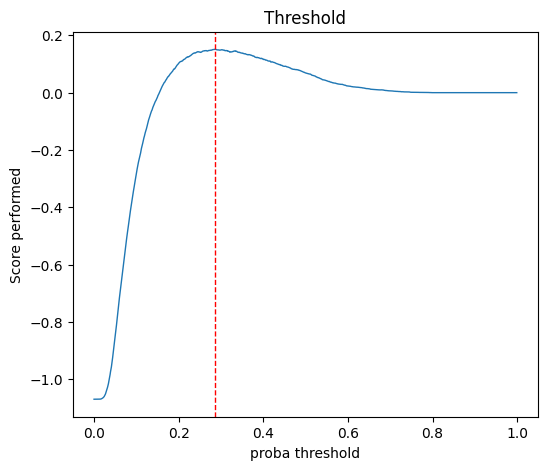

In [236]:
threshold_clf_rf_cw_bs, y_pred, metrics_score_clf_rf_cw_bs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [237]:
roc_auc_clf_rf_cw_bs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_cw_bs = round(precision_score(y_test, y_pred), 3)
recall_0_clf_rf_cw_bs, recall_1_clf_rf_cw_bs = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_cw_bs = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_rf_cw_bs:':<30}{threshold_clf_rf_cw_bs}")
print(f"{'roc_auc_clf_rf_cw_bs:':<30}{roc_auc_clf_rf_cw_bs}")
print(f"{'precision_clf_rf_cw_bs:':<30}{precision_clf_rf_cw_bs}")
print(f"{'recall_1_clf_rf_cw_bs:':<30}{recall_1_clf_rf_cw_bs}")
print(f"{'f1_clf_rf_cw_bs:':<30}{f1_clf_rf_cw_bs}")

threshold_clf_rf_cw_bs:       0.286
roc_auc_clf_rf_cw_bs:         0.748
precision_clf_rf_cw_bs:       0.225
recall_1_clf_rf_cw_bs:        0.405
f1_clf_rf_cw_bs:              0.289


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

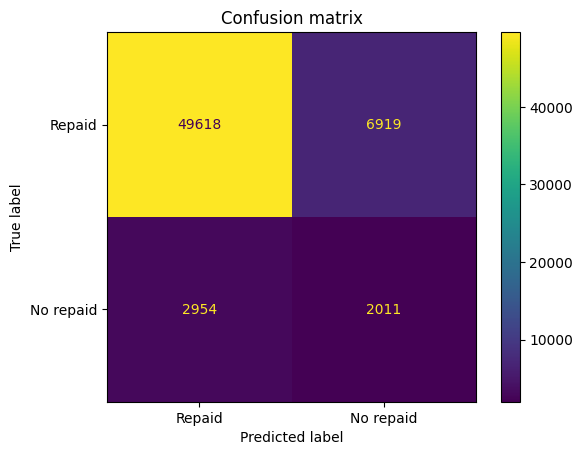

In [238]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

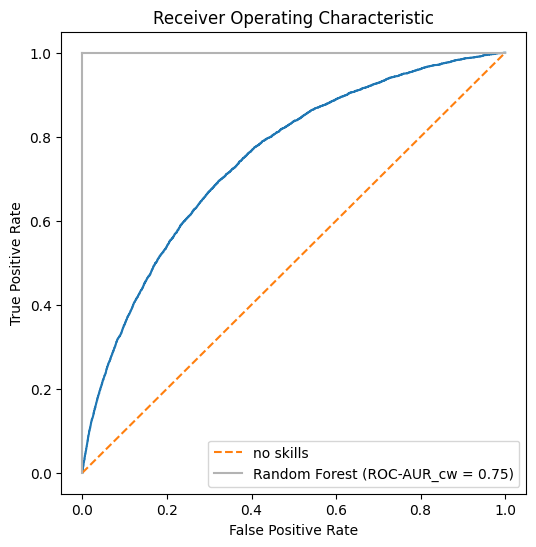

In [239]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--", label='no skills')
plt.plot([0, 0], [1, 0] , c=".7", label="Random Forest (ROC-AUR_cw = %.2f)"% (roc_auc_clf_rf_cw_bs)), 
plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

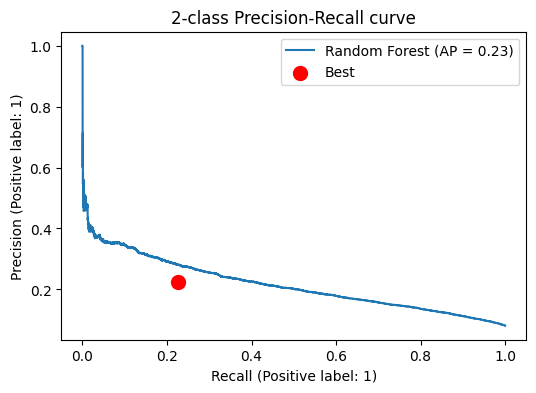

In [240]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_rf_cw_bs));
plt.scatter(precision_clf_rf_cw_bs, precision_clf_rf_cw_bs, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [241]:
df_temp = pd.DataFrame({
    "Model" : ["Business Score - Class weight - Random Forest"],
    "Threshold" : threshold_clf_rf_cw_bs,
    "Business":  metrics_score_clf_rf_cw_bs,
    "ROC-AUC" : roc_auc_clf_rf_cw_bs,  
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_rf_cw_bs,
    "Recall - 1" : recall_1_clf_rf_cw_bs,
    "F1 - 1" : f1_clf_rf_cw_bs,    
    "Duration (min)" : round(end_time_model_clf_rf_cw/60, 1)
})

In [242]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   
18      Business Score - Class weight - Random Forest      0.286     0.152   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7  
18    0.748          0.225       0.405   0.289             3.6

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.1.2. Random Forest with OverSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [243]:
y_prob = clf_rf_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

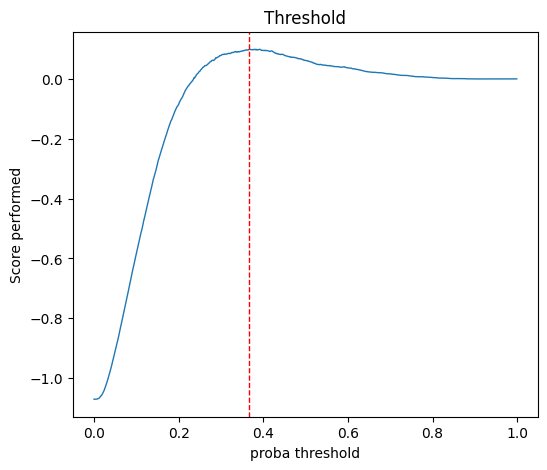

In [244]:
threshold_clf_rf_os_bs, y_pred, metrics_score_clf_rf_os_bs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [245]:
roc_auc_clf_rf_os_bs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_os_bs = round(precision_score(y_test, y_pred), 3)
recall_0_clf_rf_os_bs, recall_1_clf_rf_os_bs = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_os_bs = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_rf_os_bs:':<30}{threshold_clf_rf_os_bs}")
print(f"{'roc_auc_clf_rf_os_bs:':<30}{roc_auc_clf_rf_os_bs}")
print(f"{'precision_clf_rf_os_bs:':<30}{precision_clf_rf_os_bs}")
print(f"{'recall_1_clf_rf_os_bs:':<30}{recall_1_clf_rf_os_bs}")
print(f"{'f1_clf_rf_os_bs:':<30}{f1_clf_rf_os_bs}")

threshold_clf_rf_os_bs:       0.367
roc_auc_clf_rf_os_bs:         0.72
precision_clf_rf_os_bs:       0.206
recall_1_clf_rf_os_bs:        0.332
f1_clf_rf_os_bs:              0.254


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

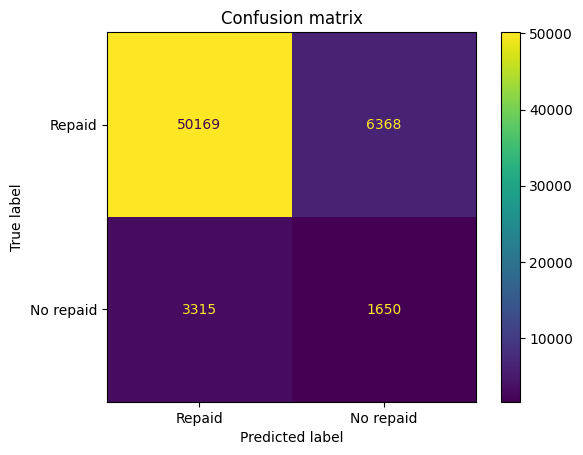

In [246]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

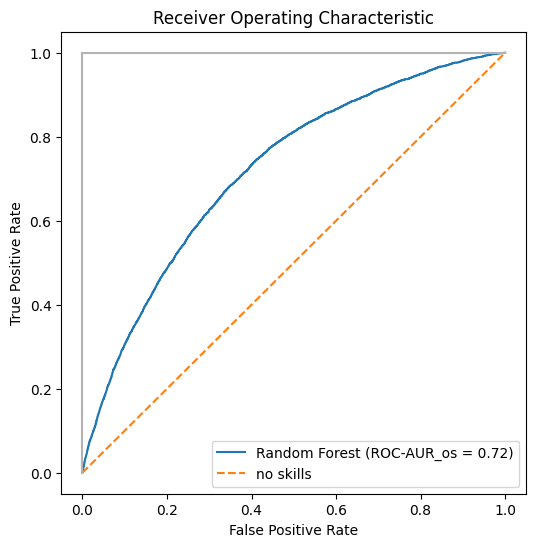

In [247]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="Random Forest (ROC-AUR_os = %.2f)"% (roc_auc_clf_rf_os_bs))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

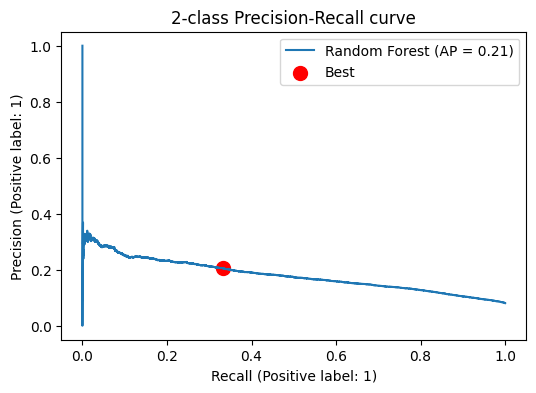

In [248]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_rf_os_bs));
plt.scatter(recall_1_clf_rf_os_bs, precision_clf_rf_os_bs, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [249]:
df_temp = pd.DataFrame({
    "Model" : ["Business Score - OverSampling - Random Forest"],
    "Threshold" : threshold_clf_rf_os_bs,
    "Business": metrics_score_clf_rf_os_bs,
    "ROC-AUC" : roc_auc_clf_rf_os_bs,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_rf_os_bs,
    "Recall - 1" : recall_1_clf_rf_os_bs,
    "F1 - 1" : f1_clf_rf_os_bs,    
    "Duration (min)" : round(end_time_model_clf_rf_os/60, 1)
})

In [250]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   
18      Business Score - Class weight - Random Forest      0.286     0.152   
19      Business Score - OverSampling - Random Forest      0.367     0.099   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7  
18    0.748          0.225       0.405   0.289             3.6  
19    0.720          0.206       0.332   0.254             9.4

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.1.3. Random Forest with UnderSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [251]:
y_prob = clf_rf_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

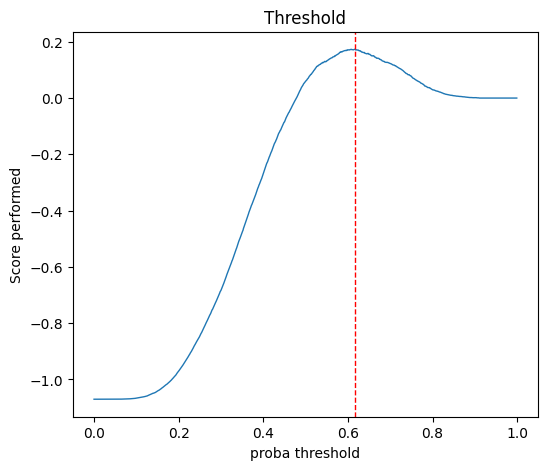

In [252]:
threshold_clf_rf_us_bs, y_pred, metrics_score_clf_rf_us_bs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [253]:
roc_auc_clf_rf_us_bs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_us_bs = round(precision_score(y_test, y_pred), 3)
recall_0_clf_rf_us_bs, recall_1_clf_rf_us_bs = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_us_bs = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_rf_us_bs:':<30}{threshold_clf_rf_us_bs}")
print(f"{'roc_auc_clf_rf_us_bs:':<30}{roc_auc_clf_rf_us_bs}")
print(f"{'precision_clf_rf_us_bs:':<30}{precision_clf_rf_us_bs}")
print(f"{'recall_1_clf_rf_us_bs:':<30}{recall_1_clf_rf_us_bs}")
print(f"{'f1_clf_rf_us_bs:':<30}{f1_clf_rf_us_bs}")

threshold_clf_rf_us_bs:       0.616
roc_auc_clf_rf_us_bs:         0.756
precision_clf_rf_us_bs:       0.239
recall_1_clf_rf_us_bs:        0.411
f1_clf_rf_us_bs:              0.303


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

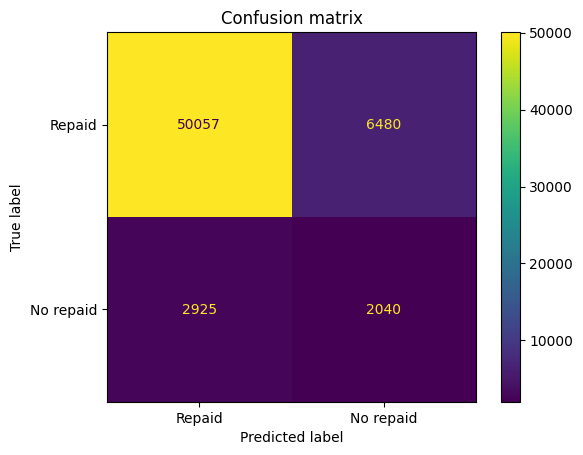

In [254]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

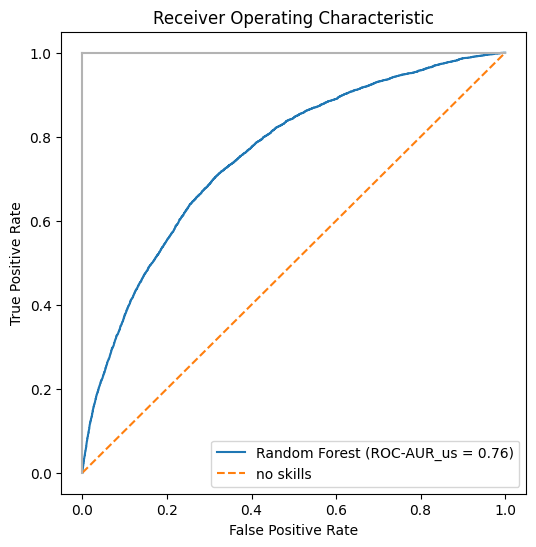

In [255]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="Random Forest (ROC-AUR_us = %.2f)"% (roc_auc_clf_rf_us_bs))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

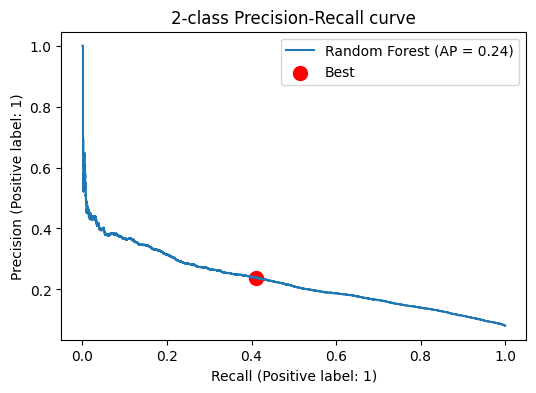

In [256]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_rf_us_bs));
plt.scatter(recall_1_clf_rf_us_bs, precision_clf_rf_us_bs, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [257]:
df_temp = pd.DataFrame({
    "Model" : ["Business Score - Undersampling - Random Forest"],
    "Threshold" : threshold_clf_rf_us_bs,
    "Business": metrics_score_clf_rf_us_bs,
    "ROC-AUC" : roc_auc_clf_rf_us_bs,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_rf_us_bs,
    "Recall - 1" : recall_1_clf_rf_us_bs,
    "F1 - 1" : f1_clf_rf_us_bs,    
    "Duration (min)" : round(end_time_model_clf_rf_us/60, 1)
})

In [258]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   
18      Business Score - Class weight - Random Forest      0.286     0.152   
19      Business Score - OverSampling - Random Forest      0.367     0.099   
20     Business Score - Undersampling - Random Forest      0.616     0.174   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7  
18    0.748          0.225       0.405   0.289             3.6  
19    0.720          0.206       0.332   0.254             9.4  
20    0.756          0.239       0.411   0.303             4.8

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.2. LightGBM</h3>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.2.1. LightGBM with class_weight balanced</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [259]:
y_prob = clf_lgbm_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

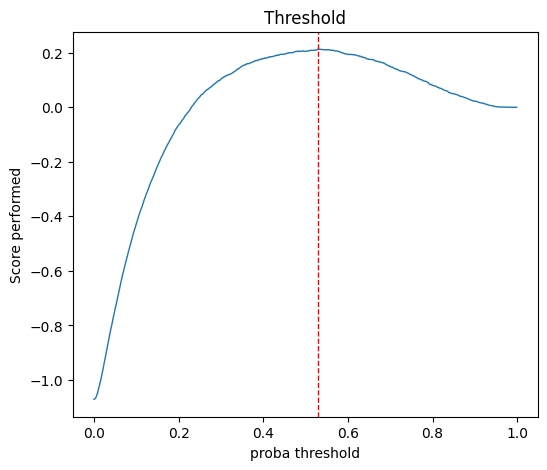

In [260]:
threshold_clf_lgbm_cw_bs, y_pred, metrics_score_clf_lgbm_cw_bs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [261]:
roc_auc_clf_lgbm_cw_bs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_cw_bs = round(precision_score(y_test, y_pred), 3)
recall_0_clf_lgbm_cw_bs, recall_1_clf_lgbm_cw_bs = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_cw_bs = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_cw_bs:':<30}{threshold_clf_lgbm_cw_bs}")
print(f"{'roc_auc_clf_lgbm_cw_bs:':<30}{roc_auc_clf_lgbm_cw_bs}")
print(f"{'precision_clf_lgbm_cw_bs:':<30}{precision_clf_lgbm_cw_bs}")
print(f"{'recall_1_clf_lgbm_cw_bs:':<30}{recall_1_clf_lgbm_cw_bs}")
print(f"{'f1_clf_lgbm_cw_bs:':<30}{f1_clf_lgbm_cw_bs}")

threshold_clf_lgbm_cw_bs:     0.529
roc_auc_clf_lgbm_cw_bs:       0.767
precision_clf_lgbm_cw_bs:     0.269
recall_1_clf_lgbm_cw_bs:      0.42
f1_clf_lgbm_cw_bs:            0.328


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

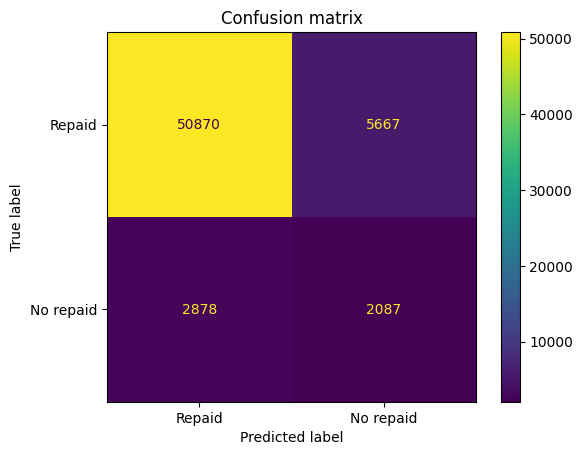

In [262]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

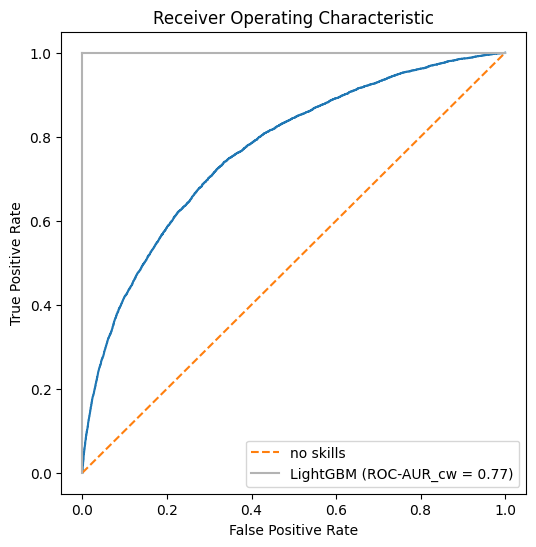

In [263]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--", label='no skills')
plt.plot([0, 0], [1, 0] , c=".7", label="LightGBM (ROC-AUR_cw = %.2f)"% (roc_auc_clf_lgbm_cw_bs)), 
plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

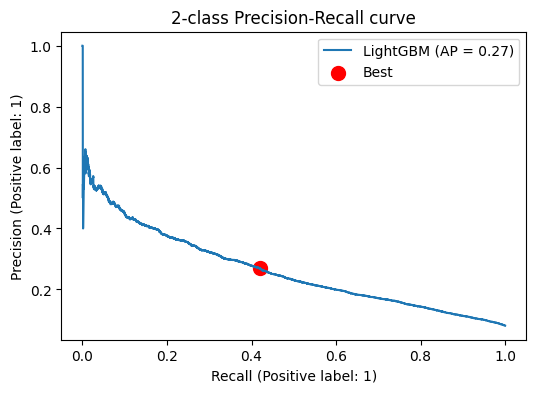

In [264]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_lgbm_cw_bs));
plt.scatter(recall_1_clf_lgbm_cw_bs, precision_clf_lgbm_cw_bs, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [265]:
df_temp = pd.DataFrame({
    "Model" : ["Business Score - Class weight - LightGBM"],
    "Threshold" : threshold_clf_lgbm_cw_bs,
    "Business": metrics_score_clf_lgbm_cw_bs,
    "ROC-AUC" : roc_auc_clf_lgbm_cw_bs,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_lgbm_cw_bs,
    "Recall - 1" : recall_1_clf_lgbm_cw_bs,
    "F1 - 1" : f1_clf_lgbm_cw_bs,    
    "Duration (min)" : round(end_time_model_clf_lgbm_cw/60, 1)
})

In [266]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   
18      Business Score - Class weight - Random Forest      0.286     0.152   
19      Business Score - OverSampling - Random Forest      0.367     0.099   
20     Business Score - Undersampling - Random Forest      0.616     0.174   
21           Business Score - Class weight - LightGBM      0.529     0.213   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7  
18    0.748          0.225       0.405   0.289             3.6  
19    0.720          0.206       0.332   0.254             9.4  
20    0.756          0.239       0.411   0.303             4.8  
21    0.767          0.269       0.420   0.328             3.4

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.2.2. LightGBM with OverSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [267]:
y_prob = clf_lgbm_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

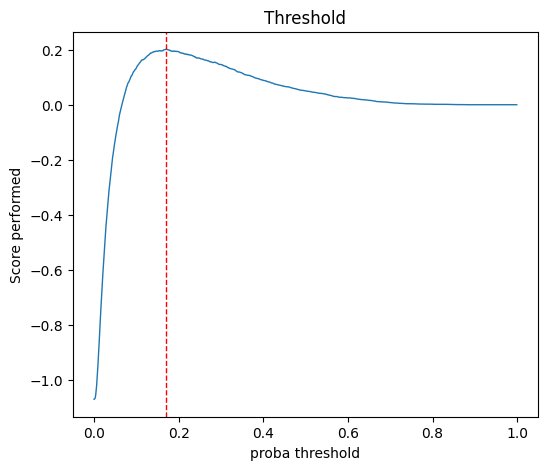

In [268]:
threshold_clf_lgbm_os_bs, y_pred, metrics_score_clf_lgbm_os_bs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [269]:
roc_auc_clf_lgbm_os_bs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_os_bs = round(precision_score(y_test, y_pred), 3)
recall_0_clf_lgbm_os_bs, recall_1_clf_lgbm_os_bs = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_os_bs = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_os_bs:':<30}{threshold_clf_lgbm_os_bs}")
print(f"{'roc_auc_clf_lgbm_os_bs:':<30}{roc_auc_clf_lgbm_os_bs}")
print(f"{'precision_clf_lgbm_os_bs:':<30}{precision_clf_lgbm_os_bs}")
print(f"{'recall_1_clf_lgbm_os_bs:':<30}{recall_1_clf_lgbm_os_bs}")
print(f"{'f1_clf_lgbm_os_bs:':<30}{f1_clf_lgbm_os_tm}")

threshold_clf_lgbm_os_bs:     0.17
roc_auc_clf_lgbm_os_bs:       0.767
precision_clf_lgbm_os_bs:     0.25
recall_1_clf_lgbm_os_bs:      0.445
f1_clf_lgbm_os_bs:            0.32


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

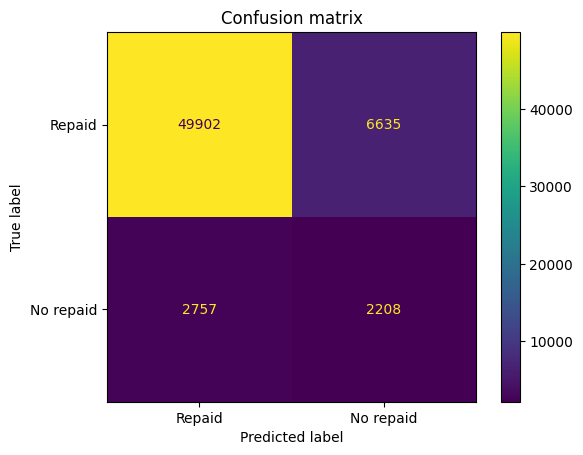

In [270]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

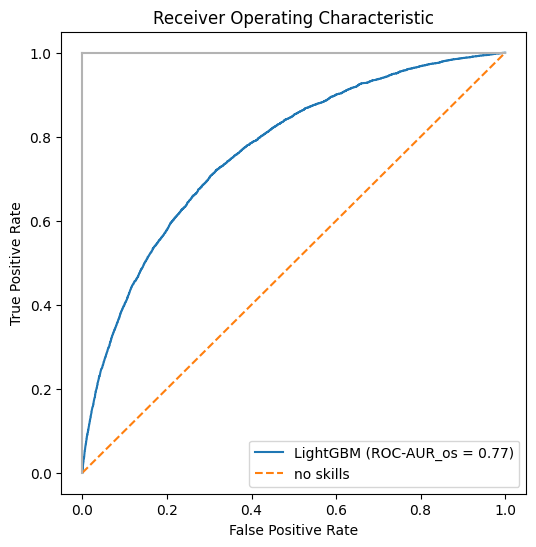

In [271]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_lgbm_os_bs))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

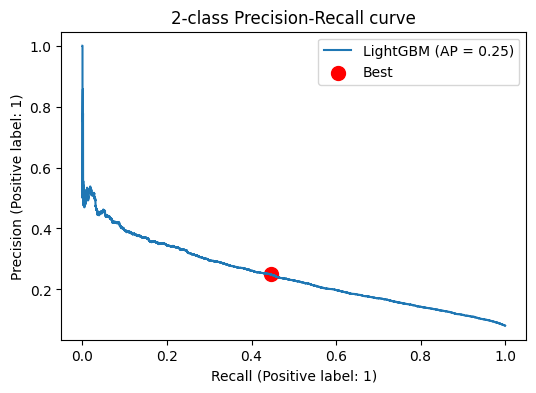

In [272]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_lgbm_os_bs));
plt.scatter(recall_1_clf_lgbm_os_bs, precision_clf_lgbm_os_bs, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [273]:
df_temp = pd.DataFrame({
    "Model" : ["Business Score - OverSampling - LightGBM"],
    "Threshold" : threshold_clf_lgbm_os_bs,
    "Business": metrics_score_clf_lgbm_os_bs,
    "ROC-AUC" : roc_auc_clf_lgbm_os_bs,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_lgbm_os_bs,
    "Recall - 1" : recall_1_clf_lgbm_os_bs,
    "F1 - 1" : f1_clf_lgbm_os_bs,    
    "Duration (min)" : round(end_time_model_clf_lgbm_os/60, 1)
})

In [274]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   
18      Business Score - Class weight - Random Forest      0.286     0.152   
19      Business Score - OverSampling - Random Forest      0.367     0.099   
20     Business Score - Undersampling - Random Forest      0.616     0.174   
21           Business Score - Class weight - LightGBM      0.529     0.213   
22           Business Score - OverSampling - LightGBM      0.170     0.202   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7  
18    0.748          0.225       0.405   0.289             3.6  
19    0.720          0.206       0.332   0.254             9.4  
20    0.756          0.239       0.411   0.303             4.8  
21    0.767          0.269       0.420   0.328             3.4  
22    0.767          0.250       0.445   0.320             2.9

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.2.3. LightGBM with UnderSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [275]:
y_prob = clf_lgbm_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

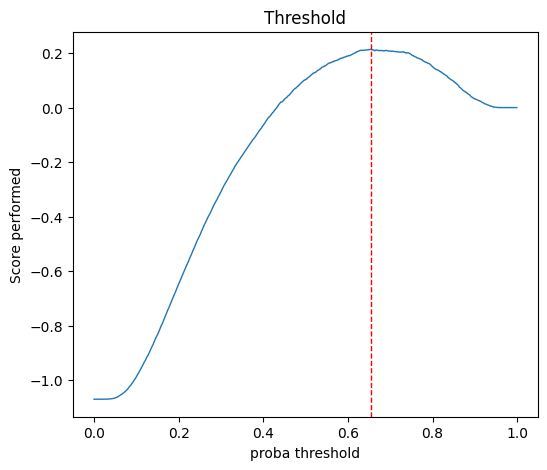

In [276]:
threshold_clf_lgbm_us_bs, y_pred, metrics_score_clf_lgbm_us_bs = threshold_selection(y_test, y_prob, metrics=custom_score)
y_pred_clf_lgbm_us_bs = y_pred

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [277]:
roc_auc_clf_lgbm_us_bs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_us_bs = round(precision_score(y_test, y_pred), 3)
recall_0_clf_lgbm_us_bs, recall_1_clf_lgbm_us_bs = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_us_bs = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_us_bs:':<30}{threshold_clf_lgbm_us_bs}")
print(f"{'roc_auc_clf_lgbm_us_bs:':<30}{roc_auc_clf_lgbm_us_bs}")
print(f"{'precision_clf_lgbm_us_bs:':<30}{precision_clf_lgbm_us_bs}")
print(f"{'recall_1_clf_lgbm_us_bs:':<30}{recall_1_clf_lgbm_us_bs}")
print(f"{'f1_clf_lgbm_us_bs:':<30}{f1_clf_lgbm_us_bs}")

threshold_clf_lgbm_us_bs:     0.654
roc_auc_clf_lgbm_us_bs:       0.777
precision_clf_lgbm_us_bs:     0.242
recall_1_clf_lgbm_us_bs:      0.498
f1_clf_lgbm_us_bs:            0.326


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

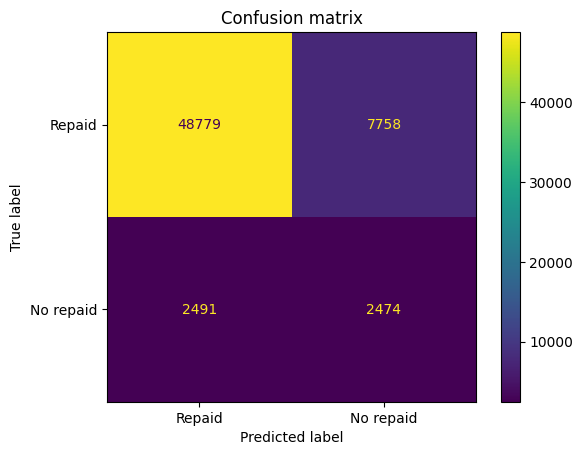

In [278]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

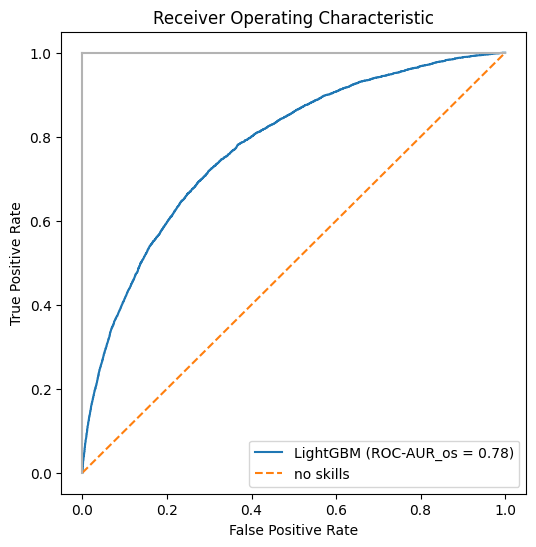

In [279]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_lgbm_us_bs))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

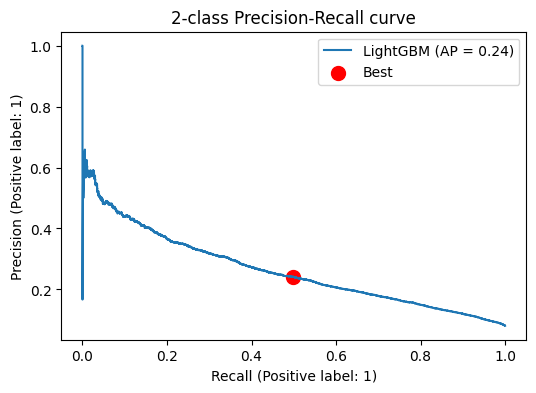

In [280]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_lgbm_us_bs));
plt.scatter(recall_1_clf_lgbm_us_bs, precision_clf_lgbm_us_bs, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [281]:
df_temp = pd.DataFrame({
    "Model" : ["Business Score - Undersampling - LightGBM"],
    "Threshold" : threshold_clf_lgbm_us_bs,
    "Business": metrics_score_clf_lgbm_us_bs,
    "ROC-AUC" : roc_auc_clf_lgbm_us_bs,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_lgbm_us_bs,
    "Recall - 1" : recall_1_clf_lgbm_us_bs,
    "F1 - 1" : f1_clf_lgbm_us_bs,    
    "Duration (min)" : round(end_time_model_clf_lgbm_us/60, 1)
})

In [282]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   
18      Business Score - Class weight - Random Forest      0.286     0.152   
19      Business Score - OverSampling - Random Forest      0.367     0.099   
20     Business Score - Undersampling - Random Forest      0.616     0.174   
21           Business Score - Class weight - LightGBM      0.529     0.213   
22           Business Score - OverSampling - LightGBM      0.170     0.202   
23          Business Score - Undersampling - LightGBM      0.654     0.214   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7  
18    0.748          0.225       0.405   0.289             3.6  
19    0.720          0.206       0.332   0.254             9.4  
20    0.756          0.239       0.411   0.303             4.8  
21    0.767          0.269       0.420   0.328             3.4  
22    0.767          0.250       0.445   0.320             2.9  
23    0.777          0.242       0.498   0.326             0.2

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>All models have improved the Recall - 1</li>
        <li>OverSampling - Gradient Boosting has taken a lot of time</li>
    </ul>    
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.3. Gradient Boosting</h3>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.3.1. Gradient Boosting with class_weight balanced</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [283]:
y_prob = clf_gb_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

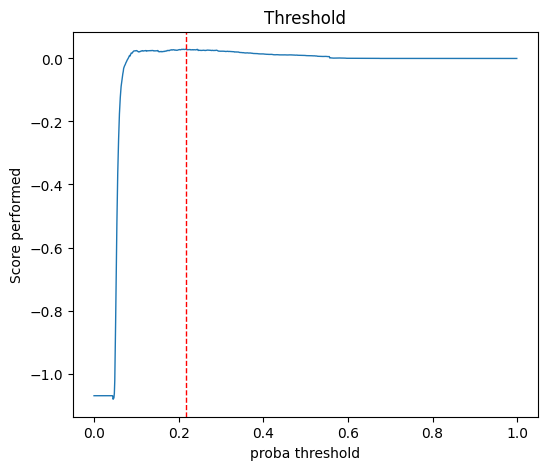

In [284]:
threshold_clf_gb_cw_bs, y_pred, metrics_score_clf_gb_cw_bs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [285]:
roc_auc_clf_gb_cw_bs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_gb_cw_bs = round(precision_score(y_test, y_pred), 3)
recall_0_clf_gb_cw_bs, recall_1_clf_gb_cw_bs = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_cw_bs = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_gb_cw_bs:':<30}{threshold_clf_gb_cw_bs}")
print(f"{'roc_auc_clf_gb_cw_bs:':<30}{roc_auc_clf_gb_cw_bs}")
print(f"{'precision_clf_lgbm_cw_bs:':<30}{precision_clf_lgbm_cw_bs}")
print(f"{'recall_1_clf_gb_cw_bs:':<30}{recall_1_clf_gb_cw_bs}")
print(f"{'f1_clf_gb_cw_bs:':<30}{f1_clf_gb_cw_bs}")

threshold_clf_gb_cw_bs:       0.217
roc_auc_clf_gb_cw_bs:         0.643
precision_clf_lgbm_cw_bs:     0.269
recall_1_clf_gb_cw_bs:        0.108
f1_clf_gb_cw_bs:              0.14


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

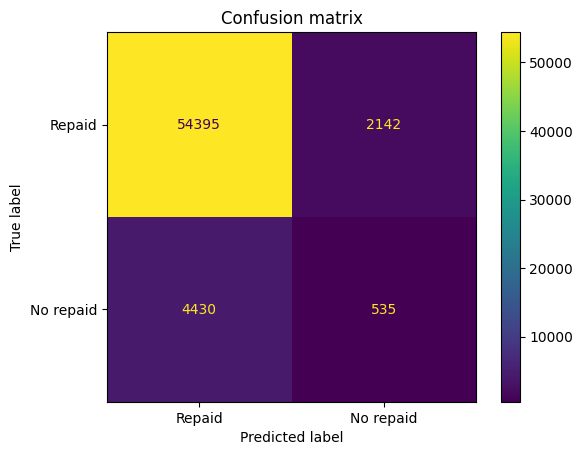

In [286]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

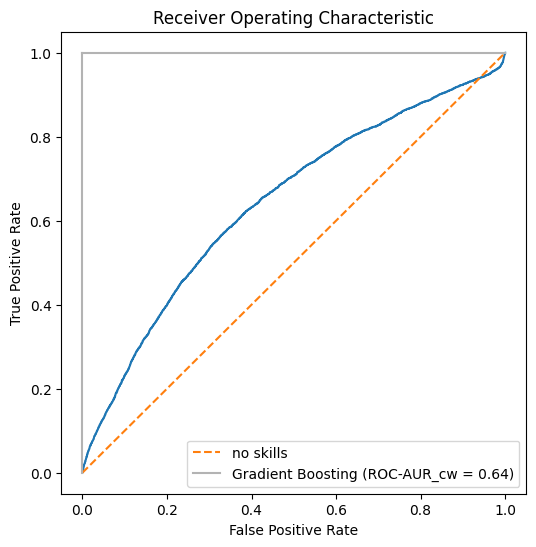

In [287]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--", label='no skills')
plt.plot([0, 0], [1, 0] , c=".7", label="Gradient Boosting (ROC-AUR_cw = %.2f)"% (roc_auc_clf_gb_cw_bs)), 
plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

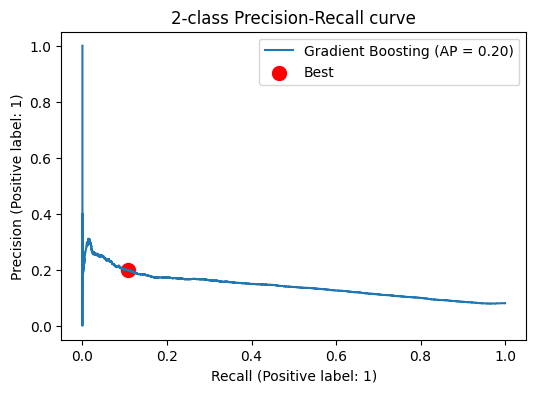

In [288]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Gradient Boosting (AP = %.2f)"% (precision_clf_gb_cw_bs));
plt.scatter(recall_1_clf_gb_cw_bs, precision_clf_gb_cw_bs, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [289]:
df_temp = pd.DataFrame({
    "Model" : ["Business Score - Class weight - Gradient Boosting"],
    "Threshold" : threshold_clf_gb_cw_bs,
    "Business": metrics_score_clf_gb_cw_bs,
    "ROC-AUC" : roc_auc_clf_gb_cw_bs,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_gb_cw_bs,
    "Recall - 1" : recall_1_clf_gb_cw_bs,
    "F1 - 1" : f1_clf_gb_cw_bs,    
    "Duration (min)" : round(end_time_model_clf_gb_cw/60, 1)
})

In [290]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   
18      Business Score - Class weight - Random Forest      0.286     0.152   
19      Business Score - OverSampling - Random Forest      0.367     0.099   
20     Business Score - Undersampling - Random Forest      0.616     0.174   
21           Business Score - Class weight - LightGBM      0.529     0.213   
22           Business Score - OverSampling - LightGBM      0.170     0.202   
23          Business Score - Undersampling - LightGBM      0.654     0.214   
24  Business Score - Class weight - Gradient Boosting      0.217     0.029   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7  
18    0.748          0.225       0.405   0.289             3.6  
19    0.720          0.206       0.332   0.254             9.4  
20    0.756          0.239       0.411   0.303             4.8  
21    0.767          0.269       0.420   0.328             3.4  
22    0.767          0.250       0.445   0.320             2.9  
23    0.777          0.242       0.498   0.326             0.2  
24    0.643          0.200       0.108   0.140             4.5

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.3.2. Gradient Boosting with OverSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [291]:
y_prob = clf_gb_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

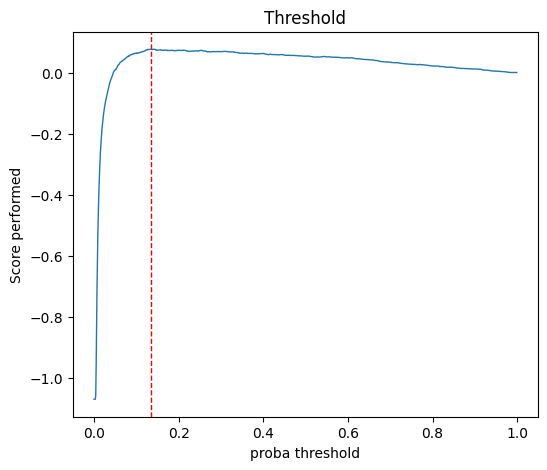

In [292]:
threshold_clf_gb_os_bs, y_pred, metrics_score_clf_gb_os_bs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [293]:
roc_auc_clf_gb_os_bs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_gb_os_bs = round(precision_score(y_test, y_pred), 3)
recall_0_clf_gb_os_bs, recall_1_clf_gb_os_bs = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_os_bs = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_os_bs:':<30}{threshold_clf_lgbm_os_bs}")
print(f"{'roc_auc_clf_lgbm_os_bs:':<30}{roc_auc_clf_lgbm_os_bs}")
print(f"{'precision_clf_gb_os_bs:':<30}{precision_clf_gb_os_bs}")
print(f"{'recall_1_clf_lgbm_os_bs:':<30}{recall_1_clf_lgbm_os_bs}")
print(f"{'f1_clf_lgbm_os_bs:':<30}{f1_clf_lgbm_os_bs}")

threshold_clf_lgbm_os_bs:     0.17
roc_auc_clf_lgbm_os_bs:       0.767
precision_clf_gb_os_bs:       0.189
recall_1_clf_lgbm_os_bs:      0.445
f1_clf_lgbm_os_bs:            0.32


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

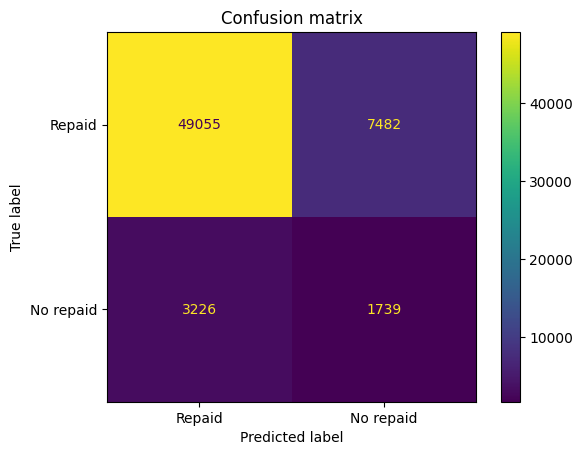

In [294]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

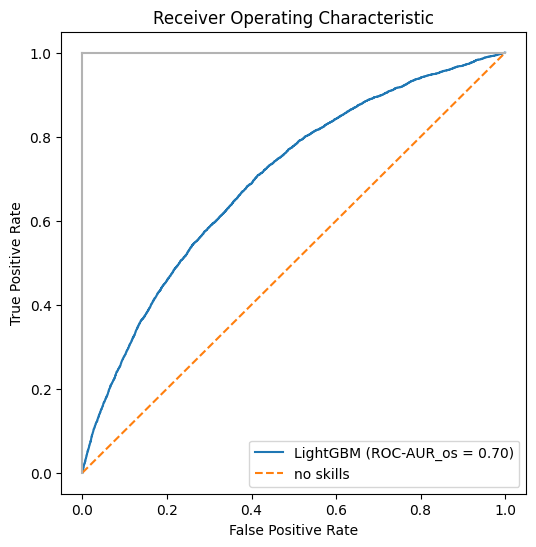

In [295]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_gb_os_bs))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

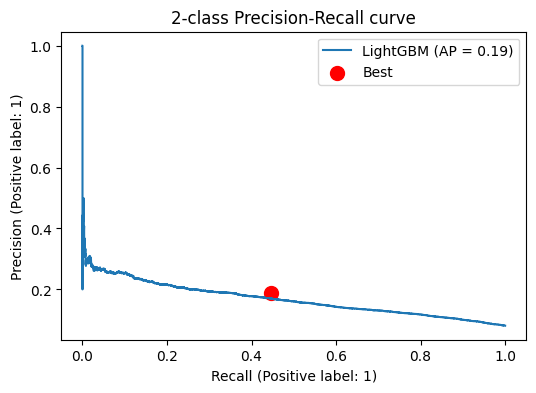

In [296]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_gb_os_bs));
plt.scatter(recall_1_clf_lgbm_os_bs, precision_clf_gb_os_bs, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [297]:
df_temp = pd.DataFrame({
    "Model" : ["Business Score - OverSampling - Gradient Boosting"],
    "Threshold" : threshold_clf_gb_os_bs,
    "Business": metrics_score_clf_gb_os_bs,
    "ROC-AUC" : roc_auc_clf_gb_os_bs,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_gb_os_bs,
    "Recall - 1" : recall_1_clf_gb_os_bs,
    "F1 - 1" : f1_clf_gb_os_bs,    
    "Duration (min)" : round(end_time_model_clf_gb_os/60, 1)
})

In [298]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   
18      Business Score - Class weight - Random Forest      0.286     0.152   
19      Business Score - OverSampling - Random Forest      0.367     0.099   
20     Business Score - Undersampling - Random Forest      0.616     0.174   
21           Business Score - Class weight - LightGBM      0.529     0.213   
22           Business Score - OverSampling - LightGBM      0.170     0.202   
23          Business Score - Undersampling - LightGBM      0.654     0.214   
24  Business Score - Class weight - Gradient Boosting      0.217     0.029   
25  Business Score - OverSampling - Gradient Boosting      0.134     0.076   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7  
18    0.748          0.225       0.405   0.289             3.6  
19    0.720          0.206       0.332   0.254             9.4  
20    0.756          0.239       0.411   0.303             4.8  
21    0.767          0.269       0.420   0.328             3.4  
22    0.767          0.250       0.445   0.320             2.9  
23    0.777          0.242       0.498   0.326             0.2  
24    0.643          0.200       0.108   0.140             4.5  
25    0.698          0.189       0.350   0.245            79.2

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.3.3. Gradient Boosting with UnderSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [299]:
y_prob = clf_gb_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

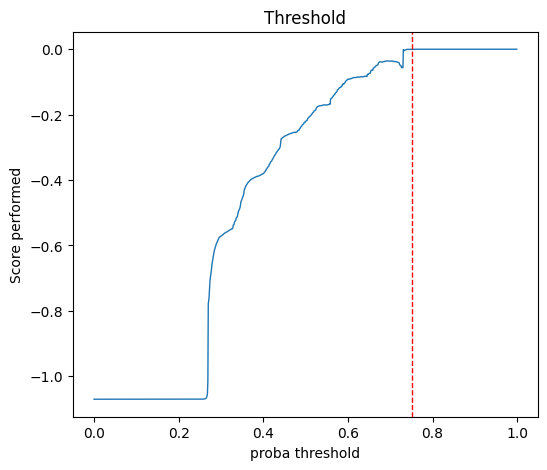

In [300]:
threshold_clf_gb_us_bs, y_pred, metrics_score_clf_gb_us_bs = threshold_selection(y_test, y_prob, metrics=custom_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [301]:
roc_auc_clf_gb_us_bs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_gb_us_bs = round(precision_score(y_test, y_pred), 3)
recall_0_clf_gb_us_bs, recall_1_clf_gb_us_bs = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_us_bs = round(f1_score(y_test, y_pred), 3)
print(f"{'roc_auc_clf_gb_us_bs:':<30}{roc_auc_clf_gb_us_bs}")
print(f"{'precision_clf_gb_us_bs:':<30}{precision_clf_gb_us_bs}")
print(f"{'precision_clf_lgbm_us_bs:':<30}{precision_clf_gb_us_bs}")
print(f"{'recall_1_clf_gb_us_bs:':<30}{recall_1_clf_gb_us_bs}")
print(f"{'f1_clf_gb_us_bs:':<30}{f1_clf_gb_us_bs}")

roc_auc_clf_gb_us_bs:         0.625
precision_clf_gb_us_bs:       0.167
precision_clf_lgbm_us_bs:     0.167
recall_1_clf_gb_us_bs:        0.0
f1_clf_gb_us_bs:              0.0


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

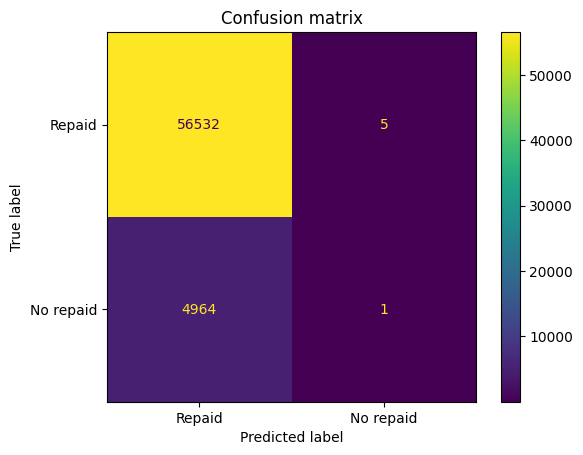

In [302]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

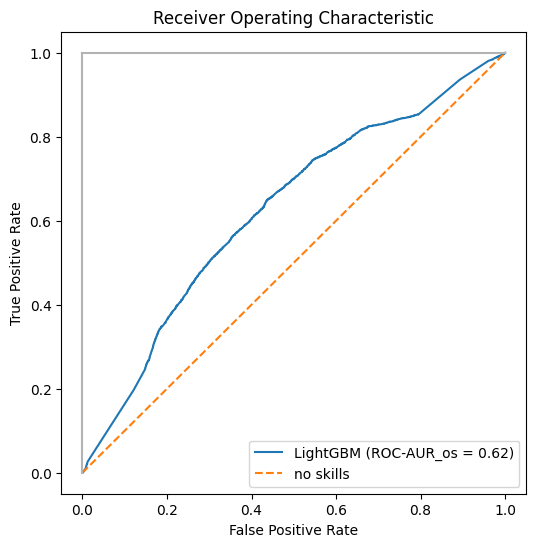

In [303]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_gb_us_bs))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

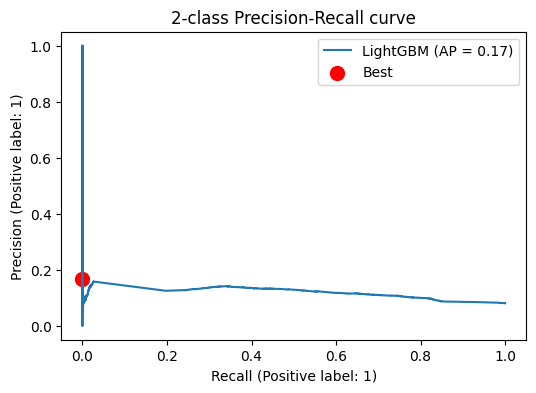

In [304]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_gb_us_bs));
plt.scatter(recall_1_clf_gb_us_bs, precision_clf_gb_us_bs, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [305]:
df_temp = pd.DataFrame({
    "Model" : ["Business Score - Undersampling - Gradient Boosting"],
    "Threshold" : threshold_clf_gb_us_bs,
    "Business": metrics_score_clf_gb_us_bs ,
    "ROC-AUC" : roc_auc_clf_gb_us_bs,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_gb_us_bs,
    "Recall - 1" : recall_1_clf_gb_us_bs,
    "F1 - 1" : f1_clf_gb_us_bs,    
    "Duration (min)" : round(end_time_model_clf_gb_us/60, 1)
})

In [306]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

Model  Threshold  Business  \
0                        Class weight - Random Forest      0.500     0.152   
1                             Class weight - LightGBM      0.500     0.213   
2                           Tuned - Gradient Boosting      0.500     0.029   
3                        OverSampling - Random Forest      0.500     0.099   
4                             OverSampling - LightGBM      0.500     0.202   
5                    OverSampling - Gradient Boosting      0.500     0.076   
6                       UnderSampling - Random Forest      0.500     0.174   
7                            UnderSampling - LightGBM      0.500     0.214   
8                   UnderSampling - Gradient Boosting      0.500     0.000   
9     Threshold-Moving - Class weight - Random Forest      0.286     0.152   
10    Threshold-Moving - OverSampling - Random Forest      0.303     0.099   
11   Threshold-Moving - Undersampling - Random Forest      0.616     0.174   
12         Threshold-Moving - Class weight - LightGBM      0.554     0.213   
13         Threshold-Moving - OverSampling - LightGBM      0.170     0.202   
14        Threshold-Moving - Undersampling - LightGBM      0.654     0.214   
15  Threshold-Moving - Class weight - Gradient Boo...      0.070     0.029   
16  Threshold-Moving - OverSampling - Gradient Boo...      0.087     0.076   
17  Threshold-Moving - Undersampling - Gradient Bo...      0.595     0.000   
18      Business Score - Class weight - Random Forest      0.286     0.152   
19      Business Score - OverSampling - Random Forest      0.367     0.099   
20     Business Score - Undersampling - Random Forest      0.616     0.174   
21           Business Score - Class weight - LightGBM      0.529     0.213   
22           Business Score - OverSampling - LightGBM      0.170     0.202   
23          Business Score - Undersampling - LightGBM      0.654     0.214   
24  Business Score - Class weight - Gradient Boosting      0.217     0.029   
25  Business Score - OverSampling - Gradient Boosting      0.134     0.076   
26  Business Score - Undersampling - Gradient Boos...      0.752     0.000   

    ROC-AUC  Precision - 1  Recall - 1  F1 - 1  Duration (min)  
0     0.748          0.340       0.107   0.162             3.6  
1     0.767          0.251       0.447   0.321             3.4  
2     0.643          0.306       0.016   0.030             4.5  
3     0.720          0.245       0.141   0.179             9.4  
4     0.767          0.434       0.066   0.114             2.9  
5     0.698          0.235       0.130   0.168            79.2  
6     0.756          0.166       0.695   0.268             4.8  
7     0.777          0.175       0.712   0.281             0.2  
8     0.625          0.117       0.601   0.197             0.7  
9     0.748          0.225       0.405   0.289             3.6  
10    0.720          0.181       0.462   0.260             9.4  
11    0.756          0.239       0.411   0.303             4.8  
12    0.767          0.284       0.390   0.329             3.4  
13    0.767          0.250       0.445   0.320             2.9  
14    0.777          0.242       0.498   0.326             0.2  
15    0.643          0.145       0.455   0.220             4.5  
16    0.698          0.174       0.427   0.247            79.2  
17    0.625          0.131       0.474   0.205             0.7  
18    0.748          0.225       0.405   0.289             3.6  
19    0.720          0.206       0.332   0.254             9.4  
20    0.756          0.239       0.411   0.303             4.8  
21    0.767          0.269       0.420   0.328             3.4  
22    0.767          0.250       0.445   0.320             2.9  
23    0.777          0.242       0.498   0.326             0.2  
24    0.643          0.200       0.108   0.140             4.5  
25    0.698          0.189       0.350   0.245            79.2  
26    0.625          0.167       0.000   0.000             0.7

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">X. Comparaison models / methods</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Let's plot all metrics</p>
</div>

In [307]:
df_temp = df_models_metrics_complete.drop(["Threshold", "Duration (min)"], axis=1)

In [308]:
df_temp = pd.melt(df_temp, id_vars="Model", var_name="Metric", value_name="Value")
df_temp.head()

Model    Metric  Value
0  Class weight - Random Forest  Business  0.152
1       Class weight - LightGBM  Business  0.213
2     Tuned - Gradient Boosting  Business  0.029
3  OverSampling - Random Forest  Business  0.099
4       OverSampling - LightGBM  Business  0.202

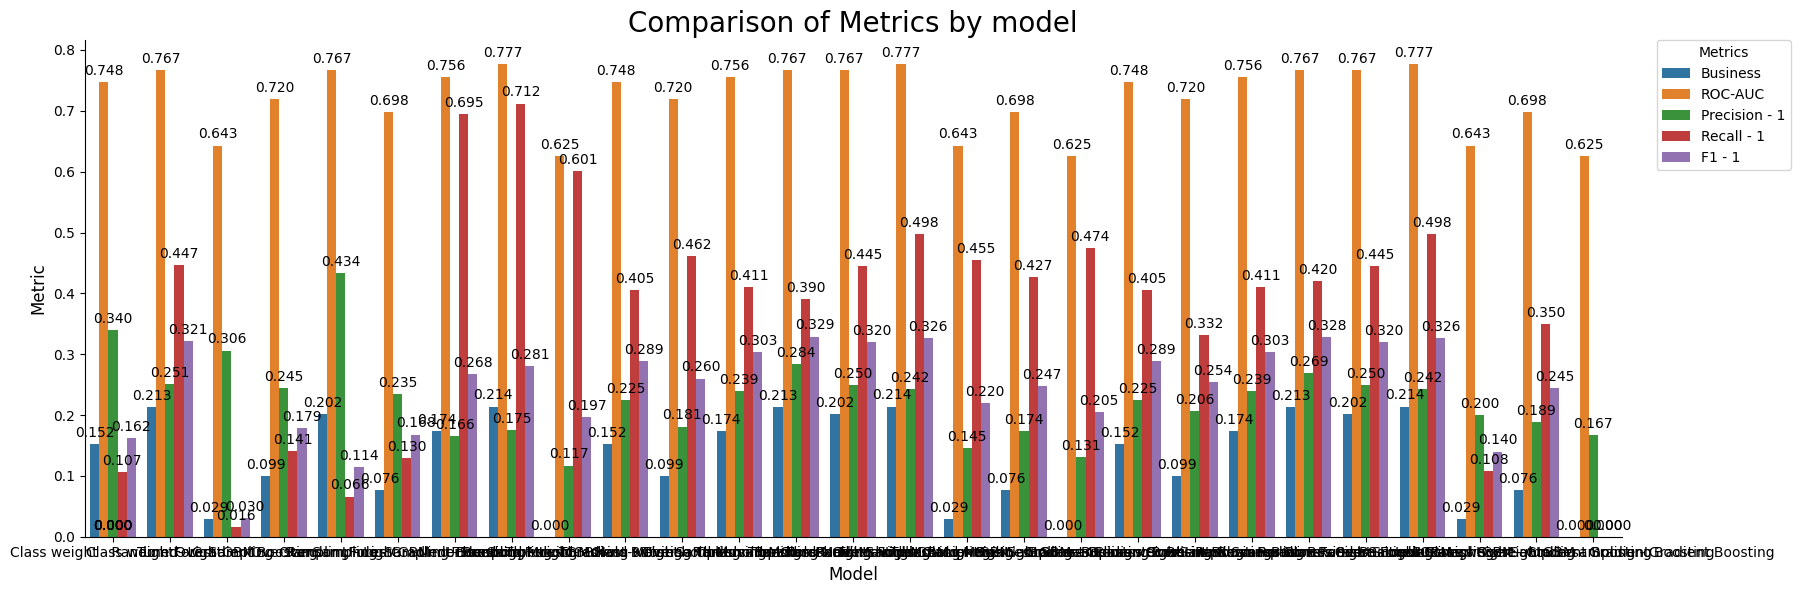

In [309]:
fig, ax1 = plt.subplots(figsize=(18, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_temp, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model", size=20)
plt.legend(bbox_to_anchor=(1.11, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>The results are very similar without time comparison</li>
        <li>We can notice a small lift in the OverSampling - Gradient Boosting results in comparison with Tuned - Gradiend Boosting</li>
        <li>Recall - 1 in OverSampling - LightGBM is a little higher in comparison with the others</li>
    </ul>    
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">11. Model interpretation</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to interpret the model based on the <b>Class weight / SelectKBest - LightGBM</b> model </p>
    <p>But first, we have to identify the features selected</p>
</div>

In [310]:
df_analysis(X_fs, "X - selected features", analysis_type="header")


Analysis Header of X - selected features dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 131 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 152.8 MB


<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.1. Global interpretation</h3>
</div>

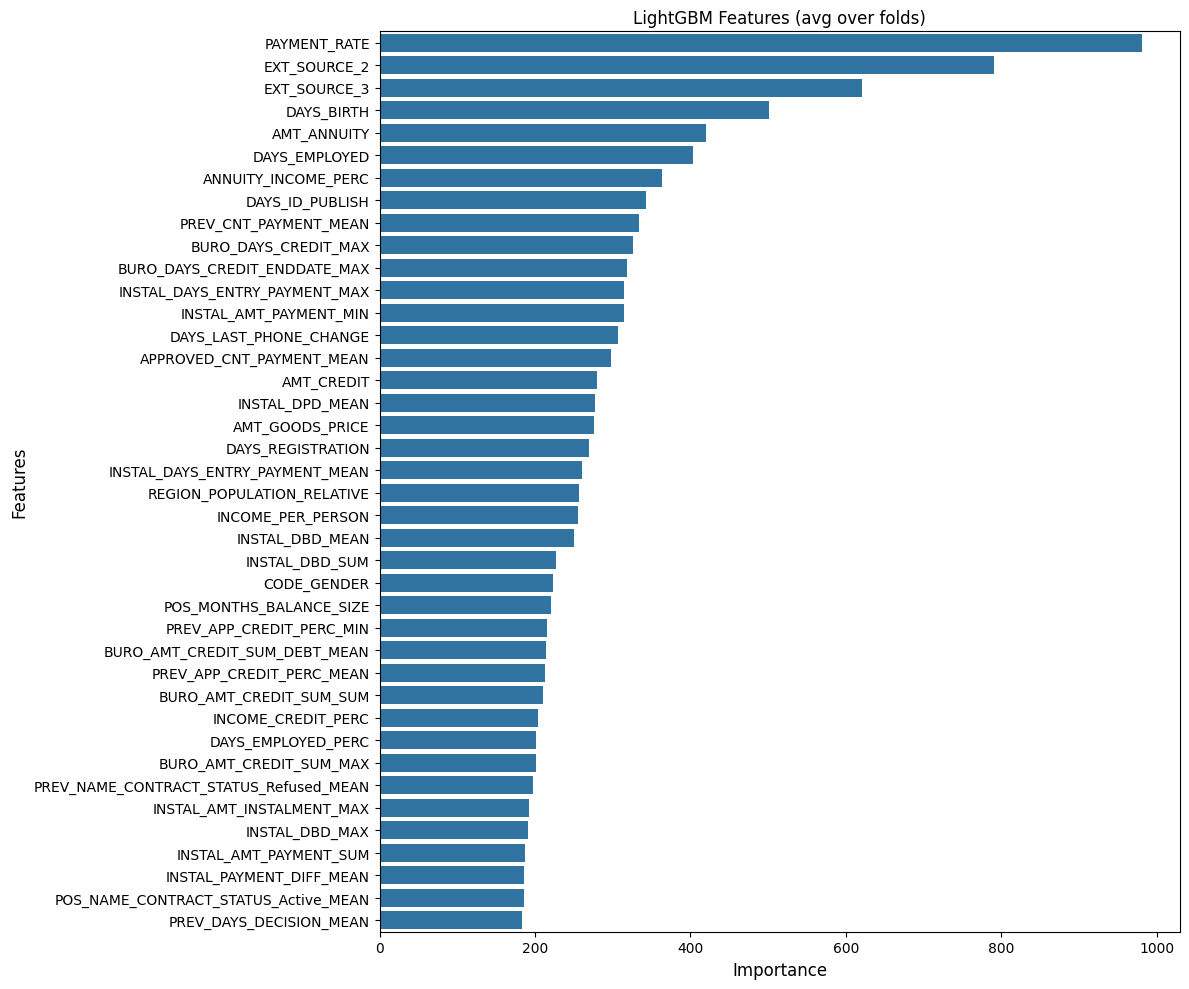

In [311]:
# Feature importance
feature_importance_df_ = pd.DataFrame({"importance":clf_lgbm_us[1].feature_importances_, "feature":X_fs.columns})

cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
plt.figure(figsize=(12, 10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.xlabel("Importance", fontsize=12);
plt.ylabel("Features", fontsize=12);
plt.title("LightGBM Features (avg over folds)")
plt.tight_layout()
plt.show()

In [312]:
df_fs = feature_importance_df_.copy()
df_fs.sort_values(by="importance", ascending=False, inplace=True)
df_fs["ranking"]= df_fs['importance'].rank(ascending=False, method='min').astype(int)
df_fs[["feature","importance","ranking"]]
df_fs.to_csv(DF_FS_FILENAME, index=False)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Within the most important features, we can see: </p>
    <ul style="list-style-type: square;">
        <li>EXT_SOURCE_2 and EXT_SOURCE_3: Data that comes from other financial institutions</li>
        <li>DAYS_BIRTH, DAYS_REGISTRATION: Age and antiquity of the person in the bank</li>
        <li>AMT_CREDIT: Previous credits application in the bank</li>
        <li>_MAX, _SUM, _MEAN, _PERC, _MIN: Characteristics from the feature engineering</li>
    </ul>    
</div>

<div class="alert alert-block alert-info">
    <p>To make the local interpretation, we are going to use SHAP</p>
    <p>But first, we need to have our reduced dataset based on the Feature selection done</p>
</div>

In [313]:
%%time
clf_lgbm_us_explainer = shap.TreeExplainer(clf_lgbm_us[1])

CPU times: total: 688 ms
Wall time: 685 ms


In [314]:
%%time
clf_lgbm_us_shap_values = clf_lgbm_us_explainer.shap_values(X_test_fs)

CPU times: total: 9min 22s
Wall time: 55.1 s


C:\Python\venv\env_P7\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


Sauvegarde des elements de calcul du SHAP (temps de calcul important)

In [315]:
pickle.dump(clf_lgbm_us_shap_values, open(SHAP_VALUES_FILENAME, 'wb'))

In [316]:
clf_lgbm_us_shap_values = pickle.load(open(SHAP_VALUES_FILENAME, 'rb'))

In [317]:
pickle.dump(clf_lgbm_us_explainer, open(SHAP_EXPECTED_VALUES_FILENAME, 'wb'))

In [318]:
clf_lgbm_us_explainer = pickle.load(open(SHAP_EXPECTED_VALUES_FILENAME, 'rb'))

<div class="alert alert-block alert-info">
    <p>Now we are going to analyze the result and influence of some features over an observation</p>
    <p>In this case, we are going to take an observation who is in default</p>
</div>

In [319]:
ind_test1 = 4
y_pred_clf_lgbm_us_bs[ind_test1]
print(y_pred_clf_lgbm_us_bs[ind_test1])
shap.force_plot(clf_lgbm_us_explainer.expected_value, 
                clf_lgbm_us_shap_values[ind_test1, :], 
                X_test_fs.iloc[ind_test1, :])

1


In [320]:
# explainer = TreeExplainer(model)

exp_1 = shap.Explanation(clf_lgbm_us_shap_values[ind_test1][:], 
                  clf_lgbm_us_explainer.expected_value, 
                  data=X_test_fs.iloc[ind_test1,:], 
                  feature_names=X_test_fs.columns)


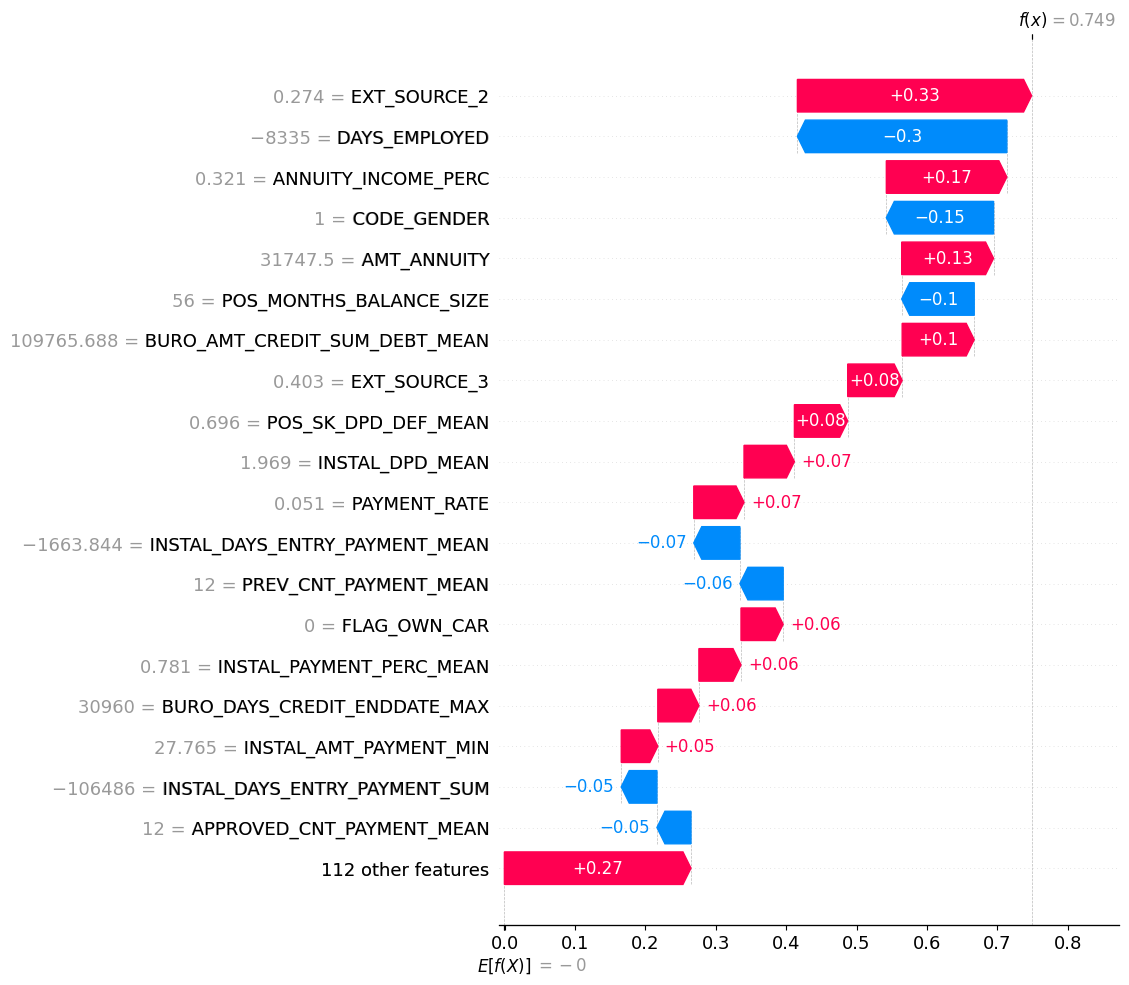

CPU times: total: 578 ms
Wall time: 598 ms


In [321]:
%%time
waterfall(exp_1, max_display=20)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>We can notice that EXT_SOURCE_2, ANNUITY_INCOME_PERC have a strong influence in the result for this observation pushing the prediction to the right</li>
    </ul> 
</div>

<div class="alert alert-block alert-info">
    <p>Let's analyze an observation is not in default</p>
</div>

In [322]:
ind_test2 = 0
y_pred_clf_lgbm_us_bs[ind_test2]
print(y_pred_clf_lgbm_us_bs[ind_test2])
shap.force_plot(clf_lgbm_us_explainer.expected_value, 
                clf_lgbm_us_shap_values[ind_test2, :], 
                X_test_fs.iloc[ind_test2, :])

0


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>In this case, EXT_SOURCE_2 and PAYMENT_RATE pushs the prediction to the left</li>
    </ul> 
</div>

In [323]:
# explainer = TreeExplainer(model)

exp_2 = shap.Explanation(clf_lgbm_us_shap_values[ind_test2][:], 
                  clf_lgbm_us_explainer.expected_value, 
                  data=X_test_fs.iloc[ind_test2,:], 
                  feature_names=X_test_fs.columns)


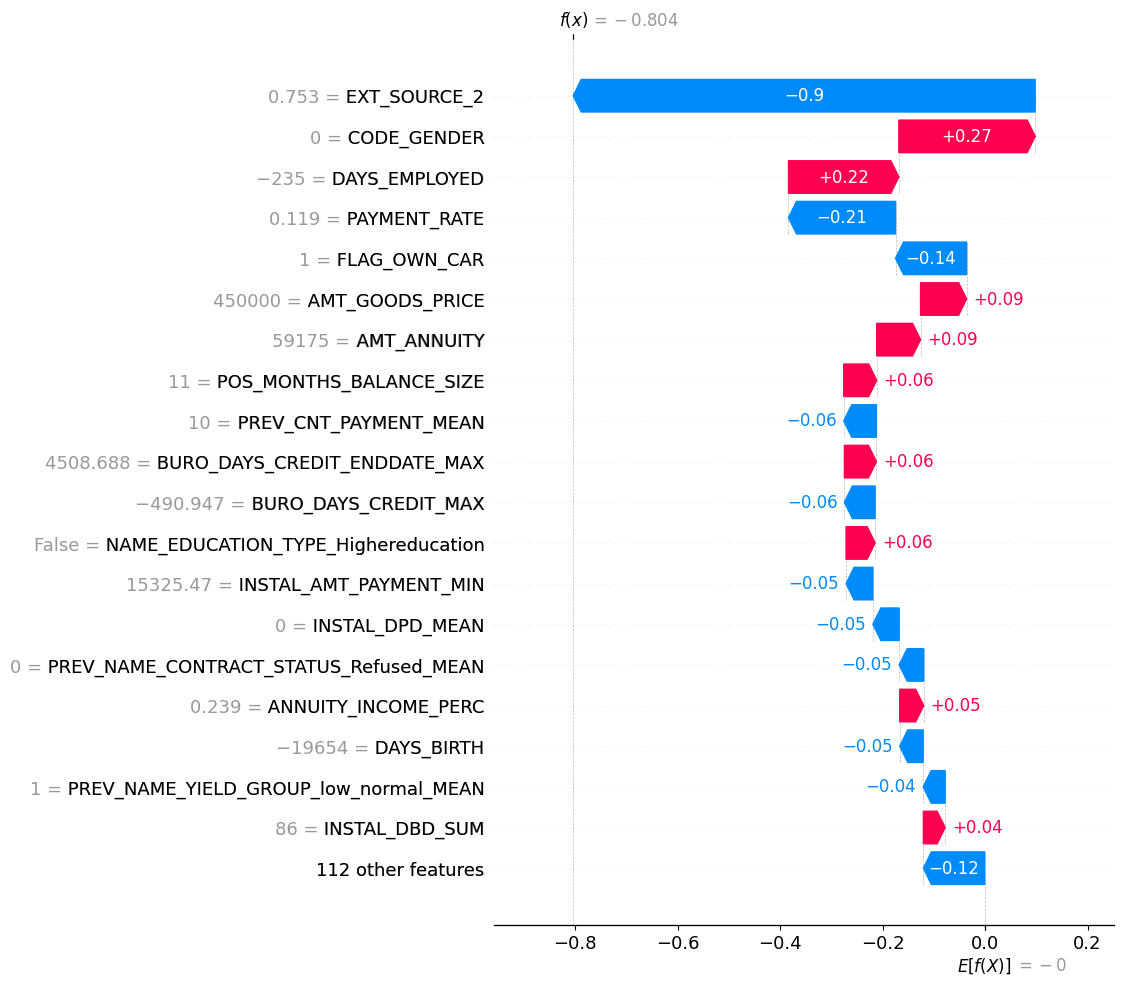

CPU times: total: 500 ms
Wall time: 500 ms


In [324]:
%%time
waterfall(exp_2, max_display=20)

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">12. Final re-training</h2>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to apply our Feature Selection on the whole dataset excluding target variable</p>
</div>

In [325]:
fs_list_sk = fs_list[:]
fs_list_sk.insert(0,"TARGET")
fs_list_sk.insert(0,"SK_ID_CURR")

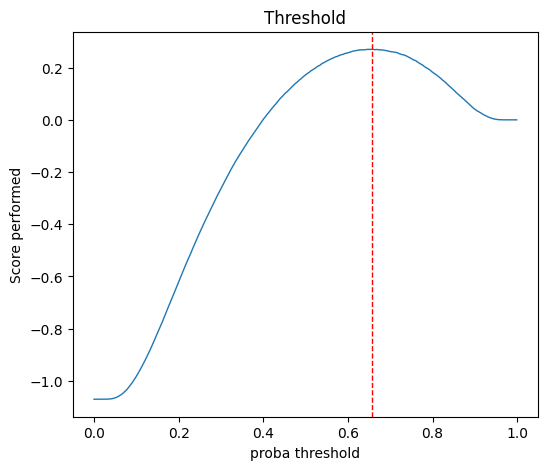

array([1, 0, 0, ..., 0, 0, 1])

In [326]:
y_prob_fs = clf_lgbm_us.predict_proba(X_fs)
y_prob_fs = y_prob_fs[:, 1]
_, X_fs_y_pred_clf_lgbm_us_bs, _ = threshold_selection(y_target, y_prob_fs, metrics=custom_score)
X_fs_y_pred_clf_lgbm_us_bs

In [327]:
X_fs = df_current_clients[fs_list_sk]

In [328]:
X_fs.loc[:,'business_score'] = np.array(X_fs_y_pred_clf_lgbm_us_bs)


C:\Users\blede\AppData\Local\Temp\ipykernel_21988\1229198910.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_fs.loc[:,'business_score'] = np.array(X_fs_y_pred_clf_lgbm_us_bs)
C:\Users\blede\AppData\Local\Temp\ipykernel_21988\1229198910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fs.loc[:,'business_score'] = np.array(X_fs_y_pred_clf_lgbm_us_bs)


In [329]:
X_fs.shape

(307507, 134)

In [330]:
data_key_feature_selected = "df_current_clients_feature_selected.csv"

In [331]:
X_fs.to_csv(f"Data/finals_datasets/{data_key_feature_selected}", index=False)

<div class="alert alert-block alert-info">
    <p>Now, Let's do the same for the clients to predict. In this way, we are going to save time at the time of execution</p>
</div>

In [332]:
TRAINING_COLUMNS_SK = TRAINING_COLUMNS[:]
TRAINING_COLUMNS_SK.insert(0,"SK_ID_CURR")
fs_list_sk.remove("TARGET")

In [333]:
df_clients_to_predict = df_clients_to_predict[TRAINING_COLUMNS_SK]

In [334]:
df_clients_to_predict_fs = df_clients_to_predict[fs_list_sk]

In [335]:
df_clients_to_predict_fs.shape

(48744, 132)

In [336]:
data_key_client_to_predict_feature_selected = "df_clients_to_predict_feature_selected.csv"

In [337]:
df_clients_to_predict_fs.to_csv(f"Data/finals_datasets/{data_key_client_to_predict_feature_selected}", index=False)

In [340]:
df_clients_to_predict_fs.to_csv("Data/finals_datasets/sample_test_all_fs.csv", index=False)

In [341]:
df_clients_to_predit_fs_site = df_clients_to_predict_fs.copy()

In [350]:
y_prob = clf_lgbm_us.predict_proba(df_clients_to_predict_fs.drop("SK_ID_CURR", axis=1))
y_prob = y_prob[:, 1]

In [351]:
y_prob

array([0.58231868, 0.68139126, 0.29145705, ..., 0.15174395, 0.37019301,
       0.71233615])

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

In [355]:
y_pred = (y_prob >= threshold_clf_lgbm_us_bs).astype("int")

In [352]:
df_clients_to_predit_fs_site['score']= y_prob

In [357]:
df_clients_to_predit_fs_site['class']=y_pred

In [360]:
df_clients_to_predit_fs_site['decision'] = df_clients_to_predit_fs_site['class'].map({0: 'granted', 1: 'refused'})

In [361]:
df_clients_to_predit_fs_site.head()

SK_ID_CURR  EXT_SOURCE_2  EXT_SOURCE_3  PAYMENT_RATE  DAYS_BIRTH  \
0      100001      0.789654      0.159520      0.036147      -19241   
1      100005      0.291656      0.432962      0.077973      -18064   
2      100013      0.699787      0.610991      0.105202      -20038   
3      100028      0.509677      0.612704      0.031123      -13976   
4      100038      0.425687      0.509353      0.051266      -13040   

   AMT_ANNUITY  DAYS_ID_PUBLISH  DAYS_EMPLOYED  ANNUITY_INCOME_PERC  \
0      20560.5             -812        -2329.0             0.152300   
1      17370.0            -1623        -4469.0             0.175455   
2      69777.0            -3503        -4458.0             0.344578   
3      49018.5            -4208        -1866.0             0.155614   
4      32067.0            -4262        -2191.0             0.178150   

   INSTAL_AMT_PAYMENT_MIN  ...  PREV_NAME_CLIENT_TYPE_Refreshed_MEAN  \
0             3951.000000  ...                                   1.0   
1             4813.200195  ...                                   0.0   
2                6.165000  ...                                   0.0   
3                1.170000  ...                                   0.0   
4            11097.450195  ...                                   0.0   

   INSTAL_PAYMENT_DIFF_MAX  PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN  \
0                 0.000000                                           0.00   
1                 0.000000                                           0.50   
2             23147.820312                                           0.25   
3              8505.000000                                           0.80   
4                 0.000000                                           0.00   

   PREV_NAME_YIELD_GROUP_XNA_MEAN  PREV_CODE_REJECT_REASON_XAP_MEAN  \
0                            0.00                               1.0   
1                            0.50                               1.0   
2                            0.25                               1.0   
3                            0.60                               0.8   
4                            0.00                               1.0   

   INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE  NAME_INCOME_TYPE_Working     score  \
0                                    2.0                      True  0.582319   
1                                    2.0                      True  0.681391   
2                                    3.0                      True  0.291457   
3                                    3.0                      True  0.336272   
4                                    1.0                      True  0.702287   

   class  decision  
0      0   granted  
1      1   refused  
2      0   granted  
3      0   granted  
4      1   refused  

[5 rows x 135 columns]

In [362]:
df_clients_to_predit_fs_site.to_csv("Data/finals_datasets/sample_test_infos_fs.csv", index=False)

In [364]:
 df = pd.read_csv(r"Data\initials_datasets\application_train.csv")

In [374]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000     307511.000000               265992.000000   
mean           0.000507          0.000335                    0.006402   
std            0.022518          0.018299                    0.083849   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR            Age  year_employed  
count               265992.000000  307511.000000  307511.000000  
mean                     1.899974     -43.938646     174.895337  
std                      1.869295      11.964047     387.185661  
min                      0.000000     -69.000000     -49.000000  
25%                      0.000000     -54.000000      -8.000000  
50%              

In [377]:
df['year_employed'] = np.around(df['DAYS_EMPLOYED']/-365,0)

In [385]:
df.loc[100001,'Age']

-39.0